<font size="6">–£–ª—É—á—à–µ–Ω–∏–µ —Å—Ö–æ–¥–∏–º–æ—Å—Ç–∏ –Ω–µ–π—Ä–æ—Å–µ—Ç–µ–π –∏ –±–æ—Ä—å–±–∞ —Å –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–µ–º</font>

# –°–∏–≥–º–æ–∏–¥–∞ –∑–∞—Ç—É—Ö–∞–µ—Ç –∏ —Ç–µ–æ—Ä–µ—Ç–∏—á–µ—Å–∫–∏, –∏ –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏

–ó–∞–≥—Ä—É–∑–∏–º –¥–∞–Ω–Ω—ã–µ, —Å–æ–∑–¥–∞–¥–∏–º —Å–µ—Ç—å, –æ–±—É—á–∏–º –µ–µ –∏ –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –ø—Ä–∞–∫—Ç–∏–∫–µ, –∫–∞–∫ –ø—Ä–æ—Ö–æ–¥–∏—Ç –æ–±—É—á–µ–Ω–∏–µ.

–ó–∞–≥—Ä—É–∑–∏–º **–¥–∞—Ç–∞—Å–µ—Ç MNIST**:

In [ ]:
import torchvision
import torchvision.transforms as transforms
from IPython.display import clear_output
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST

# transforms for data
transform = torchvision.transforms.Compose(
    [torchvision.transforms.ToTensor(), torchvision.transforms.Normalize((0.13), (0.3))]
)

train_set = MNIST(root="./MNIST", train=True, download=True, transform=transform)
test_set = MNIST(root="./MNIST", train=False, download=True, transform=transform)

batch_size = 32
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=2)

clear_output()
print("Already downloaded!")

Already downloaded!


–°–æ–∑–¥–∞–¥–∏–º —Å–µ—Ç—å —Å **—Å–∏–≥–º–æ–∏–¥–æ–π** –≤ –∫–∞—á–µ—Å—Ç–≤–µ —Ñ—É–Ω–∫—Ü–∏–∏ –∞–∫—Ç–∏–≤–∞—Ü–∏–∏:

In [ ]:
import torch.nn as nn


class SimpleMNIST_NN(nn.Module):
    def __init__(self, n_layers, activation=nn.Sigmoid):
        super().__init__()
        self.n_layers = n_layers  # Num of layers
        self.activation = activation()
        layers = [nn.Linear(28 * 28, 100), self.activation]  # input layer
        for _ in range(n_layers - 1):  # append num of layers
            layers.append(nn.Linear(100, 100))
            layers.append(self.activation)
        layers.append(nn.Linear(100, 10))  # 10 classes
        self.layers = nn.Sequential(*layers)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # reshape to [-1, 784]
        x = self.layers(x)
        return x

–ö–æ–¥ –¥–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–µ–π:

In [ ]:
def exponential_smoothing(scalars, weight):
    last = scalars[0]
    smoothed = []
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point
        smoothed.append(smoothed_val)
        last = smoothed_val

    return smoothed

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np


class HistoryPlotter:
    def __init__(self):
        # dict for safe learning history
        self._history_dict = {}

    def add(self, history):
        """
        Save learning history.
        history: dict with keys: model_name, epo—Åhs, loss_on_train, loss_on_test
        """
        self._history_dict[history["model_name"]] = history
        self.color_list = list(mcolors.TABLEAU_COLORS.keys())

    def plot(self, models, show_smooth=True, smooth_val=0.90):
        """
        Plot informatiom from self._history_dict.
        models: list of model_name (len <= 5, or extend color_list)
        """
        fig, ax = plt.subplots(3, 1, figsize=(10, 10))
        for model_num, model_name in enumerate(models):
            history = self._history_dict[model_name]
            for idx, (key, title) in enumerate(
                zip(["loss_on_train", "loss_on_test"], ["train loss", "test loss"])
            ):
                epoch_len = len(history[key]) // history["epo—Åhs"]
                loss_len = len(history[key])
                ticks_positions = np.arange(history["epo—Åhs"] + 1)

                if show_smooth:
                    x = np.arange(len(history[key])) / epoch_len
                    # Plot train loss and test loss:
                    # 1. plot smoothing vals
                    ax[idx].plot(
                        x,
                        exponential_smoothing(history[key], smooth_val),
                        label=model_name + " smoothed",
                        color=self.color_list[2 * model_num + idx],
                    )
                    # 2. plot raw vals
                    ax[idx].plot(
                        x,
                        history[key],
                        label=model_name + " raw",
                        alpha=0.2,
                        color=self.color_list[2 * model_num + idx],
                    )
                    # 3. add descriptions if it is nesessary
                    if not ax[idx].title.get_text():
                        ax[idx].set_title(title)
                        ax[idx].set_xlabel("epochs")
                        ax[idx].set_ylabel("loss")
                        ax[idx].set_xticks(ticks_positions)
                        ax[idx].set_xticklabels(np.arange(history["epo—Åhs"] + 1))
                    ax[idx].legend()

                # Plot mean train and test loss combined:
                # 1. calculate mean and std
                mean_loss_on_epoch = [
                    np.mean(history[key][i : i + epoch_len])
                    for i in range(0, loss_len, epoch_len)
                ]
                std_loss_on_epoch = [
                    np.std(history[key][i : i + epoch_len])
                    for i in range(0, loss_len, epoch_len)
                ]
                # 2. plot
                ax[2].errorbar(
                    np.arange(history["epo—Åhs"]) + idx / 30.0,
                    mean_loss_on_epoch,
                    yerr=std_loss_on_epoch,
                    capsize=5,
                    fmt="X--",
                    label=model_name + " " + title,
                )
                # 3. add descriptions if it is necessary
                if not ax[2].title.get_text():
                    ax[2].set_title("\nAverage loss per epoch", {"fontsize": 12})
                    ax[2].set_xticks(np.arange(history["epo—Åhs"]))
                    ax[2].set_xticklabels(np.arange(history["epo—Åhs"]))
                    ax[2].set_xlabel("epochs")
                    ax[2].set_ylabel("loss")
                ax[2].legend()
        plt.subplots_adjust(hspace=0.4)
        plt.show()

In [ ]:
history_plotter = HistoryPlotter()

–§—É–Ω–∫—Ü–∏—è –¥–ª—è –æ–±—É—á–µ–Ω–∏—è —Å–µ—Ç–∏ –Ω–∞ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ:

In [ ]:
import torch

# compute on cpu or gpu
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


def train_epoch(model, optimizer, criterion, train_loader):
    loss_history = []
    for batch in train_loader:
        optimizer.zero_grad()
        x_train, y_train = batch  # parse data
        x_train, y_train = x_train.to(device), y_train.to(device)  # compute on gpu
        y_pred = model(x_train)  # get predictions
        loss = criterion(y_pred, y_train)  # compute loss
        loss_history.append(loss.cpu().detach().item())  # write loss to log
        loss.backward()
        optimizer.step()
    return loss_history

–§—É–Ω–∫—Ü–∏—è –¥–ª—è –≤–∞–ª–∏–¥–∞—Ü–∏–∏ —Å–µ—Ç–∏ –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ:

In [ ]:
def validate(model, criterion, val_loader):
    cumloss = 0
    loss_history = []
    with torch.no_grad():
        for batch in val_loader:
            x_train, y_train = batch  # parse data
            x_train, y_train = x_train.to(device), y_train.to(device)  # compute on gpu
            y_pred = model(x_train)  # get predictions
            loss = criterion(y_pred, y_train)  # compute loss
            loss_history.append(loss.cpu().detach().item())  # write loss to log
            cumloss += loss
    return cumloss / len(val_loader), loss_history  # mean loss and history

–§—É–Ω–∫—Ü–∏—è –¥–ª—è –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–∏:

In [ ]:
from tqdm.notebook import tqdm


def train_model(model, optimizer, model_name=None, num_epochs=5):
    criterion = nn.CrossEntropyLoss().to(device)

    train_history = {}
    train_history["model_name"] = model_name
    train_history["epo—Åhs"] = num_epochs
    train_history["loss_on_train"] = []
    train_history["loss_on_test"] = []

    for epoch in tqdm(range(num_epochs)):
        loss_on_train = train_epoch(model, optimizer, criterion, train_loader)
        _, loss_on_test = validate(model, criterion, test_loader)
        train_history["loss_on_train"].extend(loss_on_train)
        train_history["loss_on_test"].extend(loss_on_test)
    return train_history

–°–æ–∑–¥–∞–¥–∏–º –∏ –∑–∞–ø—É—Å—Ç–∏–º –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ —Å **2-–º—è —Å–∫—Ä—ã—Ç—ã–º–∏ —Å–ª–æ—è–º–∏** –∏ –æ–¥–Ω–∏–º –≤—ã—Ö–æ–¥–Ω—ã–º —Å–ª–æ–µ–º:

In [ ]:
model_name = "n_layers2_sigmoid"
model = SimpleMNIST_NN(n_layers=2).to(device)
print(model)

SimpleMNIST_NN(
  (activation): Sigmoid()
  (layers): Sequential(
    (0): Linear(in_features=784, out_features=100, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=100, out_features=100, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=100, out_features=10, bias=True)
  )
)


  0%|          | 0/5 [00:00<?, ?it/s]

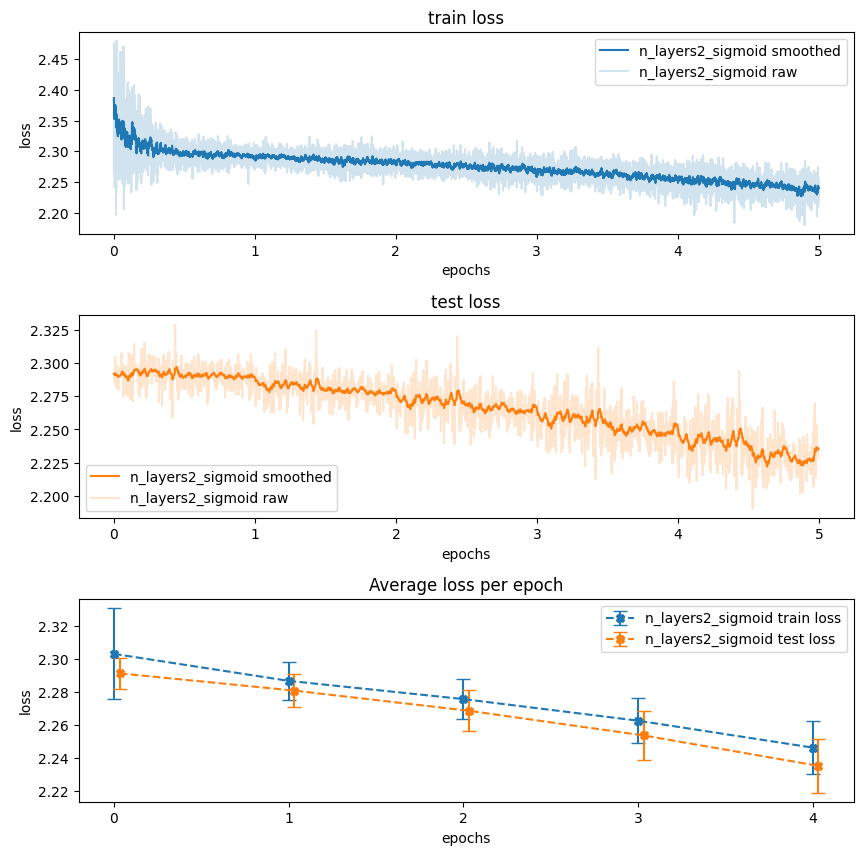

In [ ]:
import torch.optim as optim

optimizer = optim.SGD(model.parameters(), lr=0.001)

history = train_model(model, optimizer, model_name=model_name)
history_plotter.add(history)
history_plotter.plot([model_name])

In [ ]:
type(history)

dict

–ê —Ç–µ–ø–µ—Ä—å –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –º–æ–¥–µ–ª—å **—Å 3-–º—è —Å–∫—Ä—ã—Ç—ã–º–∏ —Å–ª–æ—è–º–∏** –∏ –æ–¥–Ω–∏–º –≤—ã—Ö–æ–¥–Ω—ã–º —Å–ª–æ–µ–º:

In [ ]:
model_name = "n_layers3_sigmoid"
model = SimpleMNIST_NN(n_layers=3).to(device)
print(model)

SimpleMNIST_NN(
  (activation): Sigmoid()
  (layers): Sequential(
    (0): Linear(in_features=784, out_features=100, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=100, out_features=100, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=100, out_features=100, bias=True)
    (5): Sigmoid()
    (6): Linear(in_features=100, out_features=10, bias=True)
  )
)


  0%|          | 0/5 [00:00<?, ?it/s]

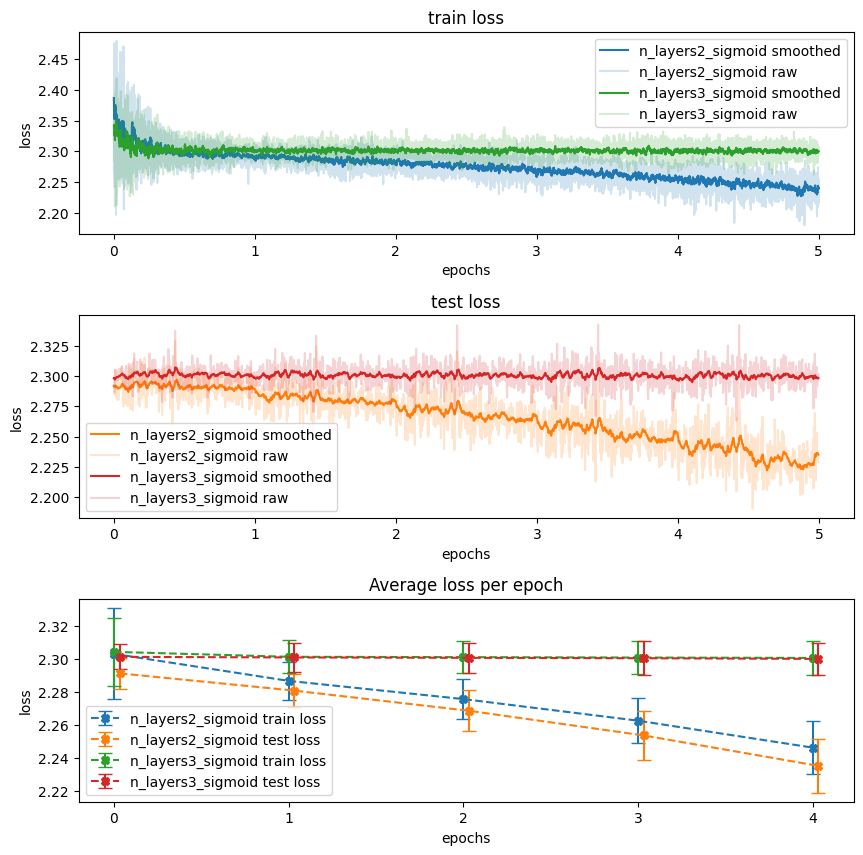

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.001)

history = train_model(model, optimizer, model_name=model_name)
history_plotter.add(history)
history_plotter.plot(["n_layers2_sigmoid", model_name])

**–ó–∞–º–µ—á–∞–Ω–∏–µ:** –ù–∞ —Å–∞–º–æ–º –¥–µ–ª–µ, –µ—Å–ª–∏ —É–≤–µ–ª–∏—á–∏—Ç—å learning rate, —Ä–∞–∑–º–µ—Ä –±–∞—Ç—á–∞ –∏–ª–∏ —á–∏—Å–ª–æ –Ω–µ–π—Ä–æ–Ω–æ–≤, —Ç–æ –Ω–µ–π—Ä–æ—Å–µ—Ç—å –Ω–∞—á–Ω–µ—Ç —É—á–∏—Ç—å—Å—è. –≠—Ç–æ ‚Äî —É—á–µ–±–Ω—ã–π –ø—Ä–∏–º–µ—Ä, —á—Ç–æ–±—ã –ø–æ–∫–∞–∑–∞—Ç—å, —á—Ç–æ –∏ —Ç–∞–∫–æ–µ –±—ã–≤–∞–µ—Ç.

–ù–µ–π—Ä–æ—Å–µ—Ç—å —Å —Ç—Ä–µ–º—è —Å–ª–æ—è–º–∏ –≤–æ–æ–±—â–µ **–Ω–µ —É—á–∏—Ç—Å—è**. –ü–æ—á–µ–º—É? –ú–æ–∂–µ–º –ø–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å —Ä–∞–∑–æ–±—Ä–∞—Ç—å—Å—è.

–î–ª—è —ç—Ç–æ–≥–æ –Ω–∞–ø–∏—à–µ–º —Ñ—É–Ω–∫—Ü–∏–∏, –∫–æ—Ç–æ—Ä—ã–µ –±—É–¥—É—Ç —Å–ª–µ–¥–∏—Ç—å –∑–∞ **—Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ–º –≥—Ä–∞–¥–∏–µ–Ω—Ç–æ–≤** –∏ **–∞–∫—Ç–∏–≤–∞—Ü–∏–π** –Ω–∞ –Ω–∞—à–∏—Ö —Å–ª–æ—è—Ö.

–í–æ—Å–ø–æ–ª—å–∑—É–µ–º—Å—è –º–µ—Ç–æ–¥–æ–º `register_backward_hook` –±–∏–±–ª–∏–æ—Ç–µ–∫–∏ PyTorch –¥–ª—è —Ç–æ–≥–æ, —á—Ç–æ–±—ã –≤—ã–ø–æ–ª–Ω—è—Ç—å —ç—Ç–∏ —Ñ—É–Ω–∫—Ü–∏–∏ –ø—Ä–∏ –∫–∞–∂–¥–æ–º –ø—Ä–æ–ø—É—Å–∫–∞–Ω–∏–∏ –≥—Ä–∞–¥–∏–µ–Ω—Ç–∞.

In [ ]:
from collections import defaultdict


def get_forward_hook(history_dict, key):
    def forward_hook(self, input_, output):
        history_dict[key] = input_[0].cpu().detach().numpy().flatten()
# –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–ª–µ–Ω –≤—Ö–æ–¥ –∏ –≤—ã—Ö–æ–¥
    return forward_hook

# hook - —Ñ—É–Ω–∫—Ü–∏–∏ –º–æ–∂–Ω–æ –ø—Ä–∏–∫—Ä–µ–ø–∏—Ç—å –∫ –≤—ã—á –≥—Ä–∞—Ñ—É –∏ —Å–º–æ—Ç—Ä–µ—Ç—å –≤—Ö–æ–¥ –∏ –≤—ã—Ö–æ–¥
def get_backward_hook(history_dict, key):
    def backward_hook(grad):  # for tensors
        history_dict[key] = grad.abs().cpu().detach().numpy().flatten()

    return backward_hook


def register_model_hooks(model):
    cur_ind = 0
    hooks_data_history = defaultdict(list)
    for child in model.layers.children():
        if isinstance(child, nn.Linear):
            forward_hook = get_forward_hook(
                hooks_data_history, f"sigmoid_out_{cur_ind}"
            )
            child.register_forward_hook(forward_hook) # —ç—Ç–æ –ø–æ–∑–≤–æ–ª–∏—Ç —Ñ—É–Ω–∫—Ü–∏–∏ –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∏ –∏—Å–ø–æ–ª–Ω—è—Ç—å—Å—è

            cur_ind += 1
            backward_hook = get_backward_hook(
                hooks_data_history, f"gradient_linear_{cur_ind}"
            )
            child.weight.register_hook(backward_hook)
    return hooks_data_history

–ó–∞–ø—É—Å—Ç–∏–º –æ–±—É—á–µ–Ω–∏–µ **–º–æ–¥–µ–ª–∏ —Å 3 —Å–ª–æ—è–º–∏**:

  0%|          | 0/5 [00:00<?, ?it/s]

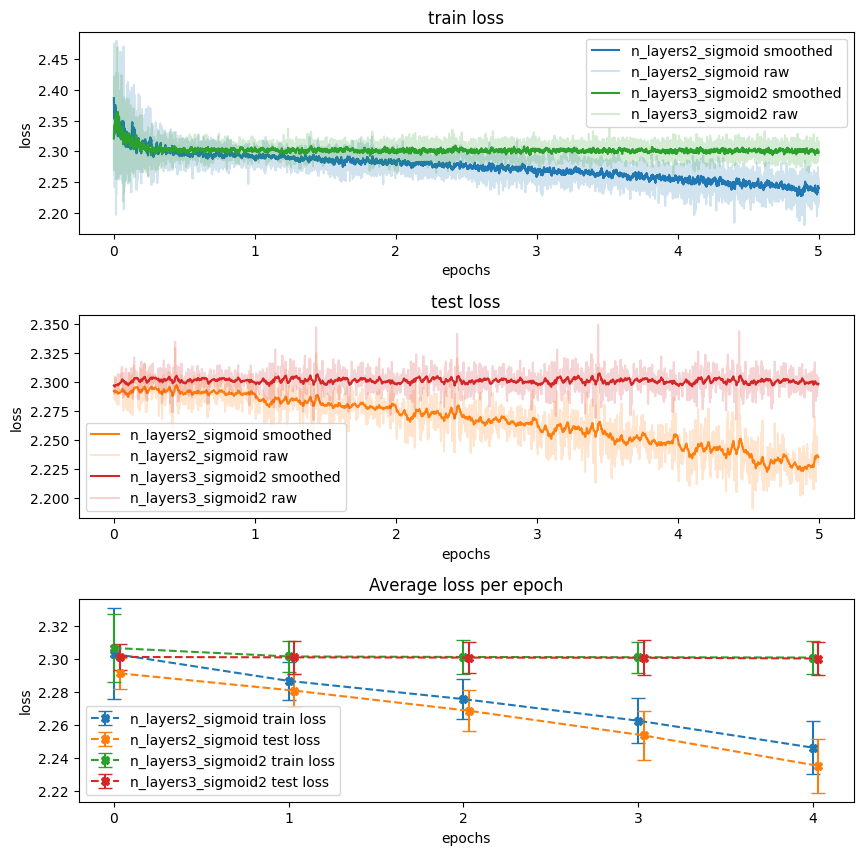

In [ ]:
model = SimpleMNIST_NN(n_layers=3).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.001)

hooks_data_history = register_model_hooks(model)

model_name = "n_layers3_sigmoid2"
history = train_model(model, optimizer, model_name=model_name)
history_plotter.add(history)
history_plotter.plot(["n_layers2_sigmoid", model_name])

In [ ]:
def plot_hooks_data(hooks_data_history):
    keys = hooks_data_history.keys()
    n_layers = len(keys) // 2

    activation_names = [f"sigmoid_out_{i}" for i in range(1, n_layers)]
    activations_on_layers = [
        hooks_data_history[activation] for activation in activation_names
    ]

    gradient_names = [f"gradient_linear_{i + 1}" for i in range(n_layers)]
    gradients_on_layers = [hooks_data_history[gradient] for gradient in gradient_names]

    for plot_name, values, labels in zip(
        ["activations", "gradients"],
        [activations_on_layers, gradients_on_layers],
        [activation_names, gradient_names],
    ):
        fig, ax = plt.subplots(1, len(labels), figsize=(14, 4), sharey="row")
        for label_idx, label in enumerate(labels):
            ax[label_idx].boxplot(values[label_idx], labels=[label])
        plt.show()

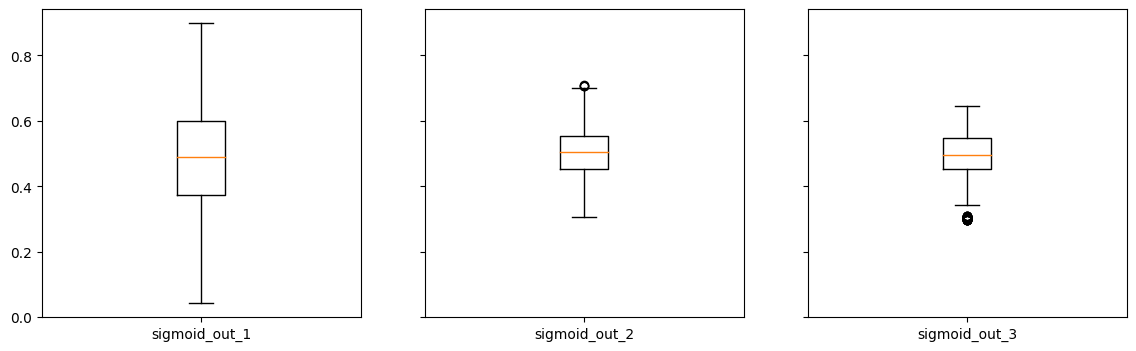

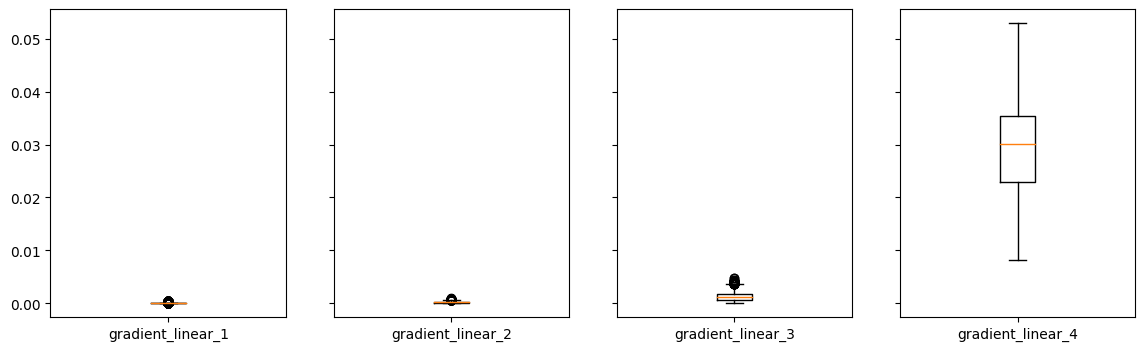

In [ ]:
plot_hooks_data(hooks_data_history)

–ú—ã –≤–∏–¥–∏–º, —á—Ç–æ –≥—Ä–∞–¥–∏–µ–Ω—Ç –Ω–∞—à–µ–π –º–æ–¥–µ–ª–∏ —Å—Ç—Ä–µ–º–∏—Ç–µ–ª—å–Ω–æ –∑–∞—Ç—É—Ö–∞–µ—Ç. –ü–µ—Ä–≤—ã–µ —Å–ª–æ–∏ (–¥–æ –∫–æ—Ç–æ—Ä—ã—Ö –≥—Ä–∞–¥–∏–µ–Ω—Ç –¥–æ—Ö–æ–¥–∏—Ç –ø–æ—Å–ª–µ–¥–Ω–∏–º), –ø–æ–ª—É—á–∞—é—Ç –∑–Ω–∞—á–µ–Ω–∏—è –≥—Ä–∞–¥–∏–µ–Ω—Ç–∞, –º–∞–ª–æ –æ—Ç–ª–∏—á–∏–º—ã–µ –æ—Ç –Ω—É–ª—è.

–ü—Ä–∏—á–µ–º, —ç—Ç–æ –±—É–¥–µ—Ç –≤–µ—Ä–Ω–æ —Å —Å–∞–º—ã—Ö –ø–µ—Ä–≤—ã—Ö —à–∞–≥–æ–≤ –æ–±—É—á–µ–Ω–∏—è –Ω–∞—à–µ–π –º–æ–¥–µ–ª–∏.

–≠—Ç–æ —è–≤–ª–µ–Ω–∏–µ –ø–æ–ª—É—á–∏–ª–æ –Ω–∞–∑–≤–∞–Ω–∏–µ **–ø–∞—Ä–∞–ª–∏—á —Å–µ—Ç–∏**.





# –ó–∞—Ç—É—Ö–∞–Ω–∏–µ –≥—Ä–∞–¥–∏–µ–Ω—Ç–∞

–û—Ç–∫—É–¥–∞ –æ–Ω–æ –±–µ—Ä–µ—Ç—Å—è?

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –æ–±—ã—á–Ω—É—é —Å–∏–≥–º–æ–∏–¥—É

$$\sigma(z) = \dfrac 1 {1 + e^{-z}}$$

–ï–µ –ø—Ä–æ–∏–∑–≤–æ–¥–Ω–∞—è, –∫–∞–∫ –º—ã —É–∂–µ –≤—ã–≤–æ–¥–∏–ª–∏, —Ä–∞–≤–Ω–∞

$$\dfrac {\partial \sigma(z)} {\partial z} = \sigma(z) (1 - \sigma(z))$$

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L07/out/activation_function_sigmoid.png" width="1000">

–ö–∞–∫–æ–µ –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ —É —Ç–∞–∫–æ–π —Ñ—É–Ω–∫—Ü–∏–∏?

–°–∏–≥–º–æ–∏–¥–∞ –Ω–∞—Ö–æ–¥–∏—Ç—Å—è –≤ –ø—Ä–µ–¥–µ–ª–∞—Ö –æ—Ç 0 –¥–æ 1. **–ú–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –ø—Ä–æ–∏–∑–≤–æ–¥–Ω–æ–π** –ø–æ —Å–∏–≥–º–æ–∏–¥–µ  $=\dfrac 1 4$

–¢–µ–ø–µ—Ä—å –≤–æ–∑—å–º–µ–º –ø—Ä–æ—Å—Ç—É—é –Ω–µ–π—Ä–æ–Ω–Ω—É—é —Å–µ—Ç—å:


<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L07/out/simple_nn_with_sigmoid.png" width="750">

–ü–æ—Å—á–∏—Ç–∞–µ–º —É –Ω–µ–µ –≥—Ä–∞–¥–∏–µ–Ω—Ç

$$\dfrac {\partial L} {\partial z_4} = \dfrac {\partial L} {\partial y} \dfrac {\partial y} {\partial z_4} = \dfrac {\partial L} {\partial y} \dfrac {\partial \sigma(w_5z)} {\partial z} w_5 \le \dfrac 1 4 \dfrac {\partial L} {\partial y}  w_5 $$

–ê–Ω–∞–ª–æ–≥–∏—á–Ω–æ –º–æ–∂–Ω–æ –ø–æ—Å—á–∏—Ç–∞—Ç—å –≥—Ä–∞–¥–∏–µ–Ω—Ç –¥–ª—è $z_3$

$$\dfrac {\partial L} {\partial z_3} = \dfrac {\partial L} {\partial z_4} \dfrac {\partial z_4} {\partial z_3} \le \dfrac {\partial L} {\partial y} \dfrac {\partial \sigma(w_4z)} {\partial z} w_5 \le \left({\dfrac 1 4}\right)^2 \dfrac {\partial L} {\partial y}  w_5 w_4$$

–ò —Ç–∞–∫ –¥–∞–ª–µ–µ

$$\dfrac {\partial L} {\partial x}  \le \left({\dfrac 1 4}\right)^5 \dfrac {\partial L} {\partial y}  w_5 w_4 w_3 w_2 w_1$$

–¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º:
* –≥—Ä–∞–¥–∏–µ–Ω—Ç –Ω–∞—á–∏–Ω–∞–µ—Ç **—ç–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω–æ –∑–∞—Ç—É—Ö–∞—Ç—å**, –µ—Å–ª–∏ **–≤–µ—Å–∞ –º–∞–ª–µ–Ω—å–∫–∏–µ**;

* –µ—Å–ª–∏ **–≤–µ—Å–∞ –±–æ–ª—å—à–∏–µ**, —Ç–æ –≥—Ä–∞–¥–∏–µ–Ω—Ç –Ω–∞–æ–±–æ—Ä–æ—Ç –Ω–∞—á–Ω–µ—Ç **—ç–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω–æ –≤–æ–∑—Ä–∞—Å—Ç–∞—Ç—å** (–≤–∑—Ä—ã–≤ –≥—Ä–∞–¥–∏–µ–Ω—Ç–∞).

–î–ª—è –Ω–µ–∫–æ—Ç–æ—Ä—ã—Ö —Ñ—É–Ω–∫—Ü–∏–π –∞–∫—Ç–∏–≤–∞—Ü–∏–∏ –∫–∞—Ä—Ç–∏–Ω–∞ –±—É–¥–µ—Ç –Ω–µ —Å—Ç–æ–ª—å –∫–∞—Ç–∞—Å—Ç—Ä–æ—Ñ–∏—á–Ω–∞, –Ω–æ —Ç–æ–∂–µ –Ω–µ–ø—Ä–∏—è—Ç–Ω–∞.
–ü—Ä–∏ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏–∏ –∑–∞–¥–∞–Ω–∏–π –≤—ã –ø–æ—Å–º–æ—Ç—Ä–∏—Ç–µ, –Ω–∞–ø—Ä–∏–º–µ—Ä, –∫–∞–∫ –≤–µ–¥–µ—Ç —Å–µ–±—è —Ñ—É–Ω–∫—Ü–∏—è **ReLU** –≤ —ç—Ç–æ–º —Å–ª—É—á–∞–µ.

–î–∞–≤–∞–π—Ç–µ –ø–æ–¥—É–º–∞–µ–º, —á—Ç–æ –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å —Å –Ω–µ–π—Ä–æ–Ω–Ω–æ–π —Å–µ—Ç—å—é, —á—Ç–æ–±—ã –æ–Ω–∞ –Ω–∞—á–∞–ª–∞ —É—á–∏—Ç—å—Å—è. –í –Ω–∞—á–∞–ª–µ —Ä–∞—Å—Å–º–æ—Ç—Ä–∏–º –º–µ—Ç–æ–¥—ã, **–Ω–µ –∏–∑–º–µ–Ω—è—é—â–∏–µ —Å—Ç—Ä—É–∫—Ç—É—Ä—É —Å–µ—Ç–∏** (–±–µ–∑ –¥–æ–±–∞–≤–ª–µ–Ω–∏—è –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã—Ö —Å–ª–æ–µ–≤), —Ç–∞–∫–∂–µ –∑–∞—Ñ–∏–∫—Å–∏—Ä—É–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –Ω–µ–π—Ä–æ–Ω–æ–≤ –∏ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä–∞.


# –ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è –≤—Ö–æ–¥–æ–≤ –∏ –≤—ã—Ö–æ–¥–æ–≤

–ù–∞—á–Ω–µ–º —Å —É–∂–µ –∑–Ω–∞–∫–æ–º–æ–≥–æ: **–Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è**.

## –ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è –≤—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö

–ü—Ä–µ–¥—Å—Ç–∞–≤–∏–º —Å–µ–±–µ, —á—Ç–æ –¥–∞–Ω–Ω—ã–µ, –∫–æ—Ç–æ—Ä—ã–µ –º—ã –ø–æ–¥–∞–µ–º –≤ –Ω–µ–π—Ä–æ—Å–µ—Ç—å, —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω—ã —Å–ª–µ–¥—É—é—â–∏–º –æ–±—Ä–∞–∑–æ–º:

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L07/out/data_before_normalization.png" width="400">

–§–∞–∫—Ç–∏—á–µ—Å–∫–∏ –Ω–µ–π—Ä–æ—Å–µ—Ç–∏ —Ä–∞–±–æ—Ç–∞—é—Ç —Å–æ —Å–∫–∞–ª—è—Ä–Ω—ã–º–∏ –ø—Ä–æ–∏–∑–≤–µ–¥–µ–Ω–∏—è–º–∏. –í —ç—Ç–æ–º –ø–ª–∞–Ω–µ –¥–≤–∞ –≤–µ–∫—Ç–æ—Ä–∞, –∏–∑–æ–±—Ä–∞–∂–µ–Ω–Ω—ã–µ –Ω–∞ —Ä–∏—Å—É–Ω–∫–µ, **–Ω–µ —Å–∏–ª—å–Ω–æ –æ—Ç–ª–∏—á–∞—é—Ç—Å—è**. –¢–∞–∫–∂–µ –∏ —Ç–æ—á–∫–∏ –Ω–∞—à–µ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞ —Å–ª–∞–±–æ —Ä–∞–∑–¥–µ–ª–∏–º—ã. –ß—Ç–æ–±—ã —Å —ç—Ç–∏–º —Ä–∞–±–æ—Ç–∞—Ç—å, –Ω–µ–π—Ä–æ—Å–µ—Ç—å —Å–Ω–∞—á–∞–ª–∞ –¥–æ–ª–∂–Ω–∞ –ø–æ–¥–æ–±—Ä–∞—Ç—å **—É–¥–æ–±–Ω–æ–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ**, –∞ –∑–∞—Ç–µ–º —Ç–æ–ª—å–∫–æ —Å—Ä–∞–≤–Ω–∏–≤–∞—Ç—å –Ω–∞—à–∏ –æ–±—ä–µ–∫—Ç—ã. –ü–æ–Ω—è—Ç–Ω–æ, —á—Ç–æ —ç—Ç–æ —É—Å–ª–æ–∂–Ω—è–µ—Ç –∑–∞–¥–∞—á—É.

–î–ª—è —Ç–æ–≥–æ, —á—Ç–æ–±—ã –æ–±–ª–µ–≥—á–∏—Ç—å –Ω–µ–π—Ä–æ—Å–µ—Ç–∏ –∑–∞–¥–∞—á—É, –≤—Ö–æ–¥–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ —á–∞—Å—Ç–æ **–Ω–æ—Ä–º–∏—Ä—É—é—Ç**:

$$x1' = \dfrac {x1 - \mu_{x1}} {\sigma_{x1}}$$

$$x2' = \dfrac {x2 - \mu_{x2}} {\sigma_{x2}}$$

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L07/out/data_after_normalization.png" width="450">


 –¢–∞–∫–æ–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ –ø–æ–º–æ–≥–∞–µ—Ç –Ω–µ–π—Ä–æ—Å–µ—Ç–∏

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L07/out/normalization_helps_find_minimum_of_function.png" >


## –ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è —Ü–µ–ª–µ–≤—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –≤ –∑–∞–¥–∞—á–µ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏

–í —Ä—è–¥–µ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–π —Ç–∞–∫–∂–µ –Ω—É–∂–Ω–∞ **–Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è –≤—ã—Ö–æ–¥–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π**, –Ω–∞–ø—Ä–∏–º–µ—Ä, –≤ –∑–∞–¥–∞—á–µ **—Ä–µ–≥—Ä–µ—Å—Å–∏–∏**. –°—É—â–µ—Å—Ç–≤—É–µ—Ç –Ω–µ—Å–∫–æ–ª—å–∫–æ –ø—Ä–∏—á–∏–Ω, –ø–æ—á–µ–º—É —ç—Ç–æ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ.

### –í–∑—Ä—ã–≤ –≥—Ä–∞–¥–∏–µ–Ω—Ç–∞

–í –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–µ —Å–ª—É—á–∞–µ–≤, –º—ã **–Ω–æ—Ä–º–∞–ª–∏–∑—É–µ–º –≤—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ**, —á—Ç–æ–±—ã —Å—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –±—ã–ª–æ 0.

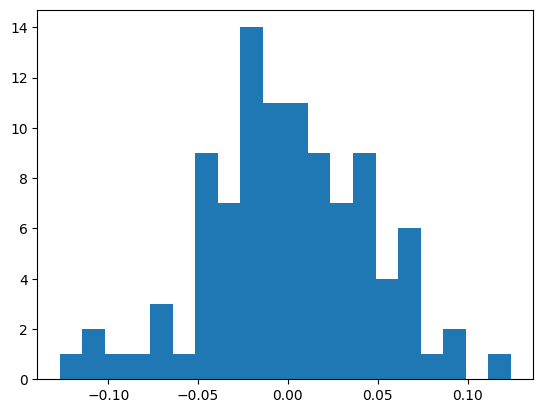

X mean: -0.00 X variance: 1.00


In [ ]:
import torch
import matplotlib.pyplot as plt

x = torch.randn((512, 100))  # Fake normalized data –Ω–æ—Ä–º–ª–∏–∑–∞—Ü–∏—è –¥–∞–Ω–Ω–Ω—ã—Ö –¥–µ–ª–∞–µ—Ç —Ä–µ–ª—å–µ—Ñ –ª–æ—Å—Å —Ñ—É–Ω–∫—Ü–∏–∏ –±–æ–ª–µ–µ —Å–∏–º–º–µ—Ç—Ä–∏—á–Ω—ã–º
plt.hist(x.mean(dim=0), bins=20)
plt.show()
print(f"X mean: {x.mean().item():.2f} X variance: {x.var().item():.2f}")

–ö—Ä–æ–º–µ —ç—Ç–æ–≥–æ –º—ã –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω—ã–º **—Å–ª—É—á–∞–π–Ω—ã–º –æ–±—Ä–∞–∑–æ–º –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä—É–µ–º –≤–µ—Å–∞**.

In [ ]:
from torch import nn

net = nn.Sequential(
    nn.Linear(100, 50),  # weights randomly sampled from some random distribution
    nn.Sigmoid(),
    nn.Linear(50, 1),
)

–í–µ—Å–∞ **–Ω–æ—Ä–º–∞–ª—å–Ω–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω—ã –≤–æ–∫—Ä—É–≥ –Ω—É–ª—è**:




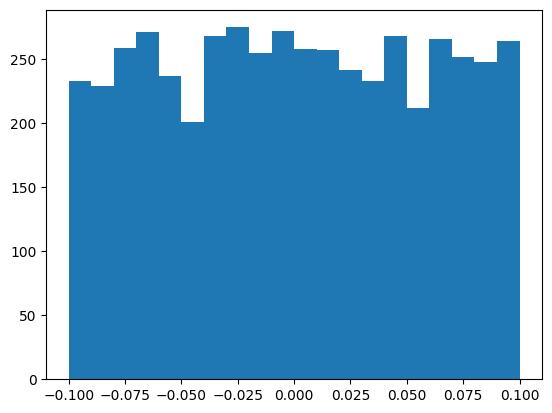

Weights mean: 0.00,  Weights variance: 0.00


In [ ]:
weights = net[0].weight.data.numpy()
plt.hist(weights.flatten(), bins=20)
plt.show()

print(f"Weights mean: {weights.mean():.2f},  Weights variance: {weights.var():.2f}")

–ù–µ–æ–±—É—á–µ–Ω–Ω–∞—è —Å–µ—Ç—å –±—É–¥–µ—Ç —á–∞—â–µ –≤—Å–µ–≥–æ –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞—Ç—å –∑–Ω–∞—á–µ–Ω–∏—è –ø–æ—Ä—è–¥–∫–∞ $10^{-1}$.

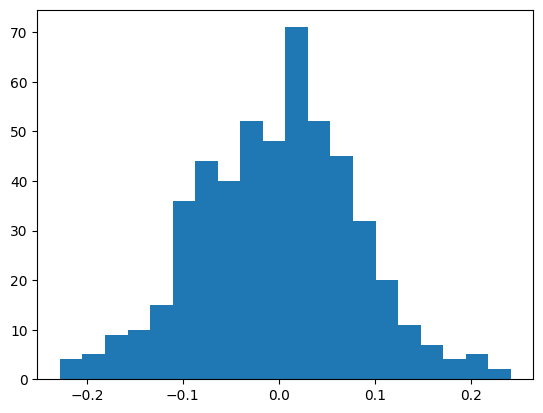

Out mean: -0.00, Out variance: 0.01


In [ ]:
out = net(x)
plt.hist(out.detach().numpy(), bins=20)
plt.show()

print(f"Out mean: {out.mean().item():.2f}, Out variance: {out.var().item():.2f}")

–ü—Ä–µ–¥–ø–æ–ª–æ–∂–∏–º, –º—ã –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞–µ–º –∫–∞–∫—É—é-—Ç–æ –±–æ–ª—å—à—É—é –≤–µ–ª–∏—á–∏–Ω—É. –ù–∞–ø—Ä–∏–º–µ—Ä, [—Å—Ç–æ–∏–º–æ—Å—Ç—å –¥–æ–º–∞ –≤ —à—Ç–∞—Ç–µ –ö–∞–ª–∏—Ñ–æ—Ä–Ω–∏—è –≤ –¥–æ–ª–ª–∞—Ä–∞—Ö](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset) (–≤ –¥–∞—Ç–∞—Å–µ—Ç–µ –≤ sklearn —Ü–µ–ª–µ–≤–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –æ—Ç–Ω–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω–æ –Ω–∞ 100 000\$). –°—Ç–æ–∏–º–æ—Å—Ç—å –ª–µ–∂–∏—Ç –≤ –¥–∏–∞–ø–∞–∑–æ–Ω–µ –æ—Ç 15 000\$ –¥–æ 500 000\$.

–í—ã–±–µ—Ä–µ–º —Å–ª—É—á–∞–π–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ —ç—Ç–æ–º –¥–∏–∞–ø–∞–∑–æ–Ω–µ.

In [ ]:
# fake cost
targets = torch.randint(15_000, 500_000, (512, 1), dtype=torch.float32)
print(f"Target example: {targets[:10].flatten()}")

Target example: tensor([497233., 226461., 303506., 454983., 350222., 320052., 186298., 170206.,
        471470., 331776.])


–ï—Å–ª–∏ –º—ã –±—É–¥–µ–º –ø—ã—Ç–∞—Ç—å—Å—è –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞—Ç—å —ç—Ç–∏ –∑–Ω–∞—á–µ–Ω–∏—è, –º—ã –ø–æ–ª—É—á–∏–º **–æ—á–µ–Ω—å –±–æ–ª—å—à—É—é –æ—à–∏–±–∫—É**.

In [ ]:
criterion = nn.MSELoss()
loss = criterion(out, targets)
loss.backward()

print(f"Loss: {loss.item():.2f}")

Loss: 86855540736.00


–≠—Ç–∞ –æ—à–∏–±–∫–∞ –ø—Ä–∏–≤–µ–¥–µ—Ç –∫ **–±–æ–ª—å—à–∏–º –∑–Ω–∞—á–µ–Ω–∏—è–º –≥—Ä–∞–¥–∏–µ–Ω—Ç–∞** (c–º–æ—Ç—Ä–∏–º –Ω–∞ –∑–Ω–∞—á–µ–Ω–∏—è –ø–æ x), **–±–æ–ª—å—à–∏–º –∑–Ω–∞—á–µ–Ω–∏—è–º –≤–µ—Å–æ–≤** –∏ **–Ω–µ—Å—Ç–∞–±–∏–ª—å–Ω–æ–º—É –æ–±—É—á–µ–Ω–∏—é**.

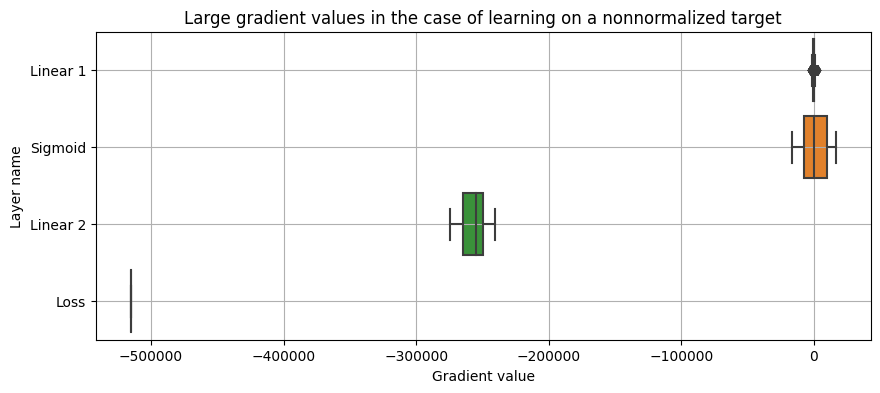

In [ ]:
import pandas as pd
import seaborn as sns

layer_names = ("Linear 1", "Sigmoid", "Linear 2", "Loss")
gradient_values = {}
for layer_name, p in zip(layer_names, net.parameters()):
    gradient_values[layer_name] = pd.Series(p.grad.detach().flatten().numpy())
    # print(f"{layer_name} grad: \n {p.grad}")

gradient_values = pd.DataFrame(gradient_values)
data_to_plot = gradient_values.melt(value_name="Gradient value", var_name="Layer name")

plt.figure(figsize=(10, 4))
sns.boxplot(data=data_to_plot, x="Gradient value", y="Layer name")
plt.grid()
plt.title(f"Large gradient values in the case of learning on a nonnormalized target")
plt.show()

–ï—Å–ª–∏ –º—ã **—Å—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑—É–µ–º —Ü–µ–ª–µ–≤—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è**

In [ ]:
mean = targets.float().mean()
std = targets.float().std()

transformed_targets = (targets - mean) / std
print(transformed_targets.flatten()[:10])

tensor([ 1.6716, -0.2169,  0.3204,  1.3769,  0.6463,  0.4358, -0.4970, -0.6093,
         1.4919,  0.5176])


–¢–æ –ø–æ–ª—É—á–∏–º –æ—à–∏–±–∫—É –Ω–∞ 10 –ø–æ—Ä—è–¥–∫–æ–≤ **–º–µ–Ω—å—à–µ**:

In [ ]:
net.zero_grad()
out = net(x)
loss = criterion(out, transformed_targets)
loss.backward()

print(f"Loss: {loss.item():.2f}")

Loss: 1.00


–ò **–Ω–µ–±–æ–ª—å—à–∏–µ –≥—Ä–∞–¥–∏–µ–Ω—Ç—ã** (c–º–æ—Ç—Ä–∏–º –Ω–∞ –∑–Ω–∞—á–µ–Ω–∏—è –ø–æ x)


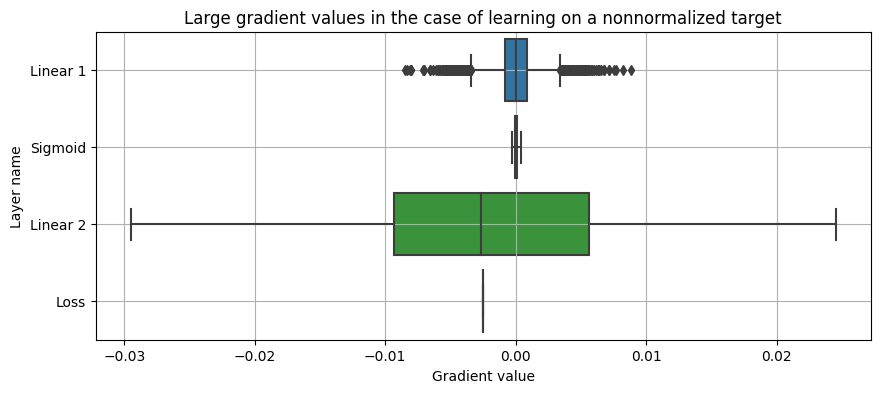

In [ ]:
layer_names = ("Linear 1", "Sigmoid", "Linear 2", "Loss")
gradient_values = {}
for layer_name, p in zip(layer_names, net.parameters()):
    gradient_values[layer_name] = pd.Series(p.grad.detach().flatten().numpy())
    # print(f"{layer_name} grad: \n {p.grad}")

gradient_values = pd.DataFrame(gradient_values)
data_to_plot = gradient_values.melt(value_name="Gradient value", var_name="Layer name")

plt.figure(figsize=(10, 4))
sns.boxplot(data=data_to_plot, x="Gradient value", y="Layer name")
plt.grid()
plt.title(f"Large gradient values in the case of learning on a nonnormalized target")
plt.show()

### Multi-Dimensional —Ä–µ–≥—Ä–µ—Å—Å–∏—è

–í —Ä—è–¥–µ –∑–∞–¥–∞—á, –Ω–∞–ø—Ä–∏–º–µ—Ä, –ø—Ä–∏ [**–∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏ –Ω–µ–π—Ä–æ–Ω–Ω—ã—Ö —Å–µ—Ç–µ–π –¥–ª—è –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—è —Ñ–∏–∑–∏—á–µ—Å–∫–∏—Ö –ø—Ä–æ—Ü–µ—Å—Å–æ–≤**](https://arxiv.org/abs/2007.13875), –≤ –∑–∞–¥–∞—á–µ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –≤—ã—á–∏—Å–ª—è—Ç—å **–Ω–µ—Å–∫–æ–ª—å–∫–æ —Ü–µ–ª–µ–≤—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π**. –ü—Ä–∏ —ç—Ç–æ–º –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –ø–æ–º–Ω–∏—Ç—å, —á—Ç–æ –≤ –∫–∞—á–µ—Å—Ç–≤–µ —Ñ—É–Ω–∫—Ü–∏–æ–Ω–∞–ª–∞ –æ—à–∏–±–∫–∏ –≤ –∑–∞–¥–∞—á–∞—Ö —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ —á–∞—Å—Ç–æ –≤—ã–±–∏—Ä–∞–µ—Ç—Å—è **–º–µ—Ç—Ä–∏–∫–∞ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è**, –∞ —Ñ–∏–∑–∏—á–µ—Å–∫–∏–µ –≤–µ–ª–∏—á–∏–Ω—ã –º–æ–≥—É—Ç –∏–º–µ—Ç—å **—Ä–∞–∑–ª–∏—á–Ω—ã–π –ø–æ—Ä—è–¥–æ–∫** –∏ **–¥–∏–∞–ø–∞–∑–æ–Ω –∑–Ω–∞—á–µ–Ω–∏–π**. –ù–µ —Å–∞–º–∞—è –ª—É—á—à–∞—è –∏–¥–µ—è ‚Äî —Å—á–∏—Ç–∞—Ç—å —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ, –∫–æ–≥–¥–∞ –ø–æ –æ–¥–Ω–æ–π –æ—Å–∏ –æ—Ç–ª–æ–∂–µ–Ω—ã –Ω–∞–Ω–æ–º–µ—Ç—Ä—ã, –∞ –ø–æ –¥—Ä—É–≥–æ–π ‚Äî –∫–∏–ª–æ–≥—Ä–∞–º–º—ã.


–í —Ñ–∏–∑–∏—á–µ—Å–∫–∏—Ö –∑–∞–¥–∞—á–∞—Ö –ø–æ–ª–µ–∑–Ω–æ –∏–∑—É—á–∏—Ç—å, –∫–∞–∫–∏–µ –Ω–æ—Ä–º–∏—Ä–æ–≤–∫–∏ –∏—Å–ø–æ–ª—å–∑—É—é—Ç –≤ **—á–∏—Å–ª–µ–Ω–Ω—ã—Ö –º–µ—Ç–æ–¥–∞—Ö** –¥–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è [–±–µ–∑—Ä–∞–∑–º–µ—Ä–Ω—ã—Ö (**dimensionless**) –≤–µ–ª–∏—á–∏–Ω](https://www.physics.umd.edu/perg/MathPhys/content/2/pstruc/dimsDE.htm). –≠—Ç–æ –º–æ–∂–µ—Ç –ø–æ–¥—Å–∫–∞–∑–∞—Ç—å —Ö–æ—Ä–æ—à—É—é, —Ñ–∏–∑–∏—á–µ—Å–∫–∏ –æ–±–æ—Å–Ω–æ–≤–∞–Ω–Ω—É—é –Ω–æ—Ä–º–∏—Ä–æ–≤–∫—É.


–¢–∞–∫–∂–µ –ø–æ–ª–µ–∑–Ω–æ –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å –≤ —Å—Ç–æ—Ä–æ–Ω—É [**multi-task learning**](https://www.mdpi.com/2076-3417/9/22/4748) —Å –¥–æ–±–∞–≤–ª–µ–Ω–∏–µ–º –≤–µ—Å–æ–≤ –≤ Loss —Ñ—É–Ω–∫—Ü–∏—é –∏ –≤—ã–¥–µ–ª–µ–Ω–∏–µ–º —Å–ø–µ—Ü–∏–∞–ª—å–Ω—ã—Ö —Å–ª–æ–µ–≤ –¥–ª—è —Ä–∞–∑–ª–∏—á–Ω—ã—Ö —Ñ–∏–∑–∏—á–µ—Å–∫–∏—Ö –≤–µ–ª–∏—á–∏–Ω:
$$Loss = \sum_{i=1}^nŒ±_i\cdot Loss_i$$

–≥–¥–µ $Loss_i$ ‚Äî –∑–Ω–∞—á–µ–Ω–∏–µ Loss –æ—Ç–¥–µ–ª—å–Ω—ã—Ö –≤—ã—Ö–æ–¥–æ–≤, $\alpha_i$ ‚Äî –∫–æ—ç—Ñ—Ñ–∏—Ü–µ–Ω—Ç—ã, –∫–æ—Ç–æ—Ä—ã–µ —è–≤–ª—è—é—Ç—Å—è –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ –º–æ–¥–µ–ª–∏ –∏ –ø–æ–¥–±–∏—Ä–∞—é—Ç—Å—è –∏–∑ —Ç—Ä–µ–±–æ–≤–∞–Ω–∏–π –∫ —Ç–æ—á–Ω–æ—Å—Ç–∏.



<center><img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/L07/multi-task.webp" width="550"></center>

<center><em>Source: <a href="https://arxiv.org/pdf/2007.13875.pdf">Multi-Task Learning for Multi-Dimensional Regression:
Application to Luminescence Sensing</a></em></center>

In [ ]:
# –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è –¥–µ–ª–∞–µ—Ç —Ö–æ—Ä–æ—à–æ –ø–µ—Ä–≤–æ–º—É —Å–ª–æ—é, –Ω–æ –º–æ–∂–Ω–æ –∏—Å–ø–æ—Ä—Ç–∏—Ç—å –≤—Ö–æ–¥ –¥–ª—è –≤—Ç–æ—Ä–æ–≥–æ. –Ω—É–¥–Ω–æ —á—Ç–æ–±—ã —Ä–∞—Å–ø—Ä–µ–ª–¥–µ–Ω–µ–∏–µ –Ω–∞ –≤—Ö–æ–¥–µ

# –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è –≤–µ—Å–æ–≤

–û–¥–Ω–∏–º –∏–∑ —Å–ø–æ—Å–æ–±–æ–≤ –±–æ—Ä—å–±—ã —Å –∑–∞—Ç—É—Ö–∞—é—â–∏–º –≥—Ä–∞–¥–∏–µ–Ω—Ç–æ–º —è–≤–ª—è–µ—Ç—Å—è –ø—Ä–∞–≤–∏–ª—å–Ω–∞—è **–∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è –≤–µ—Å–æ–≤**. –ö–∞–∫ —ç—Ç–æ —Å–¥–µ–ª–∞—Ç—å?

**–ò–¥–µ—è 1:** –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å –≤—Å–µ –≤–µ—Å–∞ –∫–æ–Ω—Å—Ç–∞–Ω—Ç–æ–π.

–ü—Ä–æ–±–ª–µ–º–∞: –≥—Ä–∞–¥–∏–µ–Ω—Ç –ø–æ –≤—Å–µ–º –≤–µ—Å–∞–º –±—É–¥–µ—Ç –æ–¥–∏–Ω–∞–∫–æ–≤, –∫–∞–∫ –∏ –æ–±–Ω–æ–≤–ª–µ–Ω–∏–µ –≤–µ—Å–æ–≤. –í—Å–µ –Ω–µ–π—Ä–æ–Ω—ã –≤ —Å–ª–æ–µ –±—É–¥—É—Ç —É—á–∏—Ç—å –æ–¥–Ω–æ –∏ —Ç–æ –∂–µ, –∏–ª–∏, –≤ —Å–ª—É—á–∞–µ $const = 0$ –∏ –∞–∫—Ç–∏–≤–∞—Ü–∏–∏ ReLU, [–Ω–µ –±—É–¥—É—Ç —É—á–∏—Ç—å—Å—è –≤–æ–æ–±—â–µ](https://habr.com/ru/post/592711/).

–í—ã–≤–æ–¥: –≤ –∫–∞—á–µ—Å—Ç–≤–µ –Ω–∞—á–∞–ª—å–Ω—ã—Ö –≤–µ—Å–æ–≤ –Ω—É–∂–Ω–æ –≤—ã–±–∏—Ä–∞—Ç—å —Ä–∞–∑–ª–∏—á–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è.

**–ò–¥–µ—è 2:** –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å –≤–µ—Å–∞ –Ω–æ—Ä–º–∞–ª—å–Ω—ã–º (–ì–∞—É—Å—Å–æ–≤—Å–∫–∏–º) —à—É–º–æ–º —Å –º–∞—Ç–æ–∂–∏–¥–∞–Ω–∏–µ–º 0 –∏ –º–∞–ª–µ–Ω—å–∫–æ–π –¥–∏—Å–ø–µ—Ä—Å–∏–µ–π.

–ú–∞–ª–µ–Ω—å–∫–∞—è –¥–∏—Å–ø–µ—Ä—Å–∏—è –Ω—É–∂–Ω–∞, —á—Ç–æ–±—ã –Ω–µ –ø–æ–ª—É—á–∏—Ç—å –æ–≥—Ä–æ–º–Ω—ã–µ –≥—Ä–∞–¥–∏–µ–Ω—Ç—ã –∑–∞ –±–æ–ª—å—à–∏–µ –∏–∑–Ω–∞—á–∞–ª—å–Ω—ã–µ –æ—à–∏–±–∫–∏ –≤ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–∏.

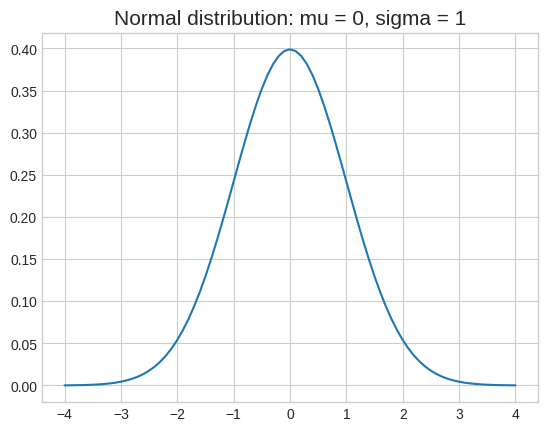

In [ ]:
# Normal distribution: mu = 0, sigma = 1

x = np.arange(-4, 4.1, 0.1)
y = np.exp(-np.square(x) / 2) / np.sqrt(2 * np.pi)

plt.style.use("seaborn-v0_8-whitegrid")
plt.title("Normal distribution: mu = 0, sigma = 1", size=15)
plt.plot(x, y)
plt.show()

–ü—Ä–æ–±–ª–µ–º–∞: –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è –Ω–æ—Ä–º–∞–ª—å–Ω—ã–º —à—É–º–æ–º –Ω–µ –≥–∞—Ä–∞–Ω—Ç–∏—Ä—É–µ—Ç –æ—Ç—Å—É—Ç—Å—Ç–≤–∏–µ –≤–∑—Ä—ã–≤–∞ –∏–ª–∏ –∑–∞—Ç—É—Ö–∞–Ω–∏—è –≥—Ä–∞–¥–∏–µ—Ç–∞.

**–ò–¥–µ—è 3:** —Ñ–æ—Ä–º–∞–ª–∏–∑—É–µ–º —É—Å–ª–æ–≤–∏—è, –ø—Ä–∏ –∫–æ—Ç–æ—Ä—ã—Ö –Ω–µ –±—É–¥–µ—Ç –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç—å –≤–∑—Ä—ã–≤ –∏–ª–∏ –∑–∞—Ç—É—Ö–∞–Ω–∏–µ –≥—Ä–∞–¥–∏–µ–Ω—Ç–æ–≤.

1. –ù–∞–º –±—ã —Ö–æ—Ç–µ–ª–æ—Å—å, —á—Ç–æ–±—ã **–¥–∏—Å–ø–µ—Ä—Å–∏–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤**, –ø–æ–ª—É—á–∞–µ–º—ã—Ö –Ω–∞ –∫–∞–∂–¥–æ–º —Å–ª–æ–µ, –±—ã–ª–∏ –æ–¥–∏–Ω–∞–∫–æ–≤—ã (—Ç.–µ –º—ã —Ö–æ—Ç–∏–º –∑–∞–¥–∞—Ç—å –Ω–∞—á–∞–ª—å–Ω—ã–µ –≤–µ—Å–∞ —Ç–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, —á—Ç–æ–±—ã –≤—Ö–æ–¥–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –∫–∞–∂–¥–æ–≥–æ –ª–∏–Ω–µ–π–Ω–æ–≥–æ —Å–ª–æ—è –±—ã–ª–∏ **–æ–¥–∏–Ω–∞–∫–æ–≤–æ –Ω–æ—Ä–º–∞–ª–∏–∑–æ–≤–∞–Ω—ã**).

–≠—Ç–æ –≤–∞–∂–Ω–æ, —Ç.–∫. –∑–Ω–∞—á–µ–Ω–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏—Å–ø–æ–ª—å–∑—É—é—Ç—Å—è –ø—Ä–∏ —Ä–∞—Å—á–µ—Ç–µ –≥—Ä–∞–¥–∏–µ–Ω—Ç–∞. –ù–∞–ø—Ä–∏–º–µ—Ä, –¥–ª—è –ª–∏–Ω–µ–π–Ω–æ–≥–æ —Å–ª–æ—è:
$$y = wx+b$$
$$\dfrac{\partial y} {\partial w} = x$$

–ó–∞–ø–∏—à–µ–º —ç—Ç–æ —É—Å–ª–æ–≤–∏–µ:

$$Dz^i = Dz^j. \tag{1}$$

2. –ù–∞–º –±—ã —Ö–æ—Ç–µ–ª–æ—Å—å, —á—Ç–æ–±—ã **–¥–∏—Å–ø–µ—Ä—Å–∏–∏ –≥—Ä–∞–¥–∏–µ–Ω—Ç–æ–≤** –¥–ª—è —Ä–∞–∑–Ω—ã—Ö —Å–ª–æ–µ–≤ –±—ã–ª–∏ –æ–¥–∏–Ω–∞–∫–æ–≤—ã:

$$D\dfrac {\partial L} {\partial z^i} = D\dfrac {\partial L} {\partial z^j}. \tag{2}$$


–ü—Ä–∏ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏–∏ —ç—Ç–∏—Ö —É—Å–ª–æ–≤–∏–π –≥—Ä–∞–¥–∏–µ–Ω—Ç **–Ω–µ –∑–∞—Ç—É—Ö–∞–µ—Ç** –∏ **–Ω–µ –≤–∑—Ä—ã–≤–∞–µ—Ç—Å—è**.

–ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏–∏ –ö—Å–∞–≤—å–µ –∏ –ö–∞–π–º–∏–Ω –•–µ –ø—ã—Ç–∞—é—Ç—Å—è –≤—ã–ø–æ–ª–Ω–∏—Ç—å —ç—Ç–∏ —É—Å–ª–æ–≤–∏—è.

## –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è –ö—Å–∞–≤—å–µ (Xavier Glorot)

–†–∞—Å—Å–º–æ—Ç—Ä–∏–º —Ñ—É–Ω–∫—Ü–∏—é –∞–∫—Ç–∏–≤–∞—Ü–∏–∏ **–≥–∏–ø–µ—Ä–±–æ–ª–∏—á–µ—Å–∫–∏–π —Ç–∞–Ω–≥–µ–Ω—Å** (Tanh).

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L07/out/simple_nn_with_tanh.png" width="600">

–≠—Ç–æ ‚Äî [–Ω–µ—á–µ—Ç–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è üìö[wiki]](https://ru.wikipedia.org/wiki/%D0%A7%D1%91%D1%82%D0%BD%D0%BE%D1%81%D1%82%D1%8C_%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D0%B8) —Å –µ–¥–∏–Ω–∏—á–Ω–æ–π –ø—Ä–æ–∏–∑–≤–æ–¥–Ω–æ–π –≤ –Ω—É–ª–µ. –§—É–Ω–∫—Ü–∏—è –∏ –µ–µ –ø—Ä–æ–∏–∑–≤–æ–¥–Ω–∞—è –∏–∑–æ–±—Ä–∞–∂–µ–Ω—ã –Ω–∏–∂–µ.

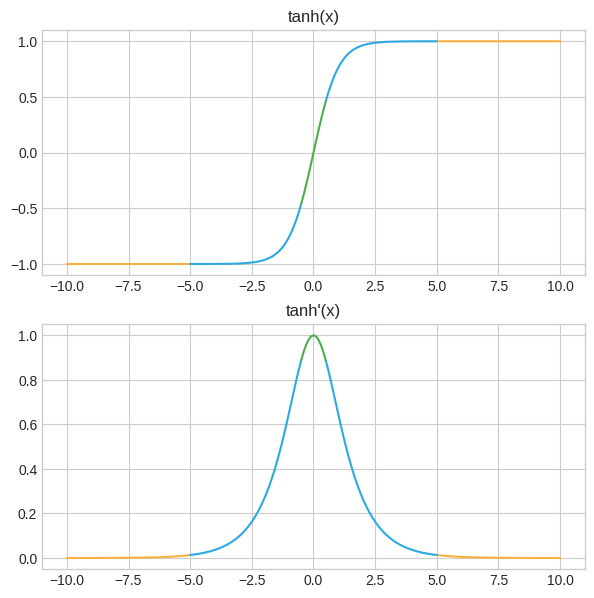

In [ ]:
x = np.arange(-10, 10.1, 0.1)
y = np.tanh(x)
dy = 1 / np.cosh(x)

plt.style.use("seaborn-v0_8-whitegrid")
fig, (im1, im2) = plt.subplots(2, 1, figsize=(7, 7))
im1.set(title="tanh(x)")

# fmt: off
im1.plot(x[0:51], y[0:51], "#F9B041",
         x[150:201], y[150:201], "#F9B041",
         x[50:96], y[50:96], "#2DA9E1",
         x[105:151], y[105:151], "#2DA9E1",
         x[95:106], y[95:106], "#4AAE4D",)
im1.grid(True)
im2.set(title="tanh'(x)")
im2.plot(x[0:51], dy[0:51], "#F9B041",
         x[150:201], dy[150:201], "#F9B041",
         x[50:96], dy[50:96], "#2DA9E1",
         x[105:151], dy[105:151], "#2DA9E1",
         x[95:106], dy[95:106], "#4AAE4D",)
# fmt: on

im2.grid(True)
plt.show()

–¢—Ä–µ—Ç—å—è –∏–Ω—Ç—É–∏—Ü–∏—è, –∫–æ—Ç–æ—Ä–∞—è –Ω–∞–º –ø–æ–Ω–∞–¥–æ–±–∏—Ç—Å—è: –Ω–∞–º –≤–∞–∂–Ω–æ –Ω–µ –ø–æ–ø–∞—Å—Ç—å –≤ <font color='#F9B041'>**–æ—Ä–∞–Ω–∂–µ–≤—ã–µ**</font>  –∑–æ–Ω—ã —Å –ø–æ—á—Ç–∏ –Ω—É–ª–µ–≤–æ–π –ø—Ä–æ–∏–∑–≤–æ–¥–Ω–æ–π, —Ç.–∫. –≤ —ç—Ç–∏—Ö –æ–±–ª–∞—Å—Ç—è—Ö –≥—Ä–∞–¥–∏–µ–Ω—Ç –∑–∞—Ç—É—Ö–∞–µ—Ç. –ú—ã —Ö–æ—Ç–∏–º –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å –≤–µ—Å–∞ —Ç–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, —á—Ç–æ–±—ã –ø—Ä–∏–∑–Ω–∞–∫–∏, –ø–æ—Å—Ç—É–ø–∞—é—â–∏–µ –Ω–∞ —Å–ª–æ–π –∞–∫—Ç–∏–≤–∞—Ü–∏–∏, –Ω–∞—Ö–æ–¥–∏–ª–∏—Å—å –≤ <font color='#4AAE4D'>**–∑–µ–ª–µ–Ω–æ–π**</font> –æ–±–ª–∞—Å—Ç–∏ –≤ –æ–∫—Ä–µ—Å—Ç–Ω–æ—Å—Ç–∏ –Ω—É–ª—è. –ú–∞—Ç–æ–∂–∏–¥–∞–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤, –ø–æ—Å—Ç—É–ø–∞—é—â–∏—Ö –Ω–∞ —Å–ª–æ–π –∞–∫—Ç–∏–≤–∞—Ü–∏–∏, –±—É–¥–µ—Ç —Ä–∞–≤–Ω–æ –Ω—É–ª—é
$$E(z^i_t w_{kt})=0.$$



–ú–æ–∂–Ω–æ  [–ø–æ–∫–∞–∑–∞—Ç—å](https://github.com/Gan4x4/ml_snippets/blob/main/Training/Weights_initipynb.ipynb), —á—Ç–æ –≤ <font color='#4AAE4D'>**–∑–µ–ª–µ–Ω–æ–π**</font> –æ–±–ª–∞—Å—Ç–∏ —É—Å–ª–æ–≤–∏—è $(1)$ –∏ $(2)$ –º–æ–∂–Ω–æ –ø–µ—Ä–µ–ø–∏—Å–∞—Ç—å –∫–∞–∫:

$$n_iDW^i = 1$$
$$n_{i+1}DW^i = 1$$

–≥–¥–µ –≥–¥–µ $n_i$ ‚Äî —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å –≤—ã—Ö–æ–¥–∞ —Å–ª–æ—è i-–≥–æ —Å–ª–æ—è.


–ï—Å–ª–∏ —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å —Å–ª–æ–µ–≤ –æ—Ç–ª–∏—á–∞–µ—Ç—Å—è, —Ç–æ —É—Å–ª–æ–≤–∏—è –Ω–µ–≤—ã–ø–æ–ª–Ω–∏–º—ã –æ–¥–Ω–æ–≤—Ä–µ–º–µ–Ω–Ω–æ:

 $$n_i \ne n_{i+1}. $$

–ù–∞ –ø—Ä–∞–∫—Ç–∏–∫–µ —Ö–æ—Ä–æ—à–æ —Ä–∞–±–æ—Ç–∞–µ—Ç –∫–æ–º–ø—Ä–æ–º–∏—Å—Å ‚Äî —Å—Ä–µ–¥–Ω–µ–µ –≥–∞—Ä–º–æ–Ω–∏—á–µ—Å–∫–æ–µ —Ä–µ—à–µ–Ω–∏–π –ø–µ—Ä–≤–æ–≥–æ $\dfrac 1 {n_i}$ –∏ –≤—Ç–æ—Ä–æ–≥–æ $\dfrac 1 {n_{i+1}}$ —É—Ä–∞–≤–Ω–µ–Ω–∏—è:

$$DW^i = \dfrac 2 {n_i + n_{i+1}}.$$

**–ò—Ç–æ–≥–æ:** –Ω–∞–º –Ω—É–∂–Ω–æ –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å –≤–µ—Å–∞ –Ω–µ–π—Ä–æ–Ω–æ–≤ —Å–ª—É—á–∞–π–Ω—ã–º–∏ –≤–µ–ª–∏—á–∏–Ω–∞–º–∏ —Å–æ —Å–ª–µ–¥—É—é—â–∏–º–∏ –º–∞—Ç–æ–∂–∏–¥–∞–Ω–∏–µ–º –∏ –¥–∏—Å–ø–µ—Ä—Å–∏–µ–π:

$$ EW^i = 0,$$

$$DW^i = \dfrac 2 {n_i + n_{i+1}}.$$

–ú—ã –º–æ–∂–µ–º –≤–∑—è—Ç—å [—Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ üìö[wiki]](https://ru.wikipedia.org/wiki/%D0%9D%D0%B5%D0%BF%D1%80%D0%B5%D1%80%D1%8B%D0%B2%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D0%B2%D0%BD%D0%BE%D0%BC%D0%B5%D1%80%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5). –ò–º–µ–Ω–Ω–æ —Ç–∞–∫–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –±—ã–ª–æ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–æ –≤ [—Å—Ç–∞—Ç—å–µ](http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf):

$$W_i \sim U[a, b ],$$

–≥–¥–µ $a=-b$, —Ç–∞–∫ –∫–∞–∫ –º–∞—Ç–æ–∂–∏–¥–∞–Ω–∏–µ —Ä–∞–≤–Ω–æ 0

–î–∏—Å–ø–µ—Ä—Å–∏—è –∫–æ—Ç–æ—Ä–æ–≥–æ –≤—ã—Ä–∞–∂–∞–µ—Ç—Å—è —Ñ–æ—Ä–º—É–ª–æ–π:
$$D(U[a, b]) = \dfrac 1 {12} (b -a)^2 = \dfrac 4 {12} b^2 = \dfrac 1 {3} b^2.$$

–ü–æ–ª—É—á–∏–º:

$$ b = \sqrt{\dfrac {6} {n_i + n_{i + 1}}}$$

**–ò—Ç–æ–≥–æ:**

$$W_i \sim U[-\sqrt{\dfrac {6} {n_i + n_{i + 1}}}, \sqrt{\dfrac {6} {n_i + n_{i + 1}}}],$$

–≥–¥–µ $n_i$ ‚Äî —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å –≤—ã—Ö–æ–¥–∞ —Å–ª–æ—è n-–≥–æ —Å–ª–æ—è.




–ú–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –∏ –¥—Ä—É–≥–∏–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è, –Ω–∞–ø—Ä–∏–º–µ—Ä [–Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ üìö[wiki]](https://ru.wikipedia.org/wiki/%D0%9D%D0%BE%D1%80%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5). –î–ª—è –Ω–µ–≥–æ –ø–æ–ª—É—á–∏—Ç—Å—è:
$$W_i \sim N (0,  std=\sqrt{\dfrac{2}{n_i + n_{i + 1}}})$$
–†–µ–∑—É–ª—å—Ç–∞—Ç –ø–æ–ª—É—á–∏—Ç—Å—è –∞–Ω–∞–ª–æ–≥–∏—á–Ω—ã–π.


–ß—Ç–æ–±—ã –ø–æ–Ω—è—Ç—å, —á—Ç–æ –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç —Å –≤—ã—Ö–æ–¥–∞–º–∏ —Å–ª–æ—è –∞–∫—Ç–∏–≤–∞—Ü–∏–∏ –ø—Ä–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏ –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏–∏ Xavier, —Ä–∞—Å—Å–º–æ—Ç—Ä–∏–º –∫–∞—Ä—Ç–∏–Ω–∫—É –∏–∑ –æ—Ä–∏–≥–∏–Ω–∞–ª—å–Ω–æ–π —Å—Ç–∞—Ç—å–∏ [Xavier, Yoshua, "Understanding the difficulty of training deep feedforward neural networks", Aistats, 2010](http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf):

<center><img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/L07/xavier_procentile_and_deviation_with_and_without_init.png" width="600"></center>

<center><em>Source: <a href="http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf">Understanding the difficulty of training deep feedforward neural networks</a></em></center>

–ù–∞ –∫–∞—Ä—Ç–∏–Ω–∫–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∞ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å 98-[–ø—Ä–æ—Ü–µ–Ω—Ç–∏–ª—è üìö[wiki]](https://en.wikipedia.org/wiki/Percentile) (–æ—Ç–¥–µ–ª—å–Ω—ã–µ –º–∞—Ä–∫–µ—Ä—ã) –∏ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–≥–æ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏—è (—Å–æ–µ–¥–∏–Ω–µ–Ω–Ω—ã–µ –º–∞—Ä–∫–µ—Ä—ã) –∑–Ω–∞—á–µ–Ω–∏–π –Ω–∞ –≤—ã—Ö–æ–¥–µ —Å–ª–æ—è –∞–∫—Ç–∏–≤–∞—Ü–∏–∏ $tanh$ –æ—Ç —ç–ø–æ—Ö–∏ –æ–±—É—á–µ–Ω–∏—è –¥–ª—è —Ä–∞–∑–ª–∏—á–Ω—ã—Ö —Å–ª–æ–µ–≤ –Ω–µ–π—Ä–æ—Å–µ—Ç–∏.

–í–µ—Ä—Ö–Ω–µ–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ ‚Äî –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è –≤–µ—Å–æ–≤ —Å –ø–æ–º–æ—â—å—é –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è $W_i \sim U[-\dfrac {1} {\sqrt{n_i}}, \dfrac {1} {\sqrt{n_i}} ]$. –ù–∏–∂–Ω–µ–µ ‚Äî —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏–∏ Xavier.

–ù–∞ –≤–µ—Ä—Ö–Ω–µ–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–∏ –≤–∏–¥–Ω–æ, –∫–∞–∫ –∑–Ω–∞—á–µ–Ω–∏—è 98-–ø—Ä–æ—Ü–µ–Ω—Ç–∏–ª—è —É—Ö–æ–¥—è—Ç –≤ –∑–Ω–∞—á–µ–Ω–∏—è +1 –∏ -1 (—Å–Ω–∞—á–∞–ª–∞ –Ω–∞ –≤—ã—Ö–æ–¥–µ –ø–µ—Ä–≤–æ–≥–æ —Å–ª–æ—è, –ø–æ—Ç–æ–º –Ω–∞ –≤—ã—Ö–æ–¥–µ –≤—Ç–æ—Ä–æ–≥–æ –∏ —Ç.–¥.). –≠—Ç–æ –∑–Ω–∞—á–∏—Ç, —á—Ç–æ –¥–ª—è —á–∞—Å—Ç–∏ –Ω–µ–π—Ä–æ–Ω–æ–≤ –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç –∑–∞—Ç—É—Ö–∞–Ω–∏–µ –≥—Ä–∞–¥–∏–µ–Ω—Ç–æ–≤ (–æ–Ω–∏ –ø–µ—Ä–µ—Ö–æ–¥—è—Ç –≤ –æ–±–ª–∞—Å—Ç—å, –æ—Ç–º–µ—á–µ–Ω–Ω—É—é –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–∞—Ö $tanh(x)$, $tanh‚Äô(x)$ <font color='#F9B041'>**–æ—Ä–∞–Ω–∂–µ–≤—ã–º**</font>  –∏ –ø–µ—Ä–µ—Å—Ç–∞—é—Ç —É—á–∏—Ç—å—Å—è). –ù–∞ –Ω–∏–∂–Ω–µ–π –∫–∞—Ä—Ç–∏–Ω–∫–µ —Ç–∞–∫–æ–≥–æ –Ω–µ –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç.

Xavier –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –¥–ª—è —Å–∏–º–º–µ—Ç—Ä–∏—á–Ω—ã—Ö —Ñ—É–Ω–∫—Ü–∏–π –∞–∫—Ç–∏–≤–∞—Ü–∏–π, —Ç–∞–∫–∏—Ö –∫–∞–∫ **tanh** –∏ **sigmoid**.


–í–æ–æ–±—â–µ –≥–æ–≤–æ—Ä—è, –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –≤ –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è—Ö (—á–∏—Å–ª–∏—Ç–µ–ª—å –≤ —Ñ–æ—Ä–º—É–ª–µ –¥–ª—è –¥–∏—Å–ø–µ—Ä—Å–∏–∏), –∑–∞–≤–∏—Å—è—Ç –æ—Ç –∫–æ–Ω–∫—Ä–µ—Ç–Ω–æ–π **–≤—ã–±—Ä–∞–Ω–Ω–æ–π —Ñ—É–Ω–∫—Ü–∏–∏ –∞–∫—Ç–∏–≤–∞—Ü–∏–∏**.
–í PyTorch –µ—Å—Ç—å [—Ñ—É–Ω–∫—Ü–∏–∏](https://pytorch.org/docs/stable/nn.init.html) –¥–ª—è –≤—ã—á–∏—Å–ª–µ–Ω–∏—è —ç—Ç–∏—Ö –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤.


## –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è –ö–∞–π–º–∏–Ω –•–µ (Kaiming He)

–î–ª—è —Ñ—É–Ω–∫—Ü–∏–∏ –∞–∫—Ç–∏–≤–∞—Ü–∏–∏ **ReLU** –∏ –µ–µ –º–æ–¥–∏—Ñ–∏–∫–∞—Ü–∏–π (**PReLU**, **Leaky ReLU** –∏ —Ç.–¥.) –∞–Ω–∞–ª–æ–≥–∏—á–Ω–æ –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏–∏ Xavier –º–æ–∂–Ω–æ —Ä–∞—Å–ø–∏—Å–∞—Ç—å —É—Å–ª–æ–≤–∏—è $(1)$, $(2)$. –¢–∞–∫ –≤–≤–æ–¥–∏—Ç—Å—è He-–∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è.

–£—Å–ª–æ–≤–∏—è $(1)$, $(2)$ —ç–∫–≤–∏–≤–∞–ª–µ–Ω—Ç–Ω—ã —É—Å–ª–æ–≤–∏—è–º:

$$  \dfrac {n_iDW^i} {2}  = 1, $$

$$\dfrac {n_{i+1}DW^i} {2} = 1.$$

–ú–æ–∂–Ω–æ –æ–ø—è—Ç—å –≤–∑—è—Ç—å —Å—Ä–µ–¥–Ω–µ–µ –≥–∞—Ä–º–æ–Ω–∏—á–µ—Å–∫–æ–µ. –ù–æ –Ω–∞ –ø—Ä–∞–∫—Ç–∏–∫–µ –±–µ—Ä—É—Ç –ª–∏–±–æ $\displaystyle \frac 2 {n_i}$, –ª–∏–±–æ $\displaystyle \frac 2 {n_i + 1}$.

–ò—Ç–æ–≥–æ –ø–æ–ª—É—á–∏–º –¥–ª—è –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è:

$$W^i \sim N(0, std=\sqrt{\frac 2 {n_i}})$$

–î–ª—è —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è:
$$W^i \sim U(-\sqrt{\frac 3 {n_i}}, \sqrt{\frac 3 {n_i}})$$

–ë–æ–ª–µ–µ –ø–æ–¥—Ä–æ–±–Ω–æ —Å –≤—ã–≤–æ–¥–æ–º –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏–∏ –ö–∞–π–º–∏–Ω –•–µ –º–æ–∂–Ω–æ –æ–∑–Ω–∞–∫–æ–º–∏—Ç—å—Å—è –≤ –æ—Ä–∏–≥–∏–Ω–∞–ª—å–Ω–æ–π [—Å—Ç–∞—Ç—å–µ](https://arxiv.org/pdf/1502.01852v1.pdf).

## –í–∞–∂–Ω–æ—Å—Ç—å –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏–∏ –≤–µ—Å–æ–≤

1. –ù–µ–π—Ä–æ—Å–µ—Ç—å –º–æ–∂–µ—Ç **—Å–æ–π—Ç–∏—Å—å –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –±—ã—Å—Ç—Ä–µ–µ**. –ì—Ä–∞—Ñ–∏–∫–∏ –¥–ª—è –∞–∫—Ç–∏–≤–∞—Ü–∏–∏ **ReLU**:


<img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/L07/weight_initialization_influence_convergence_neural_networks.png" width="550">

<em>Source: <a href="https://arxiv.org/pdf/1502.01852v1.pdf">Delving Deep into Rectifiers: Surpassing Human-Level Performance on ImageNet Classification</a></em>

2. –í –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –≤—ã–±—Ä–∞–Ω–Ω–æ–π –∞–∫—Ç–∏–≤–∞—Ü–∏–∏ —Å–µ—Ç—å –≤–æ–æ–±—â–µ –º–æ–∂–µ—Ç **—Å–æ–π—Ç–∏—Å—å –∏–ª–∏ –Ω–µ —Å–æ–π—Ç–∏—Å—å**. –ì—Ä–∞—Ñ–∏–∫–∏ –¥–ª—è –∞–∫—Ç–∏–≤–∞—Ü–∏–∏ **ReLU**:

<img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/L07/activation_function_influence_convergence_neural_networks.png" width="550">

<em>Source: <a href="https://arxiv.org/pdf/1502.01852v1.pdf">Delving Deep into Rectifiers: Surpassing Human-Level Performance on ImageNet Classification</a></em>

## –û—Ä—Ç–æ–≥–æ–Ω–∞–ª—å–Ω–∞—è –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è

–î—Ä—É–≥–æ–π –∏–¥–µ–µ–π —è–≤–ª—è–µ—Ç—Å—è **–æ—Ä—Ç–æ–≥–æ–Ω–∞–ª—å–Ω–∞—è –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è**.
[–ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ üìö[wiki]](https://ru.wikipedia.org/wiki/%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%BE%D0%B5_%D0%BE%D1%82%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5), –∑–∞–¥–∞–Ω–Ω–æ–µ [–æ—Ä—Ç–æ–≥–æ–Ω–∞–ª—å–Ω–æ–π –º–∞—Ç—Ä–∏—Ü–µ–π üìö[wiki]](https://ru.wikipedia.org/wiki/%D0%9E%D1%80%D1%82%D0%BE%D0%B3%D0%BE%D0%BD%D0%B0%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86%D0%B0), **–Ω–µ –∏–∑–º–µ–Ω—è–µ—Ç —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ –º–µ–∂–¥—É —Ç–æ—á–∫–∞–º–∏**. –ú–æ–∂–Ω–æ –ø—Ä–µ–¥—Å—Ç–∞–≤–∏—Ç—å **–æ—Ä—Ç–æ–≥–æ–Ω–∞–ª—å–Ω—É—é –º–∞—Ç—Ä–∏—Ü—É** –∫–∞–∫ [–º–∞—Ç—Ä–∏—Ü—É –ø–æ–≤–æ—Ä–æ—Ç–∞ üìö[wiki]](https://ru.wikipedia.org/wiki/%D0%9C%D0%B0%D1%82%D1%80%D0%B8%D1%86%D0%B0_%D0%BF%D0%BE%D0%B2%D0%BE%D1%80%D0%BE%D1%82%D0%B0) (—ç—Ç–æ –Ω–µ —Å–æ–≤—Å–µ–º –≤–µ—Ä–Ω–æ, —Ç.–∫. –º–∞—Ç—Ä–∏—Ü—ã –ø–µ—Ä–µ—Å—Ç–∞–Ω–æ–≤–∫–∏ —Ç–æ–∂–µ –æ—Ä—Ç–æ–≥–æ–Ω–∞–ª—å–Ω—ã), —Ç.–µ. –ª–∏–Ω–µ–π–Ω—ã–π —Å–ª–æ–π –±—É–¥–µ—Ç **—Ä–∞–∑–≤–æ—Ä–∞—á–∏–≤–∞—Ç—å** –∫–∞—Ä—Ç—É –ø—Ä–∏–∑–Ω–∞–∫–æ–≤, —á—Ç–æ–±—ã —Å–æ–±–∏—Ä–∞—Ç—å –∏—Ö –ª–∏–Ω–µ–π–Ω—ã–µ –∫–æ–æ–º–±–∏–Ω–∞—Ü–∏–∏, **–Ω–µ –∏–∑–º–µ–Ω—è—è –º–∞—Å—à—Ç–∞–± –ø—Ä–∏–∑–Ω–∞–∫–æ–≤**.


In [ ]:
# –æ—Ä—Ç–æ–≥–æ–Ω–∞–ª—å–Ω—ã–µ –º–∞—Ç—Ä–∏—Ü—ã –∫–≤–∞–¥—Ä–∞—Ç–Ω—ã–µ, –ø–æ–∑–≤–æ–ª—è—é—Ç —Å–¥–µ–ª–∞—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–∏ –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ –Ω–µ–ø–æ—Ö–æ–∂–∏–º–∏

–î–ª—è –∫–∞–∂–¥–æ–≥–æ —Å–ª–æ—è –º—ã —É–±–µ–∂–¥–∞–µ–º—Å—è, —á—Ç–æ –∏–∑–Ω–∞—á–∞–ª—å–Ω–∞—è –º–∞—Ç—Ä–∏—Ü–∞ –≤–µ—Å–æ–≤ —è–≤–ª—è–µ—Ç—Å—è –æ—Ä—Ç–æ–≥–æ–Ω–∞–ª—å–Ω–æ–π.

–í—ã–±–µ—Ä–µ–º –æ—Ä—Ç–æ–≥–æ–Ω–∞–ª—å–Ω—É—é –º–∞—Ç—Ä–∏—Ü—É –≤–µ—Å–æ–≤
$$W: WW^T = 1$$

–¢–æ–≥–¥–∞:
1.  –ù–æ—Ä–º–∞ –∞–∫—Ç–∏–≤–∞—Ü–∏–∏ —Å–æ—Ö—Ä–∞–Ω—è–µ—Ç—Å—è (–æ–ø—è—Ç—å –∂–µ, –∞–∫—Ç–∏–≤–∞—Ü–∏–∏ –º–µ–∂–¥—É —Å–ª–æ—è–º–∏ –æ—Å—Ç–∞—é—Ç—Å—è –≤ –æ–¥–Ω–æ–º –º–∞—Å—à—Ç–∞–±–µ):
$$||s_{i+1}|| = ||W_{i}s_i|| = ||s_i||$$

2.  –í—Å–µ –Ω–µ–π—Ä–æ–Ω—ã –¥–µ–ª–∞—é—Ç ¬´—Ä–∞–∑–Ω—ã–µ¬ª –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è:
$$ ‚ü®W_i, W_j‚ü© = 0~i \ne j$$
$$ ‚ü®W_i, W_j‚ü© = 1~i = j$$


–ó–∞–º–µ—á–∞–Ω–∏–µ: —Ç.–∫. –æ—Ä—Ç–æ–≥–æ–Ω–∞–ª—å–Ω—ã–µ –º–∞—Ç—Ä–∏—Ü—ã –±—ã–≤–∞—é—Ç —Ç–æ–ª—å–∫–æ –∫–≤–∞–¥—Ä–∞—Ç–Ω—ã–µ, —Ç–æ —ç—Ç–æ—Ç –º–µ—Ç–æ–¥ –ø–æ–¥—Ö–æ–¥–∏—Ç —Ç–æ–ª—å–∫–æ –¥–ª—è —Å–ª–æ–µ–≤ —Å –æ–¥–∏–Ω–∞–∫–æ–≤—ã–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –≤—Ö–æ–¥–Ω—ã—Ö –∏ –≤—ã—Ö–æ–¥–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π.


–ò–Ω–æ–≥–¥–∞ —Ç–∞–∫–∞—è –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è –æ–±–µ—Å–ø–µ—á–∏–≤–∞–µ—Ç –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –ª—É—á—à—É—é —Å—Ö–æ–¥–∏–º–æ—Å—Ç—å, [—Ç—É—Ç](https://arxiv.org/pdf/1312.6120.pdf) –º–æ–∂–Ω–æ –ø–æ—á–∏—Ç–∞—Ç—å –æ–± —ç—Ç–æ–º –ø–æ–¥—Ä–æ–±–Ω–µ–µ.

## –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è –≤–µ—Å–æ–≤ –≤ PyTorch

–î–ª—è –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏–∏ –≤–µ—Å–æ–≤ PyTorch –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –º–æ–¥—É–ª—å `torch.nn.init`

–í –Ω–µ–º –æ–ø—Ä–µ–¥–µ–ª–µ–Ω—ã —Ä–∞–∑–Ω—ã–µ —Ñ—É–Ω–∫—Ü–∏–∏ –¥–ª—è –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏–∏ –≤–µ—Å–æ–≤.

–ù—é–∞–Ω—Å —Å–æ—Å—Ç–æ–∏—Ç –≤ —Ç–æ–º, —á—Ç–æ –æ–±—ã—á–Ω–æ –¥–ª—è —Å–ª–æ–µ–≤ —Ä–∞–∑–Ω–æ–≥–æ —Ç–∏–ø–∞ –º–æ–∂–µ—Ç —Ç—Ä–µ–±–æ–≤–∞—Ç—å—Å—è —Ä–∞–∑–Ω–∞—è –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è. –ü–æ—ç—Ç–æ–º—É –≤ —Ñ—É–Ω–∫—Ü–∏–∏, –∫–æ—Ç–æ—Ä–∞—è –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä—É–µ—Ç —Å–ª–æ–∏ –≤–∞—à–µ–π –Ω–µ–π—Ä–æ–Ω–Ω–æ–π —Å–µ—Ç–∏, –∂–µ–ª–∞—Ç–µ–ª—å–Ω–æ –ø—Ä–æ–ø–∏—Å—ã–≤–∞—Ç—å —Ä–∞–∑–Ω–æ–µ –ø–æ–≤–µ–¥–µ–Ω–∏–µ –¥–ª—è —Ä–∞–∑–Ω—ã—Ö —Å–ª–æ–µ–≤.

–ü–æ–ø—Ä–æ–±—É–µ–º, –Ω–∞–ø—Ä–∏–º–µ—Ä, –¥–æ–±–∞–≤–∏—Ç—å –≤ –Ω–∞—à—É –Ω–µ–π—Ä–æ—Å–µ—Ç—å –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—é. –ù–∞–º –Ω—É–∂–Ω–∞ –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è Xavier, —Ç–∞–∫ –∫–∞–∫ —É –Ω–∞—Å `nn.Sigmoid`

–ú–µ—Ç–æ–¥ `torch.nn.init.calculate_gain` –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç —Ä–µ–∫–æ–º–µ–Ω–¥—É–µ–º–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–∞ –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏—è –¥–ª—è —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–≥–æ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏—è –∑–∞–¥–∞–Ω–Ω–æ–π —Ñ—É–Ω–∫—Ü–∏–∏ –∞–∫—Ç–∏–≤–∞—Ü–∏–∏.

In [ ]:
class SimpleMNIST_NN(nn.Module):
    def __init__(self, n_layers, activation=nn.Sigmoid, init_form="normal"):
        super().__init__()
        self.n_layers = n_layers
        self.activation = activation()
        layers = [nn.Linear(28 * 28, 100), self.activation]
        for _ in range(0, n_layers - 1):
            layers.append(nn.Linear(100, 100))
            layers.append(self.activation)
        layers.append(nn.Linear(100, 10))
        self.layers = nn.Sequential(*layers)
        self.init_form = init_form
        if self.init_form is not None:
            self.init()

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.layers(x)
        return x

    # xavier weight initialization
    def init(self):
        sigmoid_gain = torch.nn.init.calculate_gain("sigmoid")
        for child in self.layers.children():
            if isinstance(child, nn.Linear):
                if self.init_form == "normal":
                    torch.nn.init.xavier_normal_(child.weight, gain=sigmoid_gain)
                    if child.bias is not None:
                        torch.nn.init.zeros_(child.bias)
                elif self.init_form == "uniform":
                    torch.nn.init.xavier_uniform_(child.weight, gain=sigmoid_gain)
                    if child.bias is not None:
                        torch.nn.init.zeros_(child.bias)
                else:
                    raise NotImplementedError()

–ó–∞–ø—É—Å—Ç–∏–º –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ —Å –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏–µ–π –≤–µ—Å–æ–≤ Xavier:

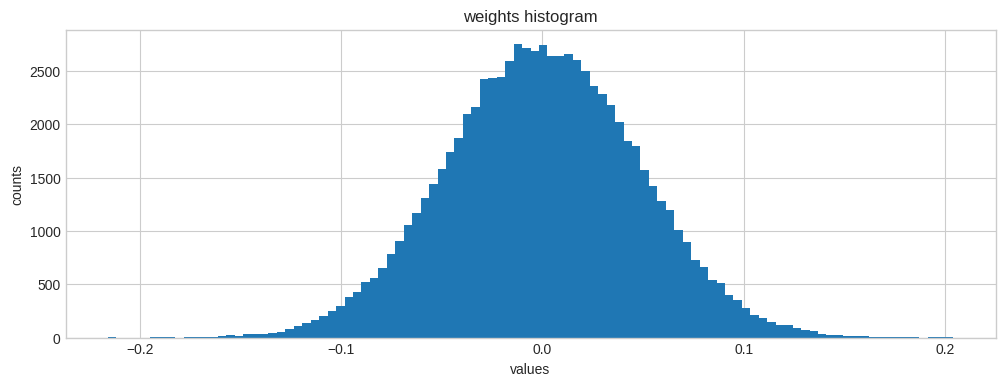

  0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
model = SimpleMNIST_NN(n_layers=3, init_form="normal").to(device)
optimizer = optim.SGD(model.parameters(), lr=0.001)

# plotting weights values of first(input layer)
plt.figure(figsize=(12, 4))
plt.hist(
    list(model.layers.children())[0].weight.cpu().detach().numpy().reshape(-1), bins=100
)
plt.title("weights histogram")
plt.xlabel("values")
plt.ylabel("counts")
plt.show()

model_name = "n3_layers_sigmoid_havier"
history = train_model(model, optimizer, model_name=model_name)

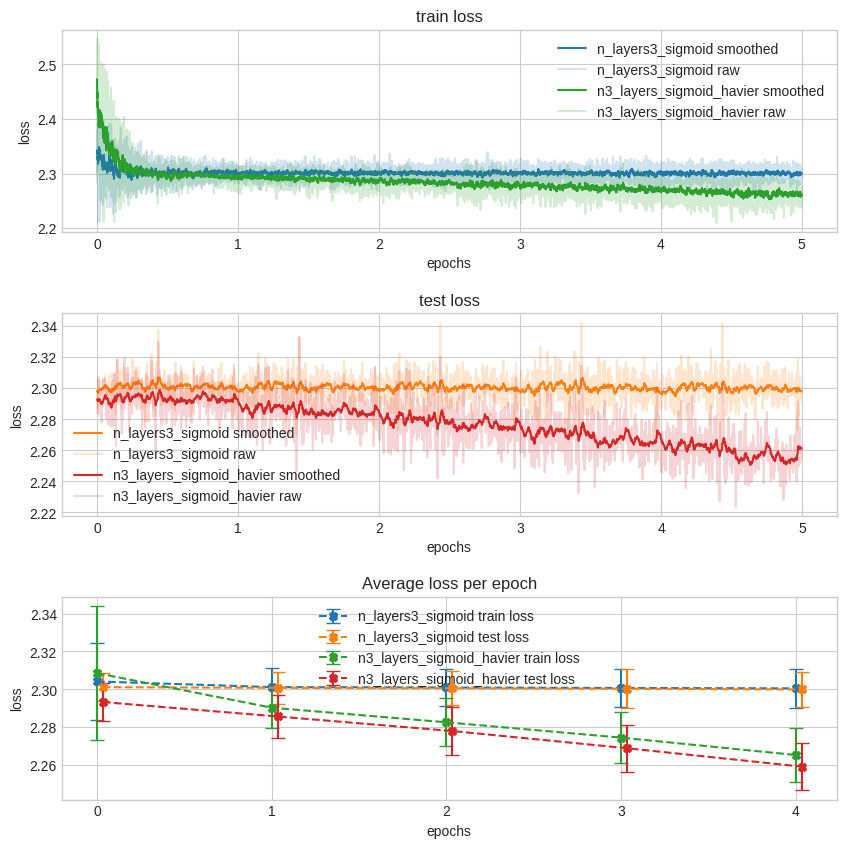

In [ ]:
history_plotter.add(history)
history_plotter.plot(["n_layers3_sigmoid", model_name])

–í–∏–¥–∏–º, —á—Ç–æ –Ω–µ–π—Ä–æ—Å–µ—Ç—å —Å—Ç–∞–ª–∞ —Ö–æ—Ç—å –∫–∞–∫-—Ç–æ —É—á–∏—Ç—å—Å—è.

# –°–ª–æ–∏ –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏

## Covariate shift (–ö–æ–≤–∞—Ä–∏–∞–Ω—Ç–Ω—ã–π —Å–¥–≤–∏–≥)

**Covariate shift** &mdash; —è–≤–ª–µ–Ω–∏–µ, –∫–æ–≥–¥–∞ –ø—Ä–∏–∑–Ω–∞–∫–∏ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –∏ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–æ–∫ **—Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω—ã –ø–æ-—Ä–∞–∑–Ω–æ–º—É**. –ö–æ–≤–∞—Ä–∏–∞–Ω—Ç–Ω—ã–π —Å–¥–≤–∏–≥ –º–æ–∂–µ—Ç —Å—Ç–∞—Ç—å —Å–µ—Ä—å–µ–∑–Ω–æ–π –ø—Ä–æ–±–ª–µ–º–æ–π –¥–ª—è –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–æ–≥–æ –ø—Ä–∏–º–µ–Ω–µ–Ω–∏—è –º–æ–¥–µ–ª–µ–π.

<center><img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L07/out/covariate_shift.png" width="450"></center>

–ú–æ–¥–µ–ª—å —É—á–∏—Ç—Å—è —Å–æ–ø–æ—Å—Ç–∞–≤–ª—è—Ç—å —Ü–µ–ª–µ–≤—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –ø—Ä–∏–∑–Ω–∞–∫–∞–º. –í —Ç–∞–∫–æ–π —Å–∏—Ç—É–∞—Ü–∏–∏ –º–æ–¥–µ–ª—å –Ω–µ –≤ —Å–æ—Å—Ç–æ—è–Ω–∏–∏ –¥–µ–ª–∞—Ç—å –∞–¥–µ–∫–≤–∞—Ç–Ω—ã–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –Ω–∞ —Ç–µ—Å—Ç–µ, —Ç–∞–∫ –∫–∞–∫ –≤–æ –≤—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è –æ–Ω–∞ –Ω–µ –≤–∏–¥–µ–ª–∞ –æ–±–ª–∞—Å—Ç–∏ –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–∞, –≤ –∫–æ—Ç–æ—Ä–æ–π —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω—ã —Ç–µ—Å—Ç–æ–≤—ã–µ –æ–±—ä–µ–∫—Ç—ã.

<center><img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L07/out/covariate_shift_problem.png" width="450"></center>

–í—ã–¥–µ–ª—è—é—Ç **–¥–≤–∞ –∏—Å—Ç–æ—á–Ω–∏–∫–∞ –æ—à–∏–±–æ–∫**, –ø—Ä–∏–≤–æ–¥—è—â–∏—Ö –∫ **–∫–æ–≤–∞—Ä–∏–∞–Ω—Ç–Ω–æ–º—É —Å–¥–≤–∏–≥—É**:

1. **–°–∏—Å—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–∏–µ –æ—à–∏–±–∫–∏**:
*   *–û—à–∏–±–∫–∏ –ø—Ä–∏ —Å–±–æ—Ä–µ –¥–∞–Ω–Ω—ã—Ö* (–ø—Ä–µ–¥–≤–∑—è—Ç—ã–π –º–µ—Ç–æ–¥ —Å–±–æ—Ä–∞ –¥–∞–Ω–Ω—ã—Ö, –Ω–µ—Ä–µ–ø—Ä–µ–∑–µ–Ω—Ç–∞—Ç–∏–≤–Ω–∞—è –≤—ã–±–æ—Ä–∫–∞).

**–ü—Ä–∏–º–µ—Ä:** —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã–µ –Ω–∞–±–æ—Ä—ã –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –∑–∞–¥–∞—á–∏ **Face Recognition** –Ω–µ —Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω—ã –ø–æ –ø–æ–ª—É, –≤–æ–∑—Ä–∞—Å—Ç—É –∏ —ç—Ç–Ω–∏—á–µ—Å–∫–æ–π –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–Ω–æ—Å—Ç–∏, –ø–æ—ç—Ç–æ–º—É –æ–±—É—á–µ–Ω–Ω—ã–µ –Ω–∞ –Ω–∏—Ö –º–æ–¥–µ–ª–∏ –º–æ–≥—É—Ç –ø–ª–æ—Ö–æ —Ä–∞–±–æ—Ç–∞—Ç—å —Å —Ä–µ–¥–∫–∏–º–∏ –∫–ª–∞—Å—Å–∞–º–∏. –≠—Ç–æ –ø—Ä–∏–≤–µ–ª–æ –∫ –æ–±–≤–∏–Ω–µ–Ω–∏—è–º —Ç–∞–∫–∏—Ö –∫–æ—Ä–ø–æ—Ä–∞—Ü–∏–π, –∫–∞–∫ Microsoft, IBM –∏ Amazon, –≤ [—Ä–∞—Å–∏–∑–º–µ](https://projects.iq.harvard.edu/sciencepolicy/blog/racial-discrimination-face-recognition-technology).

<center><img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/L07/face_recognition_racism.webp" width="1000"></center>
<center><em>Source: <a href="https://projects.iq.harvard.edu/sciencepolicy/blog/racial-discrimination-face-recognition-technology">Racial Discrimination in Face Recognition Technology</a></em></center>

**–ß—Ç–æ –¥–µ–ª–∞—Ç—å?**
–°–ª–µ–¥–∏—Ç—å –∑–∞ —Ä–µ–ø—Ä–µ–∑–µ–Ω—Ç–∞—Ç–∏–≤–Ω–æ—Å—Ç—å—é –¥–∞–Ω–Ω—ã—Ö, –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å Importance Reweighting (–ø—Ä–∏ –æ–±—É—á–µ–Ω–∏–∏ –¥–∞–≤–∞—Ç—å –±–æ–ª—å—à–∏–π –≤–µ—Å —Ä–µ–¥–∫–∏–º –æ–±—ä–µ–∫—Ç–∞–º).


*  *–†–∞–∑–ª–∏—á–∏–µ —É—Å–ª–æ–≤–∏–π —Å–±–æ—Ä–∞ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è train –∏ test –≤—ã–±–æ—Ä–∫–∏*

**–ü—Ä–∏–º–µ—Ä:** –ó–∞–¥–∞—á–∏ –∫–æ–º–ø—å—é—Ç–µ—Ä–Ω–æ–≥–æ –∑—Ä–µ–Ω–∏—è. –î–∞–Ω–Ω—ã—Ö –¥–ª—è –æ–±—É—á–µ–Ω–∏—è –º–æ–∂–µ—Ç –±—ã—Ç—å –Ω–µ–¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ, –ø–æ—ç—Ç–æ–º—É —á–∞—Å—Ç–æ –¥–ª—è –æ–±—É—á–µ–Ω–∏—è –∏—Å–ø–æ–ª—å–∑—É—é—Ç –¥–∞—Ç–∞—Å–µ—Ç—ã –∏–∑ –ò–Ω—Ç–µ—Ä–Ω–µ—Ç–∞. –ü—Ä–∏ —ç—Ç–æ–º —É—Å–ª–æ–≤–∏—è —Å—ä–µ–º–∫–∏ (–∫–∞—á–µ—Å—Ç–≤–æ, —Ä–∞–∑—Ä–µ—à–µ–Ω–∏–µ, –æ—Å–≤–µ—â–µ–Ω–Ω–æ—Å—Ç—å) train –∏ test –≤—ã–±–æ—Ä–æ–∫ –º–æ–≥—É—Ç –æ—Ç–ª–∏—á–∞—Ç—å—Å—è.

**–ß—Ç–æ –¥–µ–ª–∞—Ç—å?** –ê—É–≥–º–µ–Ω—Ç–∏—Ä–æ–≤–∞—Ç—å –¥–∞–Ω–Ω—ã–µ —Å —É—á–µ—Ç–æ–º —É—Å–ª–æ–≤–∏–π –ø—Ä–∏–º–µ–Ω–µ–Ω–∏—è.

* *–û—à–∏–±–∫–∏ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∏ –¥–∞–Ω–Ω—ã—Ö*

**–ü—Ä–∏–º–µ—Ä:** –í –∫–∞—Ä—Ç–∞—Ö –ø–∞—Ü–∏–µ–Ω—Ç–æ–≤ –±–æ–ª—å–Ω–∏—Ü—ã –ê, –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–Ω—ã—Ö –¥–ª—è train, —Ä–æ—Å—Ç –ø–∞—Ü–∏–µ–Ω—Ç–∞ —É–∫–∞–∑–∞–Ω –º–µ—Ç—Ä–∞—Ö, –≤ –∫–∞—Ä—Ç–∞—Ö –ø–∞—Ü–∏–µ–Ω—Ç–æ–≤ –±–æ–ª—å–Ω–∏—Ü—ã –ë, –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–Ω—ã—Ö –¥–ª—è test, —Ä–æ—Å—Ç –ø–∞—Ü–∏–µ–Ω—Ç–∞ —É–∫–∞–∑–∞–Ω –≤ —Ñ—É—Ç–∞—Ö. –ü—Ä–∏ —Å–æ—Å—Ç–∞–≤–ª–µ–Ω–∏–∏ –¥–∞—Ç–∞—Å–µ—Ç–∞ –¥–∞–Ω–Ω—ã–µ –Ω–µ –ø—Ä–∏–≤–µ–ª–∏ –∫ –æ–¥–Ω–æ–π **–µ–¥–∏–Ω–∏—Ü–µ –∏–∑–º–µ—Ä–µ–Ω–∏—è**.


**–ß—Ç–æ –¥–µ–ª–∞—Ç—å?** –ò—Å–∫–∞—Ç—å –æ—à–∏–±–∫—É.

2. **–ù–µ—Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–∞—è —Å—Ä–µ–¥–∞**

–ü—Ä–∏ –æ–±—É—á–µ–Ω–∏–∏ –º—ã –∏—Å–ø–æ–ª—å–∑—É–µ–º –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–Ω—ã–π –Ω–∞–±–æ—Ä –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏ –æ–±—ä–µ–∫—Ç–æ–≤. –ü—Ä–∏ —ç—Ç–æ–º –µ—Å—Ç—å —Ñ–∞–∫—Ç–æ—Ä—ã, –∫–æ—Ç–æ—Ä—ã–µ –º—ã –º–æ–∂–µ–º –Ω–µ —É—á–µ—Å—Ç—å: –∏–∑–Ω–æ—Å –æ–±–æ—Ä—É–¥–æ–≤–∞–Ω–∏—è, –∏–∑–º–µ–Ω–µ–Ω–∏–µ –ø–æ–ª–∏—Ç–∏—á–µ—Å–∫–∏—Ö —É—Å–ª–æ–≤–∏–π –∏ —Ç.–¥., —á—Ç–æ –º–æ–∂–µ—Ç –ø—Ä–∏–≤–æ–¥–∏—Ç—å –∫ –ø–æ—Å—Ç–µ–ø–µ–Ω–Ω–æ–π –∏–ª–∏ —Ä–µ–∑–∫–æ–π –¥–µ–≥—Ä–∞–¥–∞—Ü–∏–∏ –º–æ–¥–µ–ª–∏ –ø—Ä–∏ –ø—Ä–∏–º–µ–Ω–µ–Ω–∏–∏ –µ–µ –≤ —Ä–µ–∞–ª—å–Ω—ã—Ö —É—Å–ª–æ–≤–∏—è—Ö.

**–ß—Ç–æ –¥–µ–ª–∞—Ç—å?**
* –£–¥–∞–ª—è—Ç—å –∏–∑ –º–æ–¥–µ–ª–∏ –º–∞–ª–æ–≤–∞–∂–Ω—ã–µ –Ω–µ—Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏.
* –î–æ–æ–±—É—á–∞—Ç—å –º–æ–¥–µ–ª—å –Ω–∞ –Ω–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö.
* [–ö–æ–º–ø–µ–Ω—Å–∏—Ä–æ–≤–∞—Ç—å —Å–¥–≤–∏–≥](https://www.researchgate.net/publication/339021786_Covariate_Shift_A_Review_and_Analysis_on_Classifiers).

**–ó–∞–º–µ—á–∞–Ω–∏–µ:** –ü—Ä–æ—Å–∞–¥–∫–∞ –∫–∞—á–µ—Å—Ç–≤–∞ –Ω–∞ test –≤—ã–±–æ—Ä–∫–µ –º–æ–∂–µ—Ç –±—ã—Ç—å —Ç–∞–∫–∂–µ —Å–≤—è–∑–∞–Ω–∞ —Å **–ø—Ä–æ–±–ª–µ–º–∞–º–∏ –æ–±–æ–±—â–∞—é—â–µ–π —Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–∏**. –ü—Ä–∏—á–∏–Ω—ã –º–æ–≥—É—Ç –±—ã—Ç—å —Ä–∞–∑–Ω—ã–º–∏, –Ω–∞–ø—Ä–∏–º–µ—Ä –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–µ –ø–æ–¥ validate –≤—ã–±–æ—Ä–∫—É –∏–ª–∏ –æ—Ç—Å—É—Ç—Å—Ç–≤–∏–µ —Å–≤—è–∑–∏ –º–µ–∂–¥—É –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏ –∏ —Ü–µ–ª–µ–≤—ã–º –∑–Ω–∞—á–µ–Ω–∏–µ–º (–∑–∞–¥–∞—á–∞ –≤ –¥–∞–Ω–Ω–æ–π –ø–æ—Å—Ç–∞–Ω–æ–≤–∫–µ –Ω–µ —Ä–µ—à–∞–µ—Ç—Å—è).

**–ü—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏–π —Å–æ–≤–µ—Ç:** –¥–ª—è –±—ã—Å—Ç—Ä–æ–≥–æ –æ–±–Ω–∞—Ä—É–∂–µ–Ω–∏—è –∫–æ–≤–∞—Ä–∏–∞–Ω—Ç–Ω–æ–≥–æ —Å–¥–≤–∏–≥–∞ –º–æ–∂–Ω–æ **–æ–±—É—á–∏—Ç—å –º–æ–¥–µ–ª—å**, –∫–æ—Ç–æ—Ä–∞—è –±—É–¥–µ—Ç –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞—Ç—å, –æ—Ç–Ω–æ—Å–∏—Ç—Å—è –ª–∏ –æ–±—ä–µ–∫—Ç –∫ **train** –∏–ª–∏ **test –≤—ã–±–æ—Ä–∫–µ**. –ï—Å–ª–∏ –º–æ–¥–µ–ª—å –ª–µ–≥–∫–æ –¥–µ–ª–∏—Ç –¥–∞–Ω–Ω—ã–µ, —Ç–æ –∏–º–µ–µ—Ç —Å–º—ã—Å–ª –≤–∏–∑—É–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å –∑–Ω–∞—á–µ–Ω–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤, –ø–æ –∫–æ—Ç–æ—Ä—ã–º –æ–Ω–∞ —ç—Ç–æ –¥–µ–ª–∞–µ—Ç.


## Internal covariate shift

–í —Å—Ç–∞—Ç—å–µ [‚ÄúBatch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift‚Äù](https://arxiv.org/pdf/1502.03167.pdf) 2015 –≥–æ–¥–∞ –∞–≤—Ç–æ—Ä—ã –ø—Ä–µ–¥–ø–æ–ª–æ–∂–∏–ª–∏, —á—Ç–æ –ø–æ—Ö–æ–∂–µ–µ —è–≤–ª–µ–Ω–∏–µ –∏–º–µ–µ—Ç –º–µ—Å—Ç–æ –≤–Ω—É—Ç—Ä–∏ –Ω–µ–π—Ä–æ—Å–µ—Ç–∏, –Ω–∞–∑–≤–∞–≤ –µ–≥–æ **internal covariate shift**.

**Internal covariate shift** ‚Äî —ç—Ç–æ –∏–∑–º–µ–Ω–µ–Ω–∏–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –≤—ã—Ö–æ–¥–∞ —Å–ª–æ—è –∞–∫—Ç–∏–≤–∞—Ü–∏–∏ –∏–∑-–∑–∞ –∏–∑–º–µ–Ω–µ–Ω–∏—è –æ–±—É—á–∞–µ–º—ã—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –≤–æ –≤—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è.

–ü—É—Å—Ç—å —É –Ω–∞—Å $k$-—ã–π –Ω–µ–π—Ä–æ–Ω $i$-–≥–æ —Å–ª–æ—è –ø–µ—Ä–µ–≤–æ–¥–∏—Ç –≤—ã—Ö–æ–¥ $i$-1 —Å–ª–æ—è —Å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è–º–∏ <font color='#F9B041'>$f^{(j)}_{i-1}(x)$</font> –≤ –Ω–æ–≤–æ–µ –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–æ —Å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ–º <font color='#5D5DA6'>$f^{(k)}_{i}(x)$</font>.

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L07/out/internal_covariate_shift_example.png" width="1000">

–ü—Ä–∏ –æ–±—É—á–µ–Ω–∏–∏:
- –Ω–µ–π—Ä–æ—Å–µ—Ç—å –¥–µ–ª–∞–µ—Ç –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ,
- —Å—á–∏—Ç–∞–µ—Ç—Å—è –∑–Ω–∞—á–µ–Ω–∏–µ —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å,
- –¥–µ–ª–∞–µ—Ç—Å—è –æ–±—Ä–∞—Ç–Ω–æ–µ —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω–µ–Ω–∏–µ –æ—à–∏–±–∫–∏,
- –æ–±–Ω–æ–≤–ª—è—é—Ç—Å—è –≤–µ—Å–∞.


–ü–æ—Å–ª–µ –æ–±–Ω–æ–≤–ª–µ–Ω–∏—è –≤–µ—Å–æ–≤ $k$-—ã–π –Ω–µ–π—Ä–æ–Ω $i$-–≥–æ —Å–ª–æ—è –±—É–¥–µ—Ç –ø–µ—Ä–µ–≤–æ–¥–∏—Ç—å –≤—ã—Ö–æ–¥—ã $i$-1 —Å–ª–æ—è <font color='#F9B041'>$f^{(j)}_{i-1}(x)$</font> –≤ –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–æ —Å –¥—Ä—É–≥–∏–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ–º <font color='#5D5DA6'>$f^{*(k)}_{i}(x)$</font>.

–ü—Ä–∏ —ç—Ç–æ–º $i$+1 —Å–ª–æ–π —É—á–∏–ª—Å—è —Ä–∞–±–æ—Ç–∞—Ç—å —Å–æ —Å—Ç–∞—Ä—ã–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ–º  <font color='#5D5DA6'>$f^{(k)}_{i}(x)$</font>, –∏ –±—É–¥–µ—Ç —Ö—É–∂–µ –æ–±—Ä–∞–±–∞—Ç—ã–≤–∞—Ç—å <font color='#5D5DA6'>$f^{*(k)}_{i}(x)$</font>.

### –ü–ª–æ—Ö–æ–π –≤–∞—Ä–∏–∞–Ω—Ç –±–æ—Ä—å–±—ã —Å —ç—Ç–∏–º

–î–∞–≤–∞–π—Ç–µ –Ω–∞ –∫–∞–∂–¥–æ–º —Å–ª–æ–µ –ø—Ä–æ—Å—Ç–æ –Ω–æ—Ä–º–∏—Ä–æ–≤–∞—Ç—å **–∫–∞–∂–¥—ã–π –ø—Ä–∏–∑–Ω–∞–∫** (–≤—ã—Ö–æ–¥ –∫–∞–∂–¥–æ–≥–æ –Ω–µ–π—Ä–æ–Ω–∞), –∏—Å–ø–æ–ª—å–∑—É—è —Å—Ä–µ–¥–Ω–µ–µ –∏ –¥–∏—Å–ø–µ—Ä—Å–∏—é –ø–æ –±–∞—Ç—á—É

$$ \hat{x}_{i} = \frac{x_{i} - \mu_{B}}{\sigma_{B} + \epsilon}$$




In [ ]:
# —Å—Ç–¥ –¥–æ–ª–∂–Ω–æ –±—ã—Ç—å –Ω–µ —Å–ª–∏—à–∫–æ–º –±–æ–ª—å—à–æ–µ, –Ω–µ —Å–ª–∏—à–∫–æ–º –º–∞–ª–µ–Ω—å–∫–æ–µ

–ü—Ä–æ–±–ª–µ–º–∞ –≤ —Ç–æ–º, —á—Ç–æ —Ç–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º –º—ã –º–æ–∂–µ–º –ø–æ–ø–∞—Å—Ç—å –≤ –æ–±–ª–∞—Å—Ç—å –ª–∏–Ω–µ–π–Ω–æ–π —Å–æ—Å—Ç–∞–≤–ª—è—é—â–µ–π –Ω–∞—à–µ–π —Ñ—É–Ω–∫—Ü–∏–∏. –ù–∞–ø—Ä–∏–º–µ—Ä, –≤ —Å–ª—É—á–∞–µ —Å–∏–≥–º–æ–∏–¥—ã

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L07/out/domain_of_linear_of_sigmoid_function.png" width="500">

–ü–æ–ª—É—á–∞–µ–º –Ω–∞–±–æ—Ä –ª–∏–Ω–µ–π–Ω—ã—Ö —Å–ª–æ–µ–≤ —Ñ–∞–∫—Ç–∏—á–µ—Å–∫–∏ –±–µ–∑ —Ñ—É–Ω–∫—Ü–∏–π –∞–∫—Ç–∏–≤–∞—Ü–∏–∏, —Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ, –≤—Å–µ –≤—ã—Ä–æ–∂–¥–∞–µ—Ç—Å—è –≤ –æ–¥–Ω–æ—Å–ª–æ–π–Ω—É—é —Å–µ—Ç—å. –ù–µ —Ç–æ, —á—Ç–æ –Ω–∞–º –Ω–∞–¥–æ.

## Batch Normalization

–ù–∞–º –Ω–∞–¥–æ –¥–∞—Ç—å –Ω–µ–π—Ä–æ–Ω–Ω–æ–π —Å–µ—Ç–∏ **–≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å –ø–µ—Ä–µ–º–µ—â–∞—Ç—å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤—ã—Ö–æ–¥–æ–≤** —Å–ª–æ—è –∏–∑ –æ–±–ª–∞—Å—Ç–∏ 0 –∏ —Å–∞–º–æ–π **–ø–æ–¥–±–∏—Ä–∞—Ç—å –¥–∏—Å–ø–µ—Ä—Å–∏—é**. –î–ª—è —ç—Ç–æ–π —Ü–µ–ª–∏ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è **–±–∞—Ç—á-–Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è** (*batch normalization*), –∫–æ—Ç–æ—Ä–∞—è –≤–≤–æ–¥–∏—Ç –≤ –Ω–µ–π—Ä–æ–Ω–Ω—É—é —Å–µ—Ç—å –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—É—é –æ–ø–µ—Ä–∞—Ü–∏—é –º–µ–∂–¥—É —Å–æ—Å–µ–¥–Ω–∏–º–∏ —Å–∫—Ä—ã—Ç—ã–º–∏ —Å–ª–æ—è–º–∏. –û–Ω–∞ —Å–æ—Å—Ç–æ–∏—Ç –∏–∑ **–Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏** –≤—Ö–æ–¥—è—â–∏—Ö (–≤ —Å–ª–æ–π –±–∞—Ç—á-–Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏) –∑–Ω–∞—á–µ–Ω–∏–π, –ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö –æ—Ç —Å–∫—Ä—ã—Ç–æ–≥–æ —Å–ª–æ—è, **–º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏—è** –∏ **—Å–¥–≤–∏–≥–∞** —Å –ø—Ä–∏–º–µ–Ω–µ–Ω–∏–µ–º –¥–≤—É—Ö –Ω–æ–≤—ã—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –∏ –ø–µ—Ä–µ–¥–∞—á–∏ –ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –Ω–∞ –≤—Ö–æ–¥ —Å–ª–µ–¥—É—é—â–µ–º—É —Å–∫—Ä—ã—Ç–æ–º—É —Å–ª–æ—é.

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L07/out/batchnormalization.png" width="800">

–ü–∞—Ä–∞–º–µ—Ç—Ä—ã, –∏—Å–ø–æ–ª—å–∑—É–µ–º—ã–µ –≤ –±–∞—Ç—á-–Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏ ($\gamma$ ‚Äî –æ—Ç–≤–µ—á–∞—é—â–∏–π –∑–∞ **—Å–∂–∞—Ç–∏–µ** –∏ $\beta$ ‚Äî –æ—Ç–≤–µ—á–∞—é—â–∏–π –∑–∞ **—Å–¥–≤–∏–≥**), —è–≤–ª—è—é—Ç—Å—è **–æ–±—É—á–∞–µ–º—ã–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏** (–Ω–∞–ø–æ–¥–æ–±–∏–µ –≤–µ—Å–æ–≤ –∏ —Å–º–µ—â–µ–Ω–∏–π —Å–∫—Ä—ã—Ç—ã—Ö —Å–ª–æ–µ–≤).

–ü–æ–º–∏–º–æ –æ–±—É—á–∞–µ–º—ã—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ $\gamma$ –∏ $\beta$ –≤ —Å–ª–æ–µ –±–∞—Ç—á-–Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏ —Å—É—â–µ—Å—Ç–≤—É—é—Ç —Ç–∞–∫–∂–µ –Ω–µ–æ–±—É—á–∞–µ–º—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã: **—Å–∫–æ–ª—å–∑—è—â–µ–µ —Å—Ä–µ–¥–Ω–µ–µ –º–∞—Ç–æ–∂–∏–¥–∞–Ω–∏—è** (_Mean Moving Average_) –∏ **—Å–∫–æ–ª—å–∑—è—â–µ–µ —Å—Ä–µ–¥–Ω–µ–µ –¥–∏—Å–ø–µ—Ä—Å–∏–π** (_Variance Moving Average_), —Å–ª—É–∂–∞—â–∏–µ –¥–ª—è —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏—è —Å–æ—Å—Ç–æ—è–Ω–∏—è —Å–ª–æ—è –±–∞—Ç—á-–Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏.

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L07/out/batchnorm_layer_parameters.png">

–ü–∞—Ä–∞–º–µ—Ç—Ä—ã $\gamma$, $\beta$, –∞ —Ç–∞–∫–∂–µ –æ–±–∞ —Å–∫–æ–ª—å–∑—è—â–∏—Ö —Å—Ä–µ–¥–Ω–∏—Ö –≤—ã—á–∏—Å–ª—è—é—Ç—Å—è –¥–ª—è –∫–∞–∂–¥–æ–≥–æ —Å–ª–æ—è –±–∞—Ç—á-–Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏ –æ—Ç–¥–µ–ª—å–Ω–æ –∏ —è–≤–ª—è—é—Ç—Å—è –≤–µ–∫—Ç–æ—Ä–∞–º–∏ —Å **–¥–ª–∏–Ω–æ–π, —Ä–∞–≤–Ω–æ–π –∫–æ–ª–∏—á–µ—Å—Ç–≤—É –≤—Ö–æ–¥—è—â–∏—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤.**

–í –ø—Ä–æ—Ü–µ—Å—Å–µ –æ–±—É—á–µ–Ω–∏—è –º—ã –ø–æ–¥–∞–µ–º –≤ –Ω–µ–π—Ä–æ–Ω–Ω—É—é —Å–µ—Ç—å **–ø–æ –æ–¥–Ω–æ–º—É –º–∏–Ω–∏-–±–∞—Ç—á—É –∑–∞ —Ä–∞–∑**. –ü—Ä–æ—Ü–µ–¥—É—Ä—É –æ–±—Ä–∞–±–æ—Ç–∫–∏ –∑–Ω–∞—á–µ–Ω–∏–π –æ–¥–Ω–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞ $x^{(k)}$ (—Ñ–∏–æ–ª–µ—Ç–æ–≤–∞—è –∫–æ–ª–æ–Ω–∫–∞ –Ω–∞ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–∏ –Ω–∏–∂–µ), –∫–æ—Ç–æ—Ä—ã–π –¥–ª—è –∫—Ä–∞—Ç–∫–æ—Å—Ç–∏ –º—ã –±—É–¥–µ–º –æ–±–æ–∑–Ω–∞—á–∞—Ç—å $x$,  –∏–∑ –æ–¥–Ω–æ–≥–æ –º–∏–Ω–∏-–±–∞—Ç—á–∞ $ B = \{x_{1},\ldots, x_{m}\} $ –º–æ–∂–Ω–æ –ø—Ä–µ–¥—Å—Ç–∞–≤–∏—Ç—å —Å–ª–µ–¥—É—é—â–∏–º –æ–±—Ä–∞–∑–æ–º:



<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L07/out/batch_normalization_compute_moving_average.png" width="1000">

–®–∞–≥ **–º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏—è** Gamma $Œ≥$ –∏ —à–∞–≥ **—Å–¥–≤–∏–≥–∞** Beta $Œ≤$ —è–≤–ª—è—é—Ç—Å—è –≥–ª–∞–≤–Ω—ã–º –Ω–æ–≤—à–µ—Å—Ç–≤–æ–º –±–∞—Ç—á-–Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏, –ø–æ—Å–∫–æ–ª—å–∫—É –≤ –æ—Ç–ª–∏—á–∏–µ –æ—Ç –ø—Ä–µ–¥—ã–¥—É—â–µ–≥–æ —Ä–∞—Å—Å–º–æ—Ç—Ä–µ–Ω–Ω–æ–≥–æ –ø—Ä–∏–º–µ—Ä–∞, –Ω–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –±–æ–ª—å—à–µ –Ω–µ –æ–±—è–∑–∞–Ω—ã –∏–º–µ—Ç—å —Å—Ä–µ–¥–Ω–µ–µ, —Ä–∞–≤–Ω–æ–µ 0, –∏ –µ–¥–∏–Ω–∏—á–Ω—É—é –¥–∏—Å–ø–µ—Ä—Å–∏—é. –ë–∞—Ç—á-–Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è –ø–æ–∑–≤–æ–ª—è–µ—Ç —Å–¥–≤–∏–≥–∞—Ç—å —Å—Ä–µ–¥–Ω–µ–µ –Ω–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –∏ –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞—Ç—å –¥–∏—Å–ø–µ—Ä—Å–∏—é. –§–∞–∫—Ç–∏—á–µ—Å–∫–∏, —Ç–µ–ø–µ—Ä—å **–Ω–µ–π—Ä–æ—Å–µ—Ç—å –¥–∞–∂–µ –º–æ–∂–µ—Ç –æ—Ç–º–µ–Ω–∏—Ç—å –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—é –≤—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö, –µ—Å–ª–∏ —Å—á–∏—Ç–∞–µ—Ç –µ–µ –Ω–µ–Ω—É–∂–Ω–æ–π.**

–î–ª—è –Ω–∞–≥–ª—è–¥–Ω–æ—Å—Ç–∏ –ø—Ä–æ–∏–ª–ª—é—Å—Ç—Ä–∏—Ä—É–µ–º —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏ –ø—Ä–æ–º–µ–∂—É—Ç–æ—á–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö –Ω–∞ —Å–ª–µ–¥—É—é—â–µ–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–∏:

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L07/out/batch_normalization_compute_moving_average_scheme.png" width="1000">

–ü–æ—Å–ª–µ –ø—Ä—è–º–æ–≥–æ –ø—Ä–æ—Ö–æ–¥–∞ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã $\gamma$ –∏ $\beta$ **–æ–±–Ω–æ–≤–ª—è—é—Ç—Å—è —á–µ—Ä–µ–∑ –æ–±—Ä–∞—Ç–Ω–æ–µ —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω–µ–Ω–∏–µ –æ—à–∏–±–∫–∏** —Ç–∞–∫ –∂–µ, –∫–∞–∫ –∏ –≤–µ—Å–∞ —Å–∫—Ä—ã—Ç—ã—Ö —Å–ª–æ–µ–≤.

### –°–∫–æ–ª—å–∑—è—â–µ–µ —Å—Ä–µ–¥–Ω–µ–µ

–í—ã—à–µ –º—ã –æ–±—Å—É–∂–¥–∞–ª–∏ —Ç–æ, —á—Ç–æ –≤ –ø—Ä–æ—Ü–µ—Å—Å–µ –æ–±—É—á–µ–Ω–∏—è —Å–ª–æ–π **–±–∞—Ç—á-–Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏** —Ä–∞—Å—Å—á–∏—Ç—ã–≤–∞–µ—Ç –∑–Ω–∞—á–µ–Ω–∏–µ **—Å—Ä–µ–¥–Ω–µ–≥–æ –∏ –¥–∏—Å–ø–µ—Ä—Å–∏–∏** –∫–∞–∂–¥–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞ –≤ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–µ–º **–º–∏–Ω–∏-–±–∞—Ç—á–µ**. –ü—Ä–µ–¥–ø–æ–ª–æ–∂–∏–º, –Ω–∞–º –Ω—É–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –Ω–∞ **–æ–¥–Ω–æ–º –æ–±—ä–µ–∫—Ç–µ.** –í–æ –≤—Ä–µ–º—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –±–∞—Ç—á —É –Ω–∞—Å —É–∂–µ –æ—Ç—Å—É—Ç—Å—Ç–≤—É–µ—Ç ‚Äî –æ—Ç–∫—É–¥–∞ –±—Ä–∞—Ç—å —Å—Ä–µ–¥–Ω–µ–µ –∏ –¥–∏—Å–ø–µ—Ä—Å–∏—é?

–í–æ –≤—Ä–µ–º—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è **—Å–∫–æ–ª—å–∑—è—â–µ–µ —Å—Ä–µ–¥–Ω–µ–µ**, –∫–æ—Ç–æ—Ä–æ–µ –±—ã–ª–æ **—Ä–∞—Å—Å—á–∏—Ç–∞–Ω–æ –∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–æ –≤ –ø—Ä–æ—Ü–µ—Å—Å–µ –æ–±—É—á–µ–Ω–∏—è**.

$$ \mu_{mov_{B}} = (1-\alpha)\mu_{mov_{B-1}}+\alpha\mu_{B} $$

$$ \sigma_{mov_{B}} = (1-\alpha)\sigma_{mov_{B-1}}+\alpha\sigma_{B} $$

–û–±—ã—á–Ω–æ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –ø–∞—Ä–∞–º–µ—Ç—Ä $\alpha = 0.1$

–î–ª—è –ø–µ—Ä–µ–≤–æ–¥–∞ –º–æ–¥–µ–ª–∏ –∏–∑ —Ä–µ–∂–∏–º–∞ –æ–±—É—á–µ–Ω–∏—è –≤ —Ä–µ–∂–∏–º —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è –∏ –æ–±—Ä–∞—Ç–Ω–æ –≤ PyTorch –∏—Å–ø–æ–ª—å–∑—É—é—Ç—Å—è `model.train()` –∏ `model.eval()`.

$$
\begin{array}{c|c}
\large{\text{model.train()}}&\ \large{\text{model.eval()}}\\  \hline
\large{\text{–ë–∞—Ç—á-–Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è –∏—Å–ø–æ–ª—å–∑—É–µ—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É –ø–æ –±–∞—Ç—á—É.}}&\large{\text{–ë–∞—Ç—á-–Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è –∏—Å–ø–æ–ª—å–∑—É–µ—Ç —Å–∫–æ–ª—å–∑—è—â–∏–µ —Å—Ä–µ–¥–Ω–∏–µ.}}\\
\large{\text{C–∫–æ–ª—å–∑—è—â–∏–µ —Å—Ä–µ–¥–Ω–∏–µ –∫–æ–ø—è—Ç—Å—è.}}
\end{array}
$$



–ü–æ—á–µ–º—É –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –∏–º–µ–Ω–Ω–æ **—Å–∫–æ–ª—å–∑—è—â–µ–µ —Å—Ä–µ–¥–Ω–µ–µ**, –∞ **–Ω–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –≤—Å–µ–π –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏**?

–ü—Ä–∏ —Ç–∞–∫–æ–º –ø–æ–¥—Ö–æ–¥–µ –Ω–∞–º –±—ã –ø—Ä–∏—à–ª–æ—Å—å —Ö—Ä–∞–Ω–∏—Ç—å **—Å—Ä–µ–¥–Ω–∏–µ –≤—Å–µ—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤** –¥–ª—è **–≤—Å–µ—Ö –±–∞—Ç—á–µ–π**, –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö —á–µ—Ä–µ–∑ –Ω–µ–π—Ä–æ—Å–µ—Ç—å –≤ —Ö–æ–¥–µ –æ–±—É—á–µ–Ω–∏—è. –≠—Ç–æ —É–∂–∞—Å–Ω–æ –Ω–µ–≤—ã–≥–æ–¥–Ω–æ –ø–æ –ø–∞–º—è—Ç–∏. –í–º–µ—Å—Ç–æ —ç—Ç–æ–≥–æ **—Å–∫–æ–ª—å–∑—è—â–µ–µ —Å—Ä–µ–¥–Ω–µ–µ** –≤—ã—Å—Ç—É–ø–∞–µ—Ç –≤ –∫–∞—á–µ—Å—Ç–≤–µ –ø—Ä–∏–±–ª–∏–∂–µ–Ω–Ω–æ–π –æ—Ü–µ–Ω–∫–∏ **—Å—Ä–µ–¥–Ω–µ–≥–æ –∏ –¥–∏—Å–ø–µ—Ä—Å–∏–∏** –æ–±—É—á–∞—é—â–µ–≥–æ –Ω–∞–±–æ—Ä–∞. –í —ç—Ç–æ–º —Å–ª—É—á–∞–µ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç—å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è —Ä–µ—Å—É—Ä—Å–æ–≤ —É–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç—Å—è: –Ω–∞–º –Ω—É–∂–Ω–æ **—Ö—Ä–∞–Ω–∏—Ç—å –≤ –ø–∞–º—è—Ç–∏ —Ç–æ–ª—å–∫–æ –æ–¥–Ω–æ —á–∏—Å–ª–æ** ‚Äî –∑–Ω–∞—á–µ–Ω–∏–µ —Å–∫–æ–ª—å–∑—è—â–µ–≥–æ —Å—Ä–µ–¥–Ω–µ–≥–æ, –ø–æ–ª—É—á–µ–Ω–Ω–æ–µ –Ω–∞ –ø–æ—Å–ª–µ–¥–Ω–µ–º —à–∞–≥–µ.

–ü—Ä–æ–∏–ª–ª—é—Å—Ç—Ä–∏—Ä–æ–≤–∞—Ç—å –ø—Ä–µ–∏–º—É—â–µ—Å—Ç–≤–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è —Å–∫–æ–ª—å–∑—è—â–µ–≥–æ —Å—Ä–µ–¥–Ω–µ–≥–æ –º–æ–∂–Ω–æ –Ω–∞ —Å–ª–µ–¥—É—é—â–µ–º –ø—Ä–∏–º–µ—Ä–µ:

–ü—Ä–µ–¥–ø–æ–ª–æ–∂–∏–º, —á—Ç–æ —É –Ω–∞—Å –µ—Å—Ç—å –º–∞—Å—Å–∏–≤ –æ–±—ä–µ–∫—Ç–æ–≤, –æ–±–ª–∞–¥–∞—é—â–∏—Ö –Ω–µ–∫–æ—Ç–æ—Ä—ã–º –ø—Ä–∏–∑–Ω–∞–∫–æ–º $x$ (–æ–±—É—á–∞—é—â–∞—è –≤—ã–±–æ—Ä–∫–∞), –∏ –Ω–µ–∫–æ—Ç–æ—Ä—ã–π —á–µ—Ä–Ω—ã–π —è—â–∏–∫, –∏–∑–≤–ª–µ–∫–∞—é—â–∏–π –ø–æ $k$ –æ–±—ä–µ–∫—Ç–æ–≤ –∏–∑ —ç—Ç–æ–≥–æ –º–∞—Å—Å–∏–≤–∞ (Dataloader). –ù–∞—à–∞ –∑–∞–¥–∞—á–∞ ‚Äî –¥–∞—Ç—å –æ—Ü–µ–Ω–∫—É –æ–∂–∏–¥–∞–µ–º–æ–º—É —Å—Ä–µ–¥–Ω–µ–º—É —ç—Ç–∏—Ö $k$ –æ–±—ä–µ–∫—Ç–æ–≤. –í –¥–∞–Ω–Ω–æ–º –ø—Ä–∏–º–µ—Ä–µ –¥–ª—è –ø—Ä–æ—Å—Ç–æ—Ç—ã –±—É–¥–µ–º –∏–∑–≤–ª–µ–∫–∞—Ç—å $k$ –æ–±—ä–µ–∫—Ç–æ–≤ –∏–∑ –Ω–µ–∫–æ–µ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Å–ª—É—á–∞–π–Ω—ã–º –æ–±—Ä–∞–∑–æ–º:

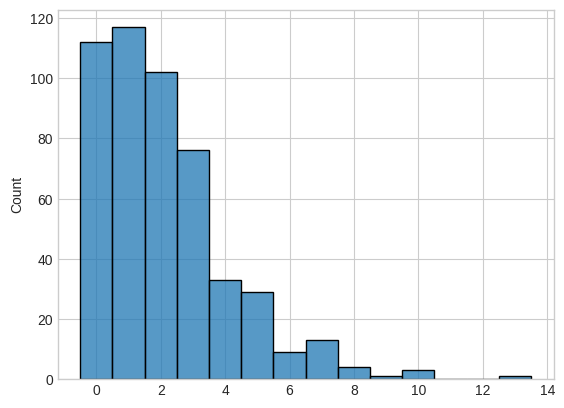

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

k = 500  # sample size
n = 2
p = 0.5

sample = np.random.negative_binomial(n, p, k)
sns.histplot(data=sample, discrete=True)
plt.show()

–û—Ü–µ–Ω–∏—Ç—å –æ–∂–∏–¥–∞–µ–º–æ–µ —Å—Ä–µ–¥–Ω–µ–µ —Ç–µ–æ—Ä–µ—Ç–∏—á–µ—Å–∫–∏, –Ω–µ –∑–Ω–∞—è, –∫–∞–∫ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω –ø—Ä–∏–∑–Ω–∞–∫ $x$ –Ω–∞—à–∏—Ö –æ–±—ä–µ–∫—Ç–æ–≤, —Ç—Ä—É–¥–Ω–æ. –ú—ã –º–æ–∂–µ–º —Å–æ–±—Ä–∞—Ç—å **–±–æ–ª—å—à–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ä–µ–¥–Ω–∏—Ö** –∏ –ø—Ä–æ–∏–∑–≤–µ—Å—Ç–∏ –æ—Ü–µ–Ω–∫—É —Å –∏—Ö –ø–æ–º–æ—â—å—é, –Ω–æ –¥–ª—è —ç—Ç–æ–≥–æ –Ω–∞–º –ø–æ—Ç—Ä–µ–±—É–µ—Ç—Å—è —Ö—Ä–∞–Ω–∏—Ç—å –≤ –ø–∞–º—è—Ç–∏ –≤—Å–µ —ç—Ç–∏ –∑–Ω–∞—á–µ–Ω–∏—è, —á—Ç–æ –ø—Ä–∏–≤–µ–¥–µ—Ç –∫ –Ω–µ—ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ–º—É —Ä–∞—Å—Ö–æ–¥—É —Ä–µ—Å—É—Ä—Å–æ–≤. –ë–æ–ª–µ–µ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω—ã–º —Ä–µ—à–µ–Ω–∏–µ–º –±—É–¥–µ—Ç –≤–æ—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è **—Å–∫–æ–ª—å–∑—è—â–∏–º —Å—Ä–µ–¥–Ω–∏–º**. –î–∞–≤–∞–π—Ç–µ —Å—Ä–∞–≤–Ω–∏–º —ç—Ç–∏ –¥–≤–∞ –º–µ—Ç–æ–¥–∞:

In [ ]:
ema = 0
alpha = 0.01
means = np.array([])

for i in range(10000):
    sample = np.random.negative_binomial(n, p, 50)
    ema = (1 - alpha) * ema + alpha * sample.mean()
    means = np.append(means, sample.mean())

–ü–æ—Å—á–∏—Ç–∞–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–∞–º—è—Ç–∏, –∑–∞—Ç—Ä–∞—á–∏–≤–∞–µ–º–æ–µ –Ω–∞ —Ö—Ä–∞–Ω–µ–Ω–∏–µ —Å–ø–∏—Å–∫–∞ —Å—Ä–µ–¥–Ω–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π –ø—Ä–∏–∑–Ω–∞–∫–∞ $x$ –ø–æ –≤—ã–±–æ—Ä–∫–∞–º –∏–∑ $k$ –æ–±—ä–µ–∫—Ç–æ–≤, –∏ **–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–∞–º—è—Ç–∏**, –∑–∞—Ç—Ä–∞—á–∏–≤–∞–µ–º–æ–µ –Ω–∞ —Ö—Ä–∞–Ω–µ–Ω–∏–µ **—Å–∫–æ–ª—å–∑—è—â–µ–≥–æ —Å—Ä–µ–¥–Ω–µ–≥–æ**:

In [ ]:
import sys

print(f"{sys.getsizeof(ema)} bytes")

32 bytes


–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–∞–º—è—Ç–∏ –¥–ª—è —Ö—Ä–∞–Ω–µ–Ω–∏—è **—Å–ø–∏—Å–∫–∞ —Å—Ä–µ–¥–Ω–∏—Ö**:

In [ ]:
print(f"{sys.getsizeof(means)} bytes")

80112 bytes


–í–∏–¥–Ω–æ, —á—Ç–æ –Ω–∞ —Ö—Ä–∞–Ω–µ–Ω–∏–µ –º–∞—Å—Å–∏–≤–∞ —Å—Ä–µ–¥–Ω–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π —Ä–∞—Å—Ö–æ–¥—É–µ—Ç—Å—è –Ω–∞ –ø–æ—Ä—è–¥–∫–∏ –±–æ–ª—å—à–µ –ø–∞–º—è—Ç–∏, —á–µ–º –Ω–∞ —Ö—Ä–∞–Ω–µ–Ω–∏–µ –æ–¥–Ω–æ–≥–æ —Å–∫–æ–ª—å–∑—è—â–µ–≥–æ —Å—Ä–µ–¥–Ω–µ–≥–æ. –¢–µ–ø–µ—Ä—å –¥–∞–≤–∞–π—Ç–µ –≤–æ—Å–ø–æ–ª—å–∑—É–µ–º—Å—è —Ç–µ–º, —á—Ç–æ –º—ã —Å—ç–º–ø–ª–∏—Ä–æ–≤–∞–ª–∏ —Å–ª—É—á–∞–π–Ω—ã–µ –≤—ã–±–æ—Ä–∫–∏ –∏–∑ –∏–∑–≤–µ—Å—Ç–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è, –∏ –º–æ–∂–µ–º —Ç–µ–æ—Ä–µ—Ç–∏—á–µ—Å–∫–∏ —Ä–∞—Å—Å—á–∏—Ç–∞—Ç—å –∏—Ö —Å—Ä–µ–¥–Ω–µ–µ. –í –Ω–∞—à–µ–º –ø—Ä–∏–º–µ—Ä–µ –º—ã –∏–∑–≤–ª–µ–∫–∞–ª–∏ –≤—ã–±–æ—Ä–∫–∏ –∏–∑ –Ω–µ–≥–∞—Ç–∏–≤–Ω–æ–≥–æ –±–∏–Ω–æ–º–∏–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Å –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ $n=2$ –∏ $p=0.5$, –¥–ª—è –∫–æ—Ç–æ—Ä–æ–≥–æ —Å—Ä–µ–¥–Ω–µ–µ —Ä–∞—Å—Å—á–∏—Ç—ã–≤–∞–µ—Ç—Å—è –ø–æ —Ñ–æ—Ä–º—É–ª–µ $mean=\frac{np}{1-p}=2$. –ú—ã –∑–Ω–∞–µ–º, —á—Ç–æ –ø—Ä–∏ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –±–æ–ª—å—à–æ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ —Å—ç–º–ø–ª–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –≤—ã–±–æ—Ä–æ–∫ —Å—Ä–µ–¥–Ω–µ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –≤—ã–±–æ—Ä–æ—á–Ω—ã—Ö —Å—Ä–µ–¥–Ω–∏—Ö –±—É–¥–µ—Ç —Å—Ç—Ä–µ–º–∏—Ç—å—Å—è –∫ —Å—Ä–µ–¥–Ω–µ–º—É –≥–µ–Ω–µ—Ä–∞–ª—å–Ω–æ–π —Å–æ–≤–æ–∫—É–ø–Ω–æ—Å—Ç–∏. –°—Ä–∞–≤–Ω–∏–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã, –ø–æ–ª—É—á–µ–Ω–Ω—ã–µ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º —Å–æ—Ö—Ä–∞–Ω–µ–Ω–Ω—ã—Ö –≤—ã–±–æ—Ä–æ—á–Ω—ã—Ö —Å—Ä–µ–¥–Ω–∏—Ö –∏ —Å–∫–æ–ª—å–∑—è—â–µ–≥–æ —Å—Ä–µ–¥–Ω–µ–≥–æ —Å —Ç–µ–æ—Ä–µ—Ç–∏—á–µ—Å–∫–∏–º —Ä–∞—Å—á–µ—Ç–æ–º:

–°—Ä–µ–¥–Ω–µ–µ –ø—Ä–∏–∑–Ω–∞–∫–∞ $x$ –ø–æ $k$ –æ–±—ä–µ–∫—Ç–∞–º, –æ—Ü–µ–Ω–µ–Ω–Ω–æ–µ —Å –ø–æ–º–æ—â—å—é **—Å–∫–æ–ª—å–∑—è—â–µ–≥–æ —Å—Ä–µ–¥–Ω–µ–≥–æ**:

In [ ]:
print(f"{ema:.8f}")

1.98559765


–°—Ä–µ–¥–Ω–µ–µ –ø—Ä–∏–∑–Ω–∞–∫–∞ $x$ –ø–æ $k$ –æ–±—ä–µ–∫—Ç–∞–º, **–æ—Ü–µ–Ω–µ–Ω–Ω–æ–µ –ø–æ –≤—Å–µ–º —Å—ç–º–ø–ª–∏—Ä–æ–≤–∞–Ω–Ω—ã–º –≤—ã–±–æ—Ä–∫–∞–º**:

In [ ]:
print(f"{means.mean():.8f}")

1.99898600


–í–∏–¥–Ω–æ, —á—Ç–æ –º—ã –ø–æ–ª—É—á–∏–ª–∏ –¥–æ–≤–æ–ª—å–Ω–æ —Ç–æ—á–Ω—É—é –æ—Ü–µ–Ω–∫—É, –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–≤ —Å–∫–æ–ª—å–∑—è—â–µ–µ —Å—Ä–µ–¥–Ω–µ–µ.

### –ó–∞—â–∏—Ç–∞ –æ—Ç –Ω—É–ª–µ–π –≤ –∑–Ω–∞–º–µ–Ω–∞—Ç–µ–ª–µ

–ß—Ç–æ–±—ã —É –Ω–∞—Å –Ω–µ –º–æ–≥ –≤–æ–∑–Ω–∏–∫–Ω—É—Ç—å 0 –≤ –∑–Ω–∞–º–µ–Ω–∞—Ç–µ–ª–µ, –¥–æ–±–∞–≤–ª—è–µ–º –º–∞–ª–µ–Ω—å–∫–æ–µ —á–∏—Å–ª–æ ‚Äî $\epsilon$. –ù–∞–ø—Ä–∏–º–µ—Ä, —Ä–∞–≤–Ω–æ–µ 1e-5


$$ \hat{x}_{i} = \frac{x_{i} - \mu_{B}}{\sigma_{B} + \epsilon}$$

$$ BN_{\gamma, \beta}(x_{i}) = \gamma \hat{x}_{i} + \beta $$

### –°–≤–µ—Ä—Ç–æ—á–Ω—ã–µ —Å–ª–æ–∏

–°–≤–µ—Ä—Ç–æ—á–Ω—ã–π —Å–ª–æ–π –º–æ–∂–Ω–æ —Å–≤–µ—Å—Ç–∏ –∫ –ª–∏–Ω–µ–π–Ω–æ–º—É —Å–ª–æ—é. BatchNorm –º–æ–∂–Ω–æ –ø—Ä–∏–º–µ–Ω—è—Ç—å –∏ –¥–ª—è –ª–∏–Ω–µ–π–Ω—ã—Ö —Å–ª–æ–µ–≤, –∏ –¥–ª—è —Å–≤–µ—Ä—Ç–æ—á–Ω—ã—Ö.

–ü—Ä–∏–∑–Ω–∞–∫–∏ –≤–Ω—É—Ç—Ä–∏ –æ–¥–Ω–æ–≥–æ –∫–∞–Ω–∞–ª–∞ (–æ–¥–Ω–æ–π –∫–∞—Ä—Ç—ã –ø—Ä–∏–∑–Ω–∞–∫–æ–≤) –ø–æ–ª—É—á–∞—é—Ç—Å—è –ø—É—Ç–µ–º –ø—Ä–∏–º–µ–Ω–µ–Ω–∏—è –∫ –∏—Å—Ö–æ–¥–Ω–æ–º—É –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—é –æ–¥–Ω–∏—Ö –∏ —Ç–µ—Ö –∂–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–π. –ü–æ —Å—É—Ç–∏ **1 –∫–∞–Ω–∞–ª** - —ç—Ç–æ **–∫–∞—Ä—Ç–∞ –æ–¥–Ω–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞**. –ü–æ—ç—Ç–æ–º—É –ª–æ–≥–∏—á–Ω–æ, —á—Ç–æ –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è –±—É–¥–µ—Ç –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç—å –ø–æ –∫–∞–Ω–∞–ª–∞–º, –∞ –æ–¥–Ω–∏–º –ø—Ä–∏–∑–Ω–∞–∫–æ–º —Å—á–∏—Ç–∞—Ç—å—Å—è –æ–¥–Ω–∞  **feature map**.
–ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è –∏–¥–µ—Ç –ø–æ –≤—Å–µ–π —Ç–∞–∫–æ–π feature map (–ø–æ –≤—Å–µ–º—É –∫–∞–Ω–∞–ª—É) –¥–ª—è –≤—Å–µ—Ö –æ–±—ä–µ–∫—Ç–æ–≤ –±–∞—Ç—á–∞.

In [ ]:
#[B,C,H,W]
#mu1sigm1 [;, 0, :, :]
#mu2sigm2 [;, 1, :, :]
#mu3sigm3 [;, 2, :, :]

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L07/out/feature_map.png" width="500">

–í PyTorch –¥–ª—è –ø–æ–ª–Ω–æ—Å–≤—è–∑–Ω—ã—Ö —Å–ª–æ–µ–≤ –∏—Å–ø–æ–ª—å–∑—É—é—Ç [`nn.BatchNorm1d`](https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm1d.html), –∞ –¥–ª—è —Å–≤–µ—Ä—Ç–æ—á–Ω—ã—Ö [`nn.BatchNorm2d`](https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm2d.html).

–ì—Ä–∞—Ñ–∏—á–µ—Å–∫–∏ –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏ —á–∞—Å—Ç–æ –æ–±—ä—è—Å–Ω—è—é—Ç –ø—Ä–∏ –ø–æ–º–æ—â–∏ —Å–ª–µ–¥—É—é—â–µ–π —Å—Ö–µ–º—ã:

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L07/out/dimensions_channels_batch_samples.png" width="450">

*–ü–æ –æ—Å–∏ –∞–±—Å—Ü–∏—Å—Å* —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω—ã **–æ–±—ä–µ–∫—Ç—ã –∏–∑ –±–∞—Ç—á–∞**,
*–ø–æ –æ—Å–∏ –æ—Ä–¥–∏–Ω–∞—Ç* &mdash; **feature map**, –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–Ω—ã–π –≤ –≤–µ–∫—Ç–æ—Ä,
*–ø–æ –æ—Å–∏ –∞–ø–ø–ª–∏–∫–∞—Ç* &mdash; **–∫–∞–Ω–∞–ª—ã** (feature maps).

–í —ç—Ç–æ–º –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏–∏ **BatchNorm** –¥–ª—è —Å–≤–µ—Ä—Ç–∫–∏ –≤—ã–≥–ª—è–¥–∏—Ç —Å–ª–µ–¥—É—é—â–∏–º –æ–±—Ä–∞–∑–æ–º:

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L07/out/visualization_of_batch_normalization.png" width="450">

[Batch Normalization](https://paperswithcode.com/method/batch-normalization)

### –ü—Ä–∏–º–µ—Ä —Ä–∞–±–æ—Ç—ã

<img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/L07/batchnorm_efficiency.png" width="550">

<em>Source: <a href="https://arxiv.org/pdf/1502.03167.pdf">Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shiftn</a></em>



–≠—Ç–æ—Ç –º–µ—Ç–æ–¥ –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ —Ä–∞–±–æ—Ç–∞–µ—Ç.
–í–∏–¥–∏–º, —á—Ç–æ –Ω–µ–π—Ä–æ—Å–µ—Ç–∏ —Å –±–∞—Ç—á-–Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–µ–π:

1. **–°—Ö–æ–¥—è—Ç—Å—è –±—ã—Å—Ç—Ä–µ–µ**, —á–µ–º –Ω–µ–π—Ä–æ—Å–µ—Ç–∏ –±–µ–∑ –Ω–µ—ë.
2. –ú–æ–≥—É—Ç —Ä–∞–±–æ—Ç–∞—Ç—å —Å **–±–æ–ª–µ–µ –≤—ã—Å–æ–∫–∏–º –Ω–∞—á–∞–ª—å–Ω—ã–º –∑–Ω–∞—á–µ–Ω–∏–µ–º learning rate**, –ø—Ä–∏—á–µ–º —ç—Ç–æ –ø–æ–∑–≤–æ–ª—è–µ—Ç –¥–æ—Å—Ç–∏–≥–∞—Ç—å –ª—É—á—à–∏—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤.
3. –†–∞–±–æ—Ç–∞—é—Ç –¥–∞–∂–µ —Å —Ñ—É–Ω–∫—Ü–∏–µ–π –∞–∫—Ç–∏–≤–∞—Ü–∏–∏ –≤ –≤–∏–¥–µ **—Å–∏–≥–º–æ–∏–¥—ã**. –ë–µ–∑ **BatchNorm** —Ç–∞–∫–∞—è —Å–µ—Ç—å –Ω–µ –æ–±—É—á–∏–ª–∞—Å—å –±—ã –≤–æ–≤—Å–µ.

### –ì—Ä–∞–¥–∏–µ–Ω—Ç

–í—ã—á–∏—Å–ª–µ–Ω–∏–µ **–≥—Ä–∞–¥–∏–µ–Ω—Ç–∞ BatchNorm** ‚Äî –∏–Ω—Ç–µ—Ä–µ—Å–Ω–æ–µ —É–ø—Ä–∞–∂–Ω–µ–Ω–∏–µ –Ω–∞ –ø–æ–Ω–∏–º–∞–Ω–∏–µ —Ç–æ–≥–æ, –∫–∞–∫ —Ä–∞–±–æ—Ç–∞–µ—Ç **backpropagation**. –í –ª–µ–∫—Ü–∏–∏ –º—ã —ç—Ç–æ –æ–ø—É—Å–∫–∞–µ–º, –º–æ–∂–µ—Ç–µ –æ–∑–Ω–∞–∫–æ–º–∏—Ç—å—Å—è —Å–∞–º–æ—Å—Ç–æ—è—Ç–µ–ª—å–Ω–æ:

[Deriving the Gradient for the Backward Pass of Batch Normalization](https://kevinzakka.github.io/2016/09/14/batch_normalization/)



### Batch Normalization –∫–∞–∫ —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏—è

–ü–æ—á–µ–º—É –¥–ª—è –Ω–µ–π—Ä–æ—Å–µ—Ç–∏ —Å –±–∞—Ç—á–Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–µ–π –º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –±–æ–ª–µ–µ –≤—ã—Å–æ–∫–∏–µ learning rate?

–û–∫–∞–∑—ã–≤–∞–µ—Ç—Å—è, **–±–∞—Ç—á-–Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è** –¥–µ–ª–∞–µ—Ç **–Ω–µ—è–≤–Ω—É—é —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏—é –Ω–∞ –≤–µ—Å–∞**.

–î–æ–ø—É—Å—Ç–∏–º, –º—ã —Ä–µ—à–∏–ª–∏ **—É–≤–µ–ª–∏—á–∏—Ç—å –≤–µ—Å–∞** –≤ $a$ —Ä–∞–∑.

–¢–∞–∫ –∫–∞–∫ –º—ã —à–∫–∞–ª–∏—Ä—É–µ–º, —Ç–æ –¥–æ–º–Ω–æ–∂–µ–Ω–∏–µ –≤–µ—Å–æ–≤ $W$ –Ω–∞ –∫–æ–Ω—Å—Ç–∞–Ω—Ç—É –≤—ã—Ö–æ–¥–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π —Å–ª–æ—è –Ω–µ –º–µ–Ω—è–µ—Ç

$$BN((aW)u) = BN(Wu)$$

–ì—Ä–∞–¥–∏–µ–Ω—Ç —Å–ª–æ—è –ø–æ –≤—Ö–æ–¥—É –Ω–µ –º–µ–Ω—è–µ—Ç—Å—è

$$\dfrac {\partial BN((aW)u)} {\partial u} = \dfrac {\partial BN(Wu)} {\partial u}$$

–ê **–≥—Ä–∞–¥–∏–µ–Ω—Ç –ø–æ –≤–µ—Å–∞–º —É–º–µ–Ω—å—à–∞–µ—Ç—Å—è** –≤ $a$ —Ä–∞–∑

$$\dfrac {\partial BN((aW)u)} {\partial aW} = \dfrac 1 a \dfrac {\partial BN(Wu)} {\partial W} $$

–¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, –Ω–µ–π—Ä–æ—Å–µ—Ç—å –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∏ –Ω–µ –¥–∞–µ—Ç –±–æ–ª—å—à–∏–º –≤–µ—Å–∞–º —Ä–∞—Å—Ç–∏

### –°–≥–ª–∞–∂–∏–≤–∞—é—â–∏–π —ç—Ñ—Ñ–µ–∫—Ç Batch Normalization

**Batch Normalization** –±—ã–ª–∞ —Ä–∞–∑—Ä–∞–±–æ—Ç–∞–Ω–∞ –Ω–∞ –∏–¥–µ–µ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ—Å—Ç–∏ –∫–æ—Ä—Ä–µ–∫—Ü–∏–∏ **Internal covariate shift**. –í 2019 –≥–æ–¥—É –≤—ã—à–ª–∞ —Å—Ç–∞—Ç—å—è [How Does Batch Normalization Help Optimization?](https://arxiv.org/pdf/1805.11604.pdf), –∫–æ—Ç–æ—Ä–∞—è –ø–æ–∫–∞–∑–∞–ª–∞, —á—Ç–æ –≤–ª–∏—è–Ω–∏–µ –∫–æ—Ä—Ä–µ–∫—Ü–∏–∏ **Internal covariate shift** –Ω–∞ –∫–∞—á–µ—Å—Ç–≤–æ –æ–±—É—á–µ–Ω–∏—è –Ω–µ —Ç–∞–∫ –≤–µ–ª–∏–∫–æ, –∫–∞–∫ —Å—á–∏—Ç–∞–ª–∏ –∞–≤—Ç–æ—Ä—ã **Batch Normalization**.

–î—Ä—É–≥–∏–º –∏–Ω—Ç–µ—Ä–µ—Å–Ω—ã–º —ç—Ñ—Ñ–µ–∫—Ç–æ–º Batch Normalization –æ–∫–∞–∑–∞–ª–æ—Å—å **—Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏–µ –ª–∞–Ω–¥—à–∞—Ñ—Ç–∞** —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å. Batch Normalization —É–ª—É—á—à–∞–µ—Ç –≥–ª–∞–¥–∫–æ—Å—Ç—å –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–∞ —Ä–µ—à–µ–Ω–∏–π –∏ –æ–±–ª–µ–≥—á–∞–µ—Ç –ø–æ–∏—Å–∫ –≤ –Ω–µ–º –º–∏–Ω–∏–º—É–º–∞. –ò–º–µ–Ω–Ω–æ –±–ª–∞–≥–æ–¥–∞—Ä—è —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏—é –ª–∞–Ω–¥—à–∞—Ñ—Ç–∞ Batch Normalization —Å–ø—Ä–∞–≤–ª—è–µ—Ç—Å—è —Å –∑–∞—Ç—É—Ö–∞–Ω–∏–µ–º –∏ –≤–∑—Ä—ã–≤–æ–º –≥—Ä–∞–¥–∏–µ–Ω—Ç–∞.


<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L07/out/batchnorm_helps_find_minimum_of_function.jpg" width="900">

### –°–æ–≤–µ—Ç—ã –ø–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—é Batch Normalization

–°—Ç–æ–∏—Ç –ø–æ–º–Ω–∏—Ç—å, —á—Ç–æ —Å –±–∞—Ç—á-–Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–µ–π:

* **–ö—Ä–∞–π–Ω–µ –≤–∞–∂–Ω–æ** –ø–µ—Ä–µ–º–µ—à–∏–≤–∞—Ç—å –æ–±—ä–µ–∫—Ç—ã (—Å–æ—Å—Ç–∞–≤–ª—è—Ç—å –Ω–æ–≤—ã–µ –±–∞—Ç—á–∏) –º–µ–∂–¥—É —ç–ø–æ—Ö–∞–º–∏. –ï–¥–∏–Ω–∏—Ü–µ–π –æ–±—É—á–µ–Ω–∏—è –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ $\beta$ –∏ $\gamma$ —è–≤–ª—è—é—Ç—Å—è –±–∞—Ç—á–∏. –ï—Å–ª–∏ –∏—Ö –Ω–µ –ø–µ—Ä–µ–º–µ—à–∏–≤–∞—Ç—å, —Ç–æ –∏–∑ 6400 –æ–±—ä–µ–∫—Ç–æ–≤ –≤ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–º –¥–∞—Ç–∞—Å–µ—Ç–µ –ø–æ–ª—É—á–∏–º –ª–∏—à—å 100 –æ–±—ä–µ–∫—Ç–æ–≤ (–ø—Ä–∏ —É—Å–ª–æ–≤–∏–∏, —á—Ç–æ –≤ –±–∞—Ç—á–µ 64 –æ–±—ä–µ–∫—Ç–∞) –¥–ª—è –æ–±—É—á–µ–Ω–∏—è $\beta$ –∏ $\gamma$.

* –í —Å–ª–æ–µ, –ø–æ—Å–ª–µ –∫–æ—Ç–æ—Ä–æ–≥–æ –ø–æ—Å—Ç–∞–≤–∏–ª–∏ Batch Normalization, –Ω–∞–¥–æ **—É–±—Ä–∞—Ç—å bias** (–ø–∞—Ä–∞–º–µ—Ç—Ä $\beta$ –≤ BatchNormalization –±–µ—Ä–µ—Ç —ç—Ç—É —Ä–æ–ª—å –Ω–∞ —Å–µ–±—è).


* –î—Ä—É–≥–æ–µ —Ä–∞—Å–ø–∏—Å–∞–Ω–∏–µ **learning rate: –±–æ–ª—å—à–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ** –≤ –Ω–∞—á–∞–ª–µ –æ–±—É—á–µ–Ω–∏—è –∏ –±—ã—Å—Ç—Ä–æ–µ —É–º–µ–Ω—å—à–µ–Ω–∏–µ –≤ –ø—Ä–æ—Ü–µ—Å—Å–µ –æ–±—É—á–µ–Ω–∏—è.


* –ß–µ–º **–º–µ–Ω—å—à–µ —Ä–∞–∑–º–µ—Ä –±–∞—Ç—á–∞ –≤ –æ–±—É—á–µ–Ω–∏–∏**, —Ç–µ–º **—Ö—É–∂–µ** –±—É–¥–µ—Ç —Ä–∞–±–æ—Ç–∞—Ç—å BatchNormalization.

<img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/L07/batchnorm_batch_size.png" width="550">

<em>Source: <a href="https://arxiv.org/pdf/1803.08494.pdf">Group Normalization</a></em>

### –ò—Å–ø–æ–ª—å–∑—É–µ–º Batch Normalization –≤ PyTorch

–¢–∞–∫ –∫–∞–∫ –Ω–∞—à–∞ –º–æ–¥–µ–ª—å –∏–∑-–∑–∞ **Batch Normalization** –≤–µ–¥–µ—Ç —Å–µ–±—è –ø–æ-—Ä–∞–∑–Ω–æ–º—É –≤–æ –≤—Ä–µ–º—è **–æ–±—É—á–µ–Ω–∏—è** –∏ –≤–æ –≤—Ä–µ–º—è **—Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è**, —Ç–æ –º—ã –¥–æ–ª–∂–Ω—ã –ø—Ä—è–º–æ –µ–π —Å–æ–æ–±—â–∞—Ç—å, –æ–±—É—á–∞–µ—Ç—Å—è –æ–Ω–∞ —Å–µ–π—á–∞—Å –∏–ª–∏ –Ω–µ—Ç. –î–µ–ª–∞–µ—Ç—Å—è —ç—Ç–æ –ø—Ä–∏ –ø–æ–º–æ—â–∏ —Ñ—É–Ω–∫—Ü–∏–π `model.train` –∏ `model.eval`

In [ ]:
from tqdm import tqdm


def train_model_sep(model, optimizer, model_name=None, num_epochs=5):
    criterion = nn.CrossEntropyLoss().to(device)

    train_history = {}
    train_history["model_name"] = model_name
    train_history["epo—Åhs"] = num_epochs
    train_history["loss_on_train"] = []
    train_history["loss_on_test"] = []

    for epoch in tqdm(range(num_epochs)):
        model.train()
        loss_on_train = train_epoch(model, optimizer, criterion, train_loader)
        model.eval()
        _, loss_on_test = validate(model, criterion, test_loader)
        train_history["loss_on_train"].extend(loss_on_train)
        train_history["loss_on_test"].extend(loss_on_test)
    return train_history

In [ ]:
class SimpleMNIST_NN_Init_Batchnorm(nn.Module):
    def __init__(self, n_layers):
        super().__init__()
        self.n_layers = n_layers
        layers = [
            nn.Linear(28 * 28, 100, bias=False),
            nn.BatchNorm1d(100),
            nn.Sigmoid(),
        ]
        for _ in range(0, n_layers - 1):
            layers.append(nn.Linear(100, 100, bias=False))
            layers.append(nn.BatchNorm1d(100))
            layers.append(nn.Sigmoid())
        layers.append(nn.Linear(100, 10))
        self.layers = nn.Sequential(*layers)
        self.init()

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.layers(x)
        return x

    def init(self):
        sigmoid_gain = torch.nn.init.calculate_gain("sigmoid")
        for child in self.layers.children():
            if isinstance(child, nn.Linear):
                torch.nn.init.xavier_normal_(child.weight, gain=sigmoid_gain)
                if child.bias is not None:
                    torch.nn.init.zeros_(child.bias)

In [ ]:
model = SimpleMNIST_NN_Init_Batchnorm(n_layers=3).to(device)
optimizer = optim.SGD(model.parameters(), lr=1e-3)

model_name = "batchnorm2"
hooks_data_history = register_model_hooks(model)
history = train_model_sep(model, optimizer, model_name=model_name)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 5/5 [02:07<00:00, 25.46s/it]


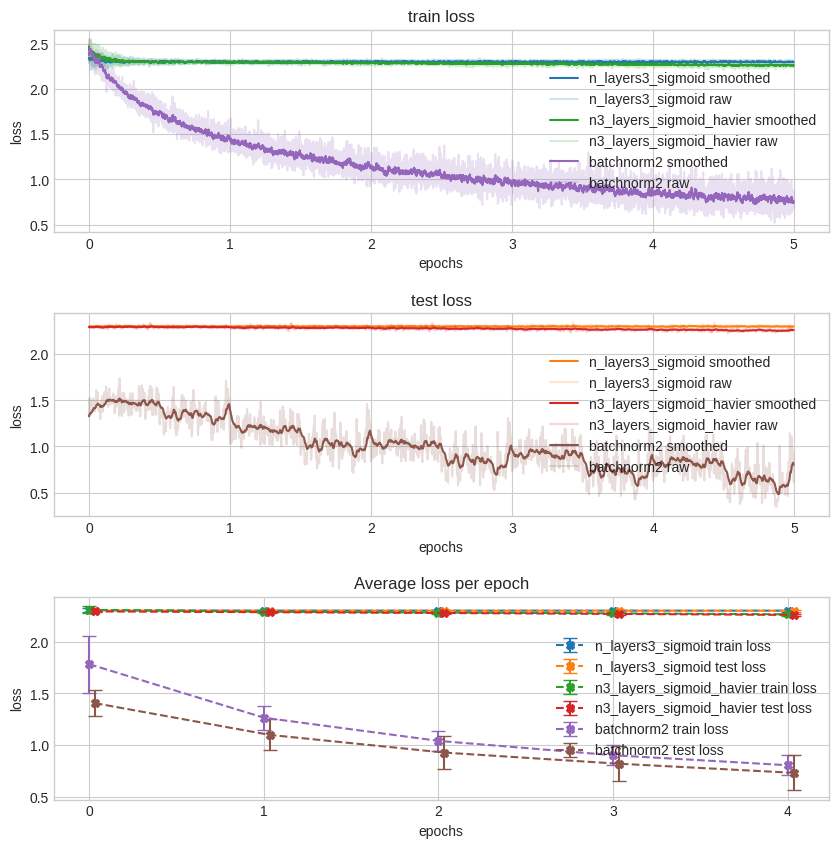

In [ ]:
history_plotter.add(history)
history_plotter.plot(["n_layers3_sigmoid", "n3_layers_sigmoid_havier", model_name])

–ü–æ–ø—Ä–æ–±—É–µ–º, —Å–æ–≥–ª–∞—Å–Ω–æ —Å–æ–≤–µ—Ç–∞–º, —É–≤–µ–ª–∏—á–∏—Ç—å learning rate:

In [ ]:
model = SimpleMNIST_NN_Init_Batchnorm(n_layers=3).to(device)
optimizer = optim.SGD(model.parameters(), lr=1e-2)

model_name = "batchnorm_increased_lr"
hooks_data_history = register_model_hooks(model)
history = train_model_sep(model, optimizer, model_name=model_name)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 5/5 [02:09<00:00, 25.85s/it]


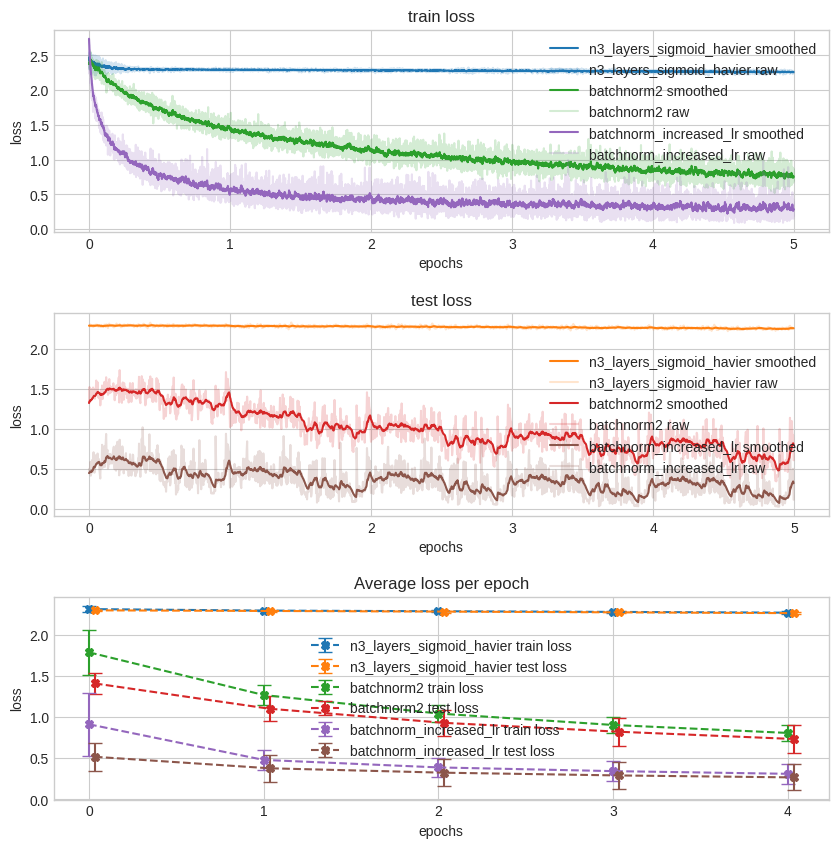

In [ ]:
history_plotter.add(history)
history_plotter.plot(["n3_layers_sigmoid_havier", "batchnorm2", model_name])

### –°—Ç–∞–≤–∏—Ç—å Batch Normalization –¥–æ –∏–ª–∏ –ø–æ—Å–ª–µ –∞–∫—Ç–∏–≤–∞—Ü–∏–∏?



#### –î–æ

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L07/out/batchnormalization_before_activation.png" width="400">

* **–†–µ–∫–æ–º–µ–Ω–¥—É–µ—Ç—Å—è –∞–≤—Ç–æ—Ä–∞–º–∏ —Å—Ç–∞—Ç—å–∏, –≥–¥–µ –ø—Ä–µ–¥–ª–æ–∂–∏–ª–∏ Batch Normalization**.
* –î–ª—è **—Å–∏–≥–º–æ–∏–¥—ã** BN, –ø–æ—Å—Ç–∞–≤–ª–µ–Ω–Ω–∞—è –ø–æ—Å–ª–µ –∞–∫—Ç–∏–≤–∞—Ü–∏–∏, **–Ω–µ —Ä–µ—à–∞–µ—Ç –ø—Ä–æ–±–ª–µ–º** —Å–∏–≥–º–æ–∏–¥—ã.
* –í–æ –º–Ω–æ–≥–∏—Ö —Å–≤–µ—Ä—Ç–æ—á–Ω—ã—Ö –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä–∞—Ö, –Ω–∞–ø—Ä–∏–º–µ—Ä [**ResNet**](https://arxiv.org/pdf/1512.03385.pdf) –∏ [**MobileNetV2**](https://arxiv.org/pdf/1801.04381.pdf) (–∏–∑—É—á–∏—Ç–µ –Ω–∞ —Å–ª–µ–¥—É—é—â–∏—Ö –ª–µ–∫—Ü–∏—è—Ö), Batch Normalization —Å—Ç–∞–≤–∏—Ç—Å—è –∏–º–µ–Ω–Ω–æ —Ç–∞–∫.

#### –ü–æ—Å–ª–µ

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L07/out/batchnormalization_after_activation.png" width="400">

* **–ê—Ä–≥—É–º–µ–Ω—Ç–∞—Ü–∏—è –∞–≤—Ç–æ—Ä–æ–≤ —Å—Ç–∞—Ç—å–∏ –Ω–µ –¥–æ –∫–æ–Ω—Ü–∞ –æ–±–æ—Å–Ω–æ–≤–∞–Ω–∞**.
* –û–±—ã—á–Ω–æ, **—Å–∏–≥–º–æ–∏–¥—É –Ω–µ –∏—Å–ø–æ–ª—å–∑—É—é—Ç** –≤ —Å–æ–≤—Ä–µ–º–µ–Ω–Ω—ã—Ö –Ω–µ–π—Ä–æ–Ω–Ω—ã—Ö —Å–µ—Ç—è—Ö.
* –î–ª—è –ø–æ–ø—É–ª—è—Ä–Ω–æ–π **ReLU BN**, –ø–æ—Å—Ç–∞–≤–ª–µ–Ω–Ω–∞—è –¥–æ –∞–∫—Ç–∏–≤–∞—Ü–∏–∏, –º–æ–∂–µ—Ç –ø—Ä–∏–≤–æ–¥–∏—Ç—å –∫ ‚Äú—É–º–∏—Ä–∞—é—â–µ–π **ReLU**‚Äù, –∫–æ–≥–¥–∞ –±–æ–ª—å—à–∞—è —á–∞—Å—Ç—å –µ–µ –≤—Ö–æ–¥–æ–≤ –º–µ–Ω—å—à–µ 0, –∏ –ø–æ—ç—Ç–æ–º—É —á–µ—Ä–µ–∑ –Ω–∏—Ö –≥—Ä–∞–¥–∏–µ–Ω—Ç –Ω–µ –ø—Ä–æ—Ö–æ–¥–∏—Ç.
* –ù–∞ –º–Ω–æ–≥–∏—Ö –∑–∞–¥–∞—á–∞—Ö BN –ø–æ—Å–ª–µ —Ñ—É–Ω–∫—Ü–∏–∏ –∞–∫—Ç–∏–≤–∞—Ü–∏–∏ **—Ä–∞–±–æ—Ç–∞–µ—Ç –ª—É—á—à–µ** –∏–ª–∏ –Ω–µ —Ö—É–∂–µ –ø–æ—Å—Ç–∞–≤–ª–µ–Ω–Ω–æ–π –¥–æ.

**BN ‚Äî before or after ReLU?**

<img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/L07/batchnormalization_before_or_after_relu.png" width="500">

<em>Source: <a href="https://github.com/ducha-aiki/caffenet-benchmark/blob/master/batchnorm.md">BN experiments</a></em>

**–í—ã–≤–æ–¥:** –º–æ–∂–Ω–æ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∏—Ä–æ–≤–∞—Ç—å —Å —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω–∏–µ–º.

## –î—Ä—É–≥–∏–µ Normalization

–°—É—â–µ—Å—Ç–≤—É–µ—Ç –±–æ–ª—å—à–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–Ω—ã—Ö –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–π, –∏—Ö –Ω–µ–ø–æ–ª–Ω—ã–π —Å–ø–∏—Å–æ–∫ –º–æ–∂–Ω–æ –Ω–∞–π—Ç–∏ [–∑–¥–µ—Å—å](https://paperswithcode.com/methods/category/normalization). –í –¥–∞–Ω–Ω–æ–π —Å–µ–∫—Ü–∏–∏ –º—ã —Ä–∞—Å—Å–º–æ—Ç—Ä–∏–º —Å–∞–º—ã–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ –≤–∏–¥—ã –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏ –ø–æ–º–∏–º–æ **BatchNorm**.

<img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/L07/normalization_methods.png" width="900">

<center><em>Source: <a href="https://paperswithcode.com/method/layer-normalization">Layer Normalization</a></em></center>

### Layer Norm

–ü–æ–º–∏–º–æ —Å–≤—ë—Ä—Ç–æ—á–Ω—ã—Ö –Ω–µ–π—Ä–æ–Ω–Ω—ã—Ö —Å–µ—Ç–µ–π, —Å—É—â–µ—Å—Ç–≤—É–µ—Ç —Å–ø–µ—Ü–∏–∞–ª—å–Ω—ã–π —Ç–∏–ø –Ω–µ–π—Ä–æ–Ω–Ω—ã—Ö —Å–µ—Ç–µ–π, –∏—Å–ø–æ–ª—å–∑—É–µ–º—ã—Ö –¥–ª—è –æ–±—Ä–∞–±–æ—Ç–∫–∏ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–µ–π. –ù–∞–∑—ã–≤–∞–µ—Ç—Å—è –æ–Ω "**—Ä–µ–∫—É—Ä—Ä–µ–Ω—Ç–Ω—ã–µ –Ω–µ–π—Ä–æ–Ω–Ω—ã–µ —Å–µ—Ç–∏**", –µ–º—É –±—É–¥–µ—Ç –ø–æ—Å–≤—è—â–µ–Ω–∞ —Å–ª–µ–¥—É—é—â–∞—è –ª–µ–∫—Ü–∏—è.

–ö–æ–≥–¥–∞ –æ–∫–∞–∑–∞–ª–æ—Å—å, —á—Ç–æ **BatchNorm** –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ —Å–∫–∞–∑—ã–≤–∞–µ—Ç—Å—è –Ω–∞ –æ–±—É—á–µ–Ω–∏–∏ –Ω–µ–π—Ä–æ–Ω–Ω—ã—Ö —Å–µ—Ç–µ–π, –µ–≥–æ –ø–æ–ø—ã—Ç–∞–ª–∏—Å—å –ø—Ä–∏–º–µ–Ω–∏—Ç—å –¥–ª—è —Ä–∞–∑–ª–∏—á–Ω—ã—Ö –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä. BatchNorm –Ω–µ–ª—å–∑—è –±—ã–ª–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å "–∏–∑ –∫–æ—Ä–æ–±–∫–∏" –¥–ª—è —Ä–µ–∫—É—Ä—Ä–µ–Ω—Ç–Ω—ã—Ö –Ω–µ–π—Ä–æ–Ω–Ω—ã—Ö —Å–µ—Ç–µ–π (—Ä–∞–±–æ—Ç–∞—é—â–∏—Ö —Å –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏), –ø—Ä–∏—à–ª–æ—Å—å –ø—Ä–∏–¥—É–º—ã–≤–∞—Ç—å —Ä–∞–∑–ª–∏—á–Ω—ã–µ –∞–¥–∞–ø—Ç–∞—Ü–∏–∏, —Å—Ä–µ–¥–∏ –∫–æ—Ç–æ—Ä—ã—Ö –Ω–∞–∏–±–æ–ª–µ–µ —É–¥–∞—á–Ω–æ–π –æ–∫–∞–∑–∞–ª–∞—Å—å **Layer Normalization**.

–ü–æ —Å—É—Ç–∏, —Ç–µ–ø–µ—Ä—å –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç –≤–Ω—É—Ç—Ä–∏ **–æ–¥–Ω–æ–≥–æ –æ–±—ä–µ–∫—Ç–∞ –∏–∑ –±–∞—Ç—á–∞**, –∞ –Ω–µ –ø–æ–∫–∞–Ω–∞–ª—å–Ω–æ –≤ —Ä–∞–º–∫–∞—Ö –±–∞—Ç—á–∞. –° –º–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–π —Ç–æ—á–∫–∏ –∑—Ä–µ–Ω–∏—è, –¥–∞–Ω–Ω–∞—è "–∞–¥–∞–ø—Ç–∞—Ü–∏—è" –æ—Ç–ª–∏—á–∞–µ—Ç—Å—è –æ—Ç **BatchNorm**, –æ–¥–Ω–∞–∫–æ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞–ª—å–Ω–æ –æ–Ω–∞ –ø—Ä–µ–≤–∑–æ—à–ª–∞ —Å–≤–æ–∏—Ö –∫–æ–Ω–∫—É—Ä–µ–Ω—Ç–æ–≤ –≤ –∑–∞–¥–∞—á–µ –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏ –ø—Ä–∏ –æ–±—Ä–∞–±–æ—Ç–∫–µ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö.

–í–ø–æ—Å–ª–µ–¥—Å—Ç–≤–∏–∏ –¥–∞–Ω–Ω—ã–π –º–µ—Ç–æ–¥ –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏ —Ö–æ—Ä–æ—à–æ –ø—Ä–æ—è–≤–∏–ª —Å–µ–±—è –≤ **—Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–µ—Ä–∞—Ö** ‚Äî –Ω–∞—Å–ª–µ–¥–Ω–∏–∫–∞—Ö —Ä–µ–∫—É—Ä—Ä–µ–Ω—Ç–Ω—ã—Ö –Ω–µ–π—Ä–æ–Ω–Ω—ã—Ö —Å–µ—Ç–µ–π –≤ –≤–æ–ø—Ä–æ—Å–∞—Ö –æ–±—Ä–∞–±–æ—Ç–∫–∏ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö (–æ–± —ç—Ç–æ–º —Ç–∏–ø–µ –Ω–µ–π—Ä–æ—Å–µ—Ç–µ–π –º—ã —Ç–∞–∫–∂–µ –ø–æ–≥–æ–≤–æ—Ä–∏–º –Ω–∞ —Å–ª–µ–¥—É—é—â–µ–π –ª–µ–∫—Ü–∏–∏). –ü–æ—Å–ª–µ —É—Å–ø–µ—à–Ω–æ–≥–æ –ø—Ä–∏–º–µ–Ω–µ–Ω–∏—è —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–µ—Ä–æ–≤ –≤ –∑–∞–¥–∞—á–∞—Ö –∫–æ–º–ø—å—é—Ç–µ—Ä–Ω–æ–≥–æ –∑—Ä–µ–Ω–∏—è, **LayerNorm** —Å—Ç–∞–ª –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è –∏ –≤ –∫–æ–º–ø—å—é—Ç–µ—Ä–Ω–æ–º –∑—Ä–µ–Ω–∏–∏ (—Ö–æ—Ç—è –∏ —É—Å—Ç—É–ø–∞–ª BatchNorm –ø—Ä–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏ –≤ —Å–≤—ë—Ä—Ç–æ—á–Ω—ã—Ö –Ω–µ–π—Ä–æ–Ω–Ω—ã—Ö —Å–µ—Ç—è—Ö).

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L07/out/visualization_of_layer_normalization.png" width="450">

[Layer Normalization](https://paperswithcode.com/method/layer-normalization)


In [ ]:
# [B,C,H,W]
# mu1sigm1 [0, :, :, :]
# mu2sigm2 [1, :, :, :]
# mu3sigm3 [2, :, :, :]

### Instance Norm

–°–ª–µ–¥—É—é—â–∏–π –≤–∏–¥ –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏ –±—ã–ª –ø—Ä–µ–¥–ª–æ–∂–µ–Ω –æ—Ç–µ—á–µ—Å—Ç–≤–µ–Ω–Ω—ã–º–∏ –∏—Å—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—è–º–∏ (–∏–∑ –°–∫–æ–ª—Ç–µ—Ö–∞), –∑–∞–Ω–∏–º–∞–≤—à–∏–º–∏—Å—è —Ä–∞–∑—Ä–∞–±–æ—Ç–∫–æ–π –±—ã—Å—Ç—Ä–æ–≥–æ –∏ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ–≥–æ —Å–ø–æ—Å–æ–±–∞ **–ø–µ—Ä–µ–Ω–æ—Å–∞ —Å—Ç–∏–ª—è** —Å –æ–¥–Ω–æ–≥–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –Ω–∞ –¥—Ä—É–≥–æ–µ.

–ü—Ä–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏ BatchNorm —Ç–µ—Ä—è–µ—Ç—Å—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ –∫–æ–Ω—Ç—Ä–∞—Å—Ç–∞—Ö –Ω–∞ –∫–æ–Ω–∫—Ä–µ—Ç–Ω–æ–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–∏, –ø–æ—Å–∫–æ–ª—å–∫—É –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è –ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç—Å—è –ø–æ –Ω–µ—Å–∫–æ–ª—å–∫–∏–º –æ–±—ä–µ–∫—Ç–∞–º. –î–ª—è —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏—è *–∫–æ–Ω—Ç—Ä–∞—Å—Ç–æ–≤* –≤ —ç–∫–∑–µ–º–ø–ª—è—Ä–µ (*instance*) –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –±—ã–ª–∞ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∞ —Å–ø–µ—Ü–∏–∞–ª—å–Ω–∞—è –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è, —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞—é—â–∞—è –∫–æ–Ω–∫—Ä–µ—Ç–Ω—ã–π –∫–∞–Ω–∞–ª –æ–¥–Ω–æ–≥–æ –∫–æ–Ω–∫—Ä–µ—Ç–Ω–æ–≥–æ –æ–±—ä–µ–∫—Ç–∞. –ë—ã–ª–æ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–æ –¥–≤–∞ –Ω–∞–∑–≤–∞–Ω–∏—è –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏: —Å–≤—è–∑–∞–Ω–Ω–æ–µ —Å –º–æ—Ç–∏–≤–∞—Ü–∏–µ–π (contrast normalization) –∏ —Å–≤—è–∑–∞–Ω–Ω–æ–µ —Å –ø—Ä–∏–Ω—Ü–∏–ø–æ–º —Ä–∞–±–æ—Ç—ã (**instance normalization**).

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L07/out/visualization_of_instance_normalization.png" width="450">

[Instance Normalization](https://paperswithcode.com/method/instance-normalization)

### Group Norm

–í —Ç–µ—á–µ–Ω–∏–µ –¥–æ–ª–≥–æ–≥–æ –≤—Ä–µ–º–µ–Ω–∏ BatchNorm –æ—Å—Ç–∞–≤–∞–ª—Å—è –æ–¥–Ω–æ–∑–Ω–∞—á–Ω—ã–º —Ñ–∞–≤–æ—Ä–∏—Ç–æ–º –¥–ª—è –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è –≤ –∑–∞–¥–∞—á–∞—Ö –∫–æ–º–ø—å—é—Ç–µ—Ä–Ω–æ–≥–æ –∑—Ä–µ–Ω–∏—è, –æ–¥–Ω–∞–∫–æ:
1. –í —Å–≤—è–∑–∏ —Å –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ—Å—Ç—å—é —Ç–æ—á–Ω–æ —Å—á–∏—Ç–∞—Ç—å —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ –≤–Ω—É—Ç—Ä–∏ batch, –ø—Ä–∏ –æ–±—É—á–µ–Ω–∏–∏ –ø—Ä–∏—Ö–æ–¥–∏–ª–æ—Å—å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –±–æ–ª—å—à–æ–π batch size.

2. –û–≥—Ä–∞–Ω–∏—á–µ–Ω–Ω–æ—Å—Ç—å —Ä–∞–∑–º–µ—Ä–∞ –ø–∞–º—è—Ç–∏ –≤–∏–¥–µ–æ–∫–∞—Ä—Ç—ã –≤—ã–Ω—É–∂–¥–∞–µ—Ç —Ä–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫–æ–≤ –∏–¥—Ç–∏ –Ω–∞ –∫–æ–º–ø—Ä–æ–º–∏—Å—Å –º–µ–∂–¥—É —Å–ª–æ–∂–Ω–æ—Å—Ç—å—é –º–æ–¥–µ–ª–∏ –∏ —Ä–∞–∑–º–µ—Ä–æ–º –±–∞—Ç—á–∞.

–¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ BatchNorm –ø—Ä–∏–≤–æ–¥–∏–ª–æ –∫ –Ω–µ–≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —Å–ª–æ–∂–Ω—ã–µ –º–æ–¥–µ–ª–∏**\***, –ø–æ—Å–∫–æ–ª—å–∫—É –∏–º –ø—Ä–æ—Å—Ç–æ –Ω–µ —Ö–≤–∞—Ç–∞–ª–æ –º–µ—Å—Ç–∞ –Ω–∞ –≤–∏–¥–µ–æ–∫–∞—Ä—Ç–µ.

–ù–µ–æ–±—Ö–æ–¥–∏–º–æ—Å—Ç—å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –±–æ–ª—å—à–æ–π batch size –º–æ–≥—É—Ç —Ä–µ—à–∞—Ç—å —Ä–∞–∑–ª–∏—á–Ω—ã–µ –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏, –Ω–µ –∏—Å–ø–æ–ª—å–∑—É—é—â–∏–µ batch-—Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å. –ö –ø—Ä–∏–º–µ—Ä—É, —É–∂–µ –∏–∑–≤–µ—Å—Ç–Ω—ã–µ –Ω–∞–º **Layer Norm** –∏ **Instance Norm**. –≠–º–ø–∏—Ä–∏—á–µ—Å–∫–∏ –æ–∫–∞–∑–∞–ª–æ—Å—å, —á—Ç–æ –¥–∞–Ω–Ω—ã–µ –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏ —É—Å—Ç—É–ø–∞—é—Ç BatchNorm –ø–æ –∫–∞—á–µ—Å—Ç–≤—É —Ä–∞–±–æ—Ç—ã: –≤ —Ç–æ –≤—Ä–µ–º—è –∫–∞–∫ LayerNorm –ø—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ—Ç –æ–¥–∏–Ω–∞–∫–æ–≤—É—é –≤–∞–∂–Ω–æ—Å—Ç—å –∏ —Å—É—Ç—å —Ä–∞–∑–ª–∏—á–Ω—ã—Ö –∫–∞–Ω–∞–ª–æ–≤ (*—Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞—è –¥–∞–Ω–Ω—ã–µ –∏–∑–ª–∏—à–Ω–µ –≥–ª–æ–±–∞–ª—å–Ω–æ*), InstNorm —É–ø—É—Å–∫–∞–µ—Ç –º–µ–∂–∫–∞–Ω–∞–ª—å–Ω—ã–µ –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏—è (*—Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞—è –¥–∞–Ω–Ω—ã–µ —Å–ª–∏—à–∫–æ–º –ª–æ–∫–∞–ª—å–Ω–æ*).

–£—Å–ø–µ—à–Ω—ã–º –æ–±–æ–±—â–µ–Ω–∏–µ–º –¥–∞–Ω–Ω—ã—Ö –º–µ—Ç–æ–¥–æ–≤ —è–≤–ª—è–µ—Ç—Å—è **Group Normalization**: –¥–∞–Ω–Ω—ã–π –º–µ—Ç–æ–¥ —Ä–∞–∑–±–∏–≤–∞–µ—Ç –∫–∞–Ω–∞–ª—ã –Ω–∞ $G \in [1; C]$ –≥—Ä—É–ø–ø, –ø—Ä–∏—Å–≤–∞–∏–≤–∞—è –∫–∞–∂–¥–æ–π –∏–∑ –Ω–∏—Ö (–ø—Ä–∏–º–µ—Ä–Ω–æ) —Ä–∞–≤–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–∞–Ω–∞–ª–æ–≤. –û—Ç–º–µ—Ç–∏–º, —á—Ç–æ –ø—Ä–∏ $G = 1$ GroupNorm –∏–¥–µ–Ω—Ç–∏—á–µ–Ω LayerNorm, –∞ –ø—Ä–∏ $G = C$ GroupNorm –∏–¥–µ–Ω—Ç–∏—á–µ–Ω InstanceNorm.

–≠–º–ø–∏—Ä–∏—á–µ—Å–∫–∏ –æ–∫–∞–∑–∞–ª–æ—Å—å, —á—Ç–æ –ø—Ä–∏ –∑–∞–º–µ–Ω–µ BatchNorm –Ω–∞ GroupNorm –∫–∞—á–µ—Å—Ç–≤–æ –º–æ–¥–µ–ª–∏ –ø–∞–¥–∞–µ—Ç –≤ —Ä–∞–∑—ã –º–µ–Ω–µ–µ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ, —á–µ–º –ø—Ä–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏ LayerNorm –ª–∏–±–æ InstanceNorm. –ë–æ–ª–µ–µ —Ç–æ–≥–æ, –ø—Ä–∏ –∏–∑–º–µ–Ω–µ–Ω–∏–∏ batch size –∫–∞—á–µ—Å—Ç–≤–æ —Ä–∞–±–æ—Ç—ã GroupNorm –Ω–µ –∏–∑–º–µ–Ω—è–ª–æ—Å—å, —á—Ç–æ –æ—Ç–∫—Ä—ã–ª–æ –ø–µ—Ä—Å–ø–µ–∫—Ç–∏–≤—ã –¥–ª—è —Å–æ–∑–¥–∞–Ω–∏—è –±–æ–ª–µ–µ —Å–ª–æ–∂–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π –∫–æ–º–ø—å—é—Ç–µ—Ä–Ω–æ–≥–æ –∑—Ä–µ–Ω–∏—è.

**\*** ‚Äî –ø–æ–¥—Ä–∞–∑—É–º–µ–≤–∞–µ—Ç—Å—è, —á—Ç–æ —É–º–µ–Ω—å—à–µ–Ω–∏–µ batch size –ø–æ–∑–≤–æ–ª–∏–ª–æ –±—ã —Å–æ–∑–¥–∞—Ç—å –±–æ–ª–µ–µ —Å–ª–æ–∂–Ω—ã–µ –º–æ–¥–µ–ª–∏.

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L07/out/visualization_of_group_normalization.png" width="450">

[Group Normalization](https://paperswithcode.com/method/group-normalization)

# –†–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏—è

–í—Ç–æ—Ä–æ–π —Å–ø–æ—Å–æ–± —É–ª—É—á—à–µ–Ω–∏—è —Å—Ö–æ–¥–∏–º–æ—Å—Ç–∏ –Ω–µ–π—Ä–æ—Å–µ—Ç–µ–π –∏ –±–æ—Ä—å–±—ã —Å –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–µ–º ‚Äî –≤–≤–µ–¥–µ–Ω–∏–µ —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏. –ï–µ –º–æ–∂–Ω–æ –≤–≤–æ–¥–∏—Ç—å –Ω–µ—Å–∫–æ–ª—å–∫–∏–º–∏ —Å–ø–æ—Å–æ–±–∞–º–∏.

## L1, L2 —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏

–ú—ã —É–∂–µ —Ä–∞–∑–±–∏—Ä–∞–ª–∏ —Å–∞–º—ã–π –ø—Ä–æ—Å—Ç–æ–π —Å–ø–æ—Å–æ–± ‚Äî –¥–æ–±–∞–≤–ª–µ–Ω–∏–µ —à—Ç—Ä–∞—Ñ–∞ –∫ –≤–µ—Å–∞–º –≤ —Ñ—É–Ω–∫—Ü–∏—é –ø–æ—Ç–µ—Ä—å. –ù–∞ —Å—Ö–æ–¥–∏–º–æ—Å—Ç—å –Ω–µ–π—Ä–æ—Å–µ—Ç–∏ —ç—Ç–æ, –ø—Ä–∞–≤–¥–∞, –≤–ª–∏—è–µ—Ç —Å–ª–∞–±–æ.

$$Loss\_reg = loss + \lambda \cdot reg$$

$$ reg_{L1} = \lambda \sum |w_i| $$

$$ reg_{L2} = \lambda \sum w_i^2 $$

<img src="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L07/out/l1_l2_regularization_to_weight.gif" alt="alttext" width="500"/>

–ò–Ω–æ–≥–¥–∞ —É–∂–µ –µ–≥–æ —Ö–≤–∞—Ç–∞–µ—Ç, —á—Ç–æ–±—ã —Ä–µ—à–∏—Ç—å –≤—Å–µ –ø—Ä–æ–±–ª–µ–º—ã. –ù–∞–ø–æ–º–Ω–∏–º, —á—Ç–æ **L2** –ª–æ—Å—Å –ø—Ä–∏–≤–æ–¥–∏—Ç –∫ –±–æ–ª—å—à–æ–º—É —á–∏—Å–ª—É –º–∞–ª–µ–Ω—å–∫–∏—Ö –Ω–µ–Ω—É–ª–µ–≤—ã—Ö –≤–µ—Å–æ–≤ –≤ —Å–µ—Ç–∏. –ê **L1** –ª–æ—Å—Å ‚Äî –∫ –º–∞–ª–µ–Ω—å–∫–æ–º—É —á–∏—Å–ª—É –Ω–µ–Ω—É–ª–µ–≤—ã—Ö –≤–µ—Å–æ–≤ (—Ä–∞–∑—Ä–µ–∂–µ–Ω–Ω–æ–π –Ω–µ–π—Ä–æ—Å–µ—Ç–∏)

## Dropout

–û–¥–Ω–∏–º –∏–∑ —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω–µ–Ω–Ω—ã—Ö –∏–º–µ–Ω–Ω–æ –≤ –Ω–µ–π—Ä–æ—Å–µ—Ç—è—Ö –º–µ—Ç–æ–¥–æ–º —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏ —è–≤–ª—è–µ—Ç—Å—è **Dropout**.

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L07/out/dropout.png" width="700">

–°–æ—Å—Ç–æ–∏—Ç —ç—Ç–æ—Ç –º–µ—Ç–æ–¥ –≤ —Å–ª–µ–¥—É—é—â–µ–º:

1. –í–æ –≤—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è –º—ã —Å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å—é $p$ **–∑–∞–Ω—É–ª—è–µ–º –≤—ã—Ö–æ–¥ –Ω–µ–π—Ä–æ–Ω–æ–≤** —Å–ª–æ—è (–Ω–∞–ø—Ä–∏–º–µ—Ä, $p = 0.5$)
2. –ó–∞–Ω—É–ª–µ–Ω–Ω—ã–µ –Ω–µ–π—Ä–æ–Ω—ã –Ω–µ —É—á–∞—Å—Ç–≤—É—é—Ç –≤ –¥–∞–Ω–Ω–æ–º `forward`, –∏ –ø–æ—ç—Ç–æ–º—É –≥—Ä–∞–¥–∏–µ–Ω—Ç –∫ –Ω–∏–º –ø—Ä–∏ `backward` –Ω–µ –∏–¥–µ—Ç.
3. –°–∏–ª–∞ —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏ –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç—Å—è –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å—é $p$: —á–µ–º –æ–Ω–∞ –±–æ–ª—å—à–µ, —Ç–µ–º —Å–∏–ª—å–Ω–µ–µ —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏—è.

In [ ]:
# –ª—É—á—à–µ –±–ª–∏–∂–µ –∫ –ø–æ—Å–ª–µ–¥–Ω–µ–º—É —Å–ª–æ—é. –Ω–æ –Ω–∞ –ø–æ—Å–ª–µ–¥–Ω–µ–º —ç—Ç–æ —ç–∫–∑–æ—Ç–∏–∫–∞, –Ω–∞ –ø–µ—Ä–≤–æ–º —Ç–æ—á–Ω–æ –Ω–µ –Ω–∞–¥–æ.
# –∫–æ–≥–¥–∞ –º–æ–¥–µ–ª—å –æ–±—É—á–µ–Ω–∞, –≤–∫–ª—é—á–∞–µ–º –≤—Å–µ –Ω–µ–π—Ä–æ–Ω—ã, —É–º–Ω–æ–∂–∞–µ–º —Å–ª–æ–∏ –Ω–∞ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∑–∞–≤–∏—Å—è—â–∏–π –æ—Ç –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –≤—ã–∫–ª—é—á–µ–Ω–∏—è –Ω–µ–π—Ä–æ–Ω–æ–≤

###–°–≤–µ—Ä—Ç–æ—á–Ω—ã–µ —Å–ª–æ–∏

–ê–Ω–∞–ª–æ–≥–∏—á–Ω–æ **Batch Normalization**, –ø—Ä–∏ –ø—Ä–∏–º–µ–Ω–µ–Ω–∏–∏ –∫ **—Å–≤–µ—Ä—Ç–æ—á–Ω–æ–º—É —Å–ª–æ—é**  **Dropout** –¥–æ–ª–∂–µ–Ω **—É–±–∏—Ä–∞—Ç—å –∫–∞–Ω–∞–ª—ã —Ü–µ–ª–∏–∫–æ–º**. Dropout –¥–ª—è –ø–æ–ª–Ω–æ—Å–≤—è–∑–Ω–æ–≥–æ —Å–ª–æ—è —Ä–µ–∞–ª–∏–∑–æ–≤–∞–Ω –≤ PyTorch –≤ [nn.Dropout](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html), –¥–ª—è —Å–≤–µ—Ä—Ç–æ—á–Ω–æ–≥–æ ‚Äî –≤ [nn.Dropout2d](https://pytorch.org/docs/stable/generated/torch.nn.Dropout2d.html).

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L07/out/dropout_2d.png" width="700">

### –ú–æ—Ç–∏–≤–∞—Ü–∏—è Dropout

#### –ë–æ—Ä—å–±–∞ —Å –∫–æ–∞–¥–∞–ø—Ç–∞—Ü–∏–µ–π

–û–¥–Ω–æ–π –∏–∑  –ø—Ä–æ–±–ª–µ–º –ø—Ä–∏ —Ä–∞–±–æ—Ç–µ —Å –≥–ª—É–±–æ–∫–∏–º–∏ —Å–µ—Ç—è–º–∏ —è–≤–ª—è–µ—Ç—Å—è **—Å–æ–≤–º–µ—Å—Ç–Ω–∞—è –∞–¥–∞–ø—Ç–∞—Ü–∏—è –Ω–µ–π—Ä–æ–Ω–æ–≤**. –ï—Å–ª–∏ –≤—Å–µ –≤–µ—Å–æ–≤—ã–µ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –æ–±—É—á–∞—é—Ç—Å—è –≤–º–µ—Å—Ç–µ, –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ —Å–æ–µ–¥–∏–Ω–µ–Ω–∏—è –±—É–¥—É—Ç –∏–º–µ—Ç—å –±–æ–ª—å—à–µ –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç–µ–π –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏—è, —á–µ–º –¥—Ä—É–≥–∏–µ.

**–ß–∞—Å—Ç—å –Ω–µ–π—Ä–æ–Ω–æ–≤** –¥–µ–ª–∞–µ—Ç –æ—Å–Ω–æ–≤–Ω—É—é —Ä–∞–±–æ—Ç—É ‚Äî **–ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞–µ—Ç**, –∞ –æ—Å—Ç–∞–ª—å–Ω—ã–µ –º–æ–≥—É—Ç –≤–æ–æ–±—â–µ –Ω–µ –≤–Ω–æ—Å–∏—Ç—å –Ω–∏–∫–∞–∫–æ–≥–æ –≤–∫–ª–∞–¥–∞ –≤ –∏—Ç–æ–≥–æ–≤–æ–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ. –ò–ª–∏ –∂–µ –¥—Ä—É–≥–∞—è –∫–∞—Ä—Ç–∏–Ω–∞: –æ–¥–∏–Ω –Ω–µ–π—Ä–æ–Ω –¥–µ–ª–∞–µ—Ç **–Ω–µ–≤–µ—Ä–Ω–æ–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ**, –¥—Ä—É–≥–∏–µ –µ–≥–æ **–∏—Å–ø—Ä–∞–≤–ª—è—é—Ç**, –∏ –≤ –∏—Ç–æ–≥–µ –ø–µ—Ä–≤—ã–π –Ω–µ–π—Ä–æ–Ω —Å–≤–æ–∏ –æ—à–∏–±–∫–∏ –Ω–µ –∏—Å–ø—Ä–∞–≤–ª—è–µ—Ç.

–≠—Ç–æ —è–≤–ª–µ–Ω–∏–µ –Ω–∞–∑—ã–≤–∞–µ—Ç—Å—è **–∫–æ–∞–¥–∞–ø—Ç–∞—Ü–∏–µ–π**. –≠—Ç–æ –Ω–µ–ª—å–∑—è –±—ã–ª–æ –ø—Ä–µ–¥–æ—Ç–≤—Ä–∞—Ç–∏—Ç—å —Å –ø–æ–º–æ—â—å—é —Ç—Ä–∞–¥–∏—Ü–∏–æ–Ω–Ω–æ–π —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏, —Ç–∞–∫–æ–π –∫–∞–∫ **L1** –∏ **L2**. –ê –≤–æ—Ç **Dropout** —Å —ç—Ç–∏–º —Ö–æ—Ä–æ—à–æ –±–æ—Ä–µ—Ç—Å—è.

–û—Ç–∫–ª—é—á–∞—è —Ö–æ—Ä–æ—à–æ –æ–±—É—á–µ–Ω–Ω—ã–µ –Ω–µ–π—Ä–æ–Ω—ã, –º—ã –∑–∞—Å—Ç–∞–≤–ª—è–µ–º –ø–ª–æ—Ö–æ –æ–±—É—á–µ–Ω–Ω—ã–µ –Ω–µ–π—Ä–æ–Ω—ã —É—á–∏—Ç—å—Å—è. –û—Ç–∫–ª—é—á–∞—è –Ω–µ–π—Ä–æ–Ω—ã, –∫–æ—Ç–æ—Ä—ã–µ –∏—Å–ø—Ä–∞–≤–ª—è—é—Ç –æ—à–∏–±–∫–∏ –¥—Ä—É–≥–∏—Ö –Ω–µ–π—Ä–æ–Ω–æ–≤, –º—ã –∑–∞—Å—Ç–∞–≤–ª—è–µ–º –æ—à–∏–±–∞—é—â–∏–µ—Å—è –Ω–µ–π—Ä–æ–Ω—ã –∏—Å–ø—Ä–∞–≤–ª—è—Ç—å –æ—à–∏–±–∫–∏.

**Dropout** –≥–∞—Ä–∞–Ω—Ç–∏—Ä—É–µ—Ç, —á—Ç–æ –≤—ã—É—á–∏–≤–∞–µ–º—ã–µ –∏–Ω–¥–∏–≤–∏–¥—É–∞–ª—å–Ω—ã–º–∏ –Ω–µ–π—Ä–æ–Ω–∞–º–∏ —Ñ—É–Ω–∫—Ü–∏–∏ —Ö–æ—Ä–æ—à–æ —Ä–∞–±–æ—Ç–∞—é—Ç —Å–æ **—Å–ª—É—á–∞–π–Ω–æ –≤—ã–±—Ä–∞–Ω–Ω—ã–º–∏ –ø–æ–¥–º–Ω–æ–∂–µ—Å—Ç–≤–∞–º–∏ —Ñ—É–Ω–∫—Ü–∏–π**, –≤—ã—É—á–µ–Ω–Ω—ã—Ö –¥—Ä—É–≥–∏–º–∏ –Ω–µ–π—Ä–æ–Ω–∞–º–∏, —É–ª—É—á—à–∞—è **–æ–±–æ–±—â–∞—é—â—É—é —Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç—å** –Ω–µ–π—Ä–æ–Ω–æ–≤.

–ù–∞ —Å–ª–µ–¥—É—é—â–µ–º —Ä–∏—Å—É–Ω–∫–µ, –∏–∑–≤–ª–µ—á–µ–Ω–Ω–æ–º –∏–∑ [—Å—Ç–∞—Ç—å–∏](https://jmlr.org/papers/v15/srivastava14a.html), –º—ã –Ω–∞—Ö–æ–¥–∏–º —Å—Ä–∞–≤–Ω–µ–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤, –∏–∑—É—á–µ–Ω–Ω—ã—Ö –≤ –Ω–∞–±–æ—Ä–µ –¥–∞–Ω–Ω—ã—Ö **MNIST** –Ω–µ–π—Ä–æ—Å–µ—Ç—å—é —Å **–æ–¥–Ω–∏–º —Å–∫—Ä—ã—Ç—ã–º —Å–ª–æ–µ–º** –≤ –∞–≤—Ç–æ—ç–Ω–∫–æ–¥–µ—Ä–µ, –∏–º–µ—é—â–∏–º 256 –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –ø–æ—Å–ª–µ ReLU **–±–µ–∑ Dropout** (—Å–ª–µ–≤–∞), –∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤, –∏–∑—É—á–µ–Ω–Ω—ã—Ö —Ç–æ–π –∂–µ —Å—Ç—Ä—É–∫—Ç—É—Ä–æ–π —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º **Dropout** –≤ –µ–µ —Å–∫—Ä—ã—Ç–æ–º —Å–ª–æ–µ —Å $p = 0.5$ (—Å–ø—Ä–∞–≤–∞).

–ü–µ—Ä–≤—ã–π –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–µ—Å—Ç—Ä—É–∫—Ç—É—Ä–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ, –±–µ—Å–ø–æ—Ä—è–¥–æ—á–Ω—ã–µ –ø–∞—Ç—Ç–µ—Ä–Ω—ã, –∫–æ—Ç–æ—Ä—ã–µ –Ω–µ–≤–æ–∑–º–æ–∂–Ω–æ –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä–æ–≤–∞—Ç—å. –í—Ç–æ—Ä–æ–π —è–≤–Ω–æ –¥–µ–º–æ–Ω—Å—Ç—Ä–∏—Ä—É–µ—Ç —Ü–µ–ª–µ–Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤–µ—Å–æ–≤, –∫–æ—Ç–æ—Ä–æ–µ –æ–±–Ω–∞—Ä—É–∂–∏–≤–∞–µ—Ç —à—Ç—Ä–∏—Ö–∏, –∫—Ä–∞—è –∏ –ø—è—Ç–Ω–∞ —Å–∞–º–æ—Å—Ç–æ—è—Ç–µ–ª—å–Ω–æ, –Ω–∞—Ä—É—à–∞—è –∏—Ö –≤–∑–∞–∏–º–æ–∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Å –¥—Ä—É–≥–∏–º–∏ –Ω–µ–π—Ä–æ–Ω–∞–º–∏ –¥–ª—è –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è —ç—Ç–æ–π —Ä–∞–±–æ—Ç—ã.

<img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/L07/compare_weights_with_dropout_and_without_dropout.png" width="600">

<em>Source: <a href="https://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf">Dropout: A Simple Way to Prevent Neural Networks from
Overfitting</a></em>

#### Dropout –∫–∞–∫ —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏—è

–§–∞–∫—Ç–∏—á–µ—Å–∫–∏, **Dropout** —à—Ç—Ä–∞—Ñ—É–µ—Ç —Å–ª–∏—à–∫–æ–º —Å–ª–æ–∂–Ω—ã–µ, –Ω–µ—É—Å—Ç–æ–π—á–∏–≤—ã–µ —Ä–µ—à–µ–Ω–∏—è. –î–æ–±–∞–≤–ª—è—è –≤ –Ω–µ–π—Ä–æ—Å–µ—Ç—å **Dropout**, –º—ã —Å–æ–æ–±—â–∞–µ–º –µ–π –æ —Ç–æ–º, —á—Ç–æ —Ä–µ—à–µ–Ω–∏–µ, –∫–æ—Ç–æ—Ä–æ–µ –º—ã –æ–∂–∏–¥–∞–µ–º, –¥–æ–ª–∂–Ω–æ –±—ã—Ç—å —É—Å—Ç–æ–π—á–∏–≤–æ –∫ —à—É–º—É.

#### Dropout –∫–∞–∫ –∞–Ω—Å–∞–º–±–ª—å

–ú–æ–∂–Ω–æ —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞—Ç—å **Dropout** –∫–∞–∫ **–∞–Ω—Å–∞–º–±–ª—å –Ω–µ–π—Ä–æ—Å–µ—Ç–µ–π** —Å–æ —Å—Ö–æ–∂–∏–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏, –∫–æ—Ç–æ—Ä—ã–µ –º—ã —É—á–∏–º –æ–¥–Ω–æ–≤—Ä–µ–º–µ–Ω–Ω–æ, –≤–º–µ—Å—Ç–æ —Ç–æ–≥–æ, —á—Ç–æ–±—ã —É—á–∏—Ç—å –∫–∞–∂–¥—É—é –≤ –æ—Ç–¥–µ–ª—å–Ω–æ—Å—Ç–∏, –∞ –∑–∞—Ç–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç –∏—Ö –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è —É—Å—Ä–µ–¥–Ω—è–µ–º, [–≤—ã–∫–ª—é—á–∞—è Dropout –≤ —Ä–µ–∂–∏–º–µ eval](https://habr.com/ru/companies/wunderfund/articles/330814/).

–¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, –≤–æ–∑–Ω–∏–∫–∞–µ—Ç –∞–Ω–∞–ª–æ–≥–∏—è —Å–æ —Å–ª—É—á–∞–π–Ω—ã–º –ª–µ—Å–æ–º: –∫–∞–∂–¥–∞—è –∏–∑ –Ω–∞—à–∏—Ö –Ω–µ–π—Ä–æ—Å–µ—Ç–µ–π –ª–µ–≥–∫–æ –≤—ã—É—á–∏–≤–∞–µ—Ç –≤—ã–±–æ—Ä–∫—É –∏ –ø–µ—Ä–µ–æ–±—É—á–∞–µ—Ç—Å—è ‚Äî –∏–º–µ–µ—Ç –Ω–∏–∑–∫–∏–π bias, –Ω–æ –≤—ã—Å–æ–∫–∏–π variance. –ü—Ä–∏ —ç—Ç–æ–º, –∑–∞ —Å—á–µ—Ç –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ –æ—Ç–∫–ª—é—á–µ–Ω–∏—è –∞–∫—Ç–∏–≤–∞—Ü–∏–π, –∫–∞–∂–¥–∞—è –Ω–µ–π—Ä–æ—Å–µ—Ç—å –≤–∏–¥–∏—Ç –Ω–µ –≤—Å–µ –æ–±—ä–µ–∫—Ç—ã, –∞ —Ç–æ–ª—å–∫–æ —á–∞—Å—Ç—å. –£—Å—Ä–µ–¥–Ω—è—è –≤—Å–µ —ç—Ç–∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è, –º—ã —É–º–µ–Ω—å—à–∞–µ–º variance.



#### Dropout –ø–æ–º–æ–≥–∞–µ—Ç –±–æ—Ä–æ—Ç—å—Å—è —Å –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–µ–º

Dropout, –≤ —Å–∏–ª—É —É–∫–∞–∑–∞–Ω–Ω–æ–≥–æ –≤—ã—à–µ, –º–æ–∂–µ—Ç —Ö–æ—Ä–æ—à–æ –ø–æ–º–æ–≥–∞—Ç—å –±–æ—Ä–æ—Ç—å—Å—è —Å –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–µ–º.

–ò –≤ —Å–ª—É—á–∞–µ –ª–∏–Ω–µ–π–Ω—ã—Ö —Å–ª–æ–µ–≤

<img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/L07/dropout_solve_overfitting_problem_in_mlp_networks.png" width="500">

<em>Source: <a href="https://xuwd11.github.io/Dropout_Tutorial_in_PyTorch/">Tutorial: Dropout as Regularization and Bayesian Approximation</a></em>

–ò –≤ —Å–ª—É—á–∞–µ —Å–≤—ë—Ä—Ç–æ—á–Ω—ã—Ö —Å–ª–æ—ë–≤

<img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/L07/dropout_solve_overfitting_problem_in_convolution_networks.png" width="500">

<em>Source: <a href="https://xuwd11.github.io/Dropout_Tutorial_in_PyTorch/">Tutorial: Dropout as Regularization and Bayesian Approximation</a></em>

#### –ü—Ä–æ—Å—Ç–∞—è —Ä–µ–∞–ª–∏–∑–∞—Ü–∏—è Dropout

–ù–∞–ø–∏—à–µ–º "–Ω–∞–∏–≤–Ω—É—é" —Ä–µ–∞–ª–∏–∑–∞—Ü–∏—é –º–æ–¥—É–ª—è Dropout.

**–ó–∞–º–µ—á–∞–Ω–∏–µ:** –≠—Ç–æ—Ç –±–ª–æ–∫ –∫–æ–¥–∞ –¥–∞–Ω –¥–ª—è –æ–±—ä—è—Å–Ω–µ–Ω–∏—è —Ä–∞–±–æ—Ç—ã Dropout, –ø—Ä–∏ –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏–∏ –Ω–µ–π—Ä–æ–Ω–Ω–æ–π —Å–µ—Ç–∏ –∏—Å–ø–æ–ª—å–∑—É–π—Ç–µ [`nn.Dropout`](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html) –∏–ª–∏ [`nn.Dropout2d`](https://pytorch.org/docs/stable/generated/torch.nn.Dropout2d.html).

In [ ]:
class BadDropout(nn.Module):
    def __init__(self, p: float = 0.5):
        super().__init__()
        if p < 0 or p > 1:
            raise ValueError(
                f"Dropout probability has to be between 0 and 1, but got {p}"
            )
        self.p = p

    def forward(self, x):
        if self.training:
            keep = torch.rand(x.size()) > self.p
            if x.is_cuda:
                keep = keep.to(device)
            return x * keep
        # in test time, expectation is calculated
        return x * (1 - self.p)

–ü—Ä–∏–≤–µ–¥–µ–Ω–Ω–∞—è —Ä–µ–∞–ª–∏–∑–∞—Ü–∏—è –Ω–µ–æ–ø—Ç–∏–º–∞–ª—å–Ω–∞, —Ç–∞–∫ –∫–∞–∫ –≤ —Ä–µ–∂–∏–º–µ –∏–Ω—Ñ–µ—Ä–µ–Ω—Å–∞ (–∫–æ–≥–¥–∞ ```training = False```) —Ñ—É–Ω–∫—Ü–∏—è ```forward``` —Å–æ–≤–µ—Ä—à–∞–µ—Ç –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ–µ —É–º–Ω–æ–∂–µ–Ω–∏–µ. –û–¥–Ω–∏–º –∏–∑ –ø—Ä–∏–æ—Ä–∏—Ç–µ—Ç–æ–≤ –ø—Ä–∏ —Å–æ–∑–¥–∞–Ω–∏–∏ –º–æ–¥–µ–ª–∏ —è–≤–ª—è–µ—Ç—Å—è —Å–∫–æ—Ä–æ—Å—Ç—å —Ä–∞–±–æ—Ç—ã –≤ —Ä–µ–∂–∏–º–µ –∏–Ω—Ñ–µ—Ä–µ–Ω—Å–∞. –ü–æ—ç—Ç–æ–º—É –ø–æ –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç–∏ –≤—Å–µ "–ª–∏—à–Ω–∏–µ" –æ–ø–µ—Ä–∞—Ü–∏–∏ –≤—ã–ø–æ–ª–Ω—è—é—Ç —Ç–æ–ª—å–∫–æ –≤ —Ä–µ–∂–∏–º–µ –æ–±—É—á–µ–Ω–∏—è. –í –¥–∞–Ω–Ω–æ–º —Å–ª—É—á–∞–µ –º–æ–∂–Ω–æ —Ü–µ–ª–∏–∫–æ–º —É–±—Ä–∞—Ç—å –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –Ω–æ—Ä–º–∏—Ä–æ–≤–∫–∏ –∏–∑ —Ä–µ–∂–∏–º–∞ –∏–Ω—Ñ–µ—Ä–µ–Ω—Å–∞, –ø–µ—Ä–µ–Ω–µ—Å—è –µ–≥–æ –≤ —Ä–µ–∂–∏–º –æ–±—É—á–µ–Ω–∏—è –≤ –∑–Ω–∞–º–µ–Ω–∞—Ç–µ–ª—å.

–î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–º –ø–ª—é—Å–æ–º —Ç–∞–∫–æ–≥–æ –ø–æ–¥—Ö–æ–¥–∞ —è–≤–ª—è–µ—Ç—Å—è —Ç–æ, —á—Ç–æ –ø—Ä–∏ —É–¥–∞–ª–µ–Ω–∏–∏ –º–æ–¥—É–ª—è –∏–∑ –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä—ã —Å–µ—Ç–∏ —Ñ—É–Ω–∫—Ü–∏—è –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏—è –Ω–µ –∏–∑–º–µ–Ω–∏—Ç—Å—è.

In [ ]:
class Dropout(nn.Module):
    def __init__(self, p: float = 0.2):
        super().__init__()
        if p < 0 or p > 1:
            raise ValueError(
                f"Dropout probability has to be between 0 and 1, but got {p}"
            )
        self.p = p

    def forward(self, x):
        if self.training:
            keep = torch.rand(x.size()) > self.p
            if x.is_cuda:
                keep = keep.to(device)
            return x * keep / (1 - self.p)
        return x  # in test time, expectation is calculated intrinsically - we just not divide weights

–ü–æ–ø—Ä–æ–±—É–µ–º –ø—Ä–∏–º–µ–Ω–∏—Ç—å Dropout –≤ –Ω–∞—à–µ–π –Ω–µ–π—Ä–æ—Å–µ—Ç–∏:

In [ ]:
class SimpleMNIST_NN_Dropout(nn.Module):
    def __init__(self, n_layers, activation=nn.Sigmoid, init_form="normal"):
        super().__init__()
        self.n_layers = n_layers
        self.activation = activation()
        layers = [nn.Linear(28 * 28, 100), self.activation]
        for _ in range(0, n_layers - 1):
            layers.append(nn.Linear(100, 100))
            layers.append(Dropout())  # add Dropout
            layers.append(self.activation)
        layers.append(nn.Linear(100, 10))
        self.layers = nn.Sequential(*layers)
        self.init_form = init_form
        if self.init_form is not None:
            self.init()

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.layers(x)
        return x

    def init(self):
        sigmoid_gain = torch.nn.init.calculate_gain("sigmoid")
        for child in self.layers.children():
            if isinstance(child, nn.Linear):
                if self.init_form == "normal":
                    torch.nn.init.xavier_normal_(child.weight, gain=sigmoid_gain)
                    if child.bias is not None:
                        torch.nn.init.zeros_(child.bias)
                elif self.init_form == "uniform":
                    torch.nn.init.xavier_uniform_(child.weight, gain=sigmoid_gain)
                    if child.bias is not None:
                        torch.nn.init.zeros_(child.bias)
                else:
                    raise NotImplementedError()

–¢–∞–∫ –∫–∞–∫ –Ω–∞—à–∞ –º–æ–¥–µ–ª—å –∏–∑-–∑–∞ Dropout –≤–µ–¥–µ—Ç —Å–µ–±—è –ø–æ-—Ä–∞–∑–Ω–æ–º—É –≤–æ –≤—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è –∏ –≤–æ –≤—Ä–µ–º—è —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è, –º—ã –¥–æ–ª–∂–Ω—ã –ø—Ä—è–º–æ –µ–π —Å–æ–æ–±—â–∞—Ç—å, –æ–±—É—á–∞–µ—Ç—Å—è –æ–Ω–∞ —Å–µ–π—á–∞—Å –∏–ª–∏ –Ω–µ—Ç. –ò—Å–ø–æ–ª—å–∑—É–µ–º `train_model_sep`.

$$
\begin{array}{c|c}
\large{\text{model.train()}}&\ \large{\text{model.eval()}}\\  \hline
\large{\text{–ê–∫—Ç–∏–≤–∏—Ä—É—é—Ç—Å—è Dropout —Å–ª–æ–∏.}}&\large{\text{–°–ª–æ–∏ Dropout –æ—Ç–∫–ª—é—á–µ–Ω—ã.}}\\
\large{\text{–í—ã—Ö–æ–¥ —á–∞—Å—Ç–∏ –Ω–µ–π—Ä–æ–Ω–æ–≤ –æ–±–Ω—É–ª—è–µ—Ç—Å—è, –≤—ã—Ö–æ–¥—ã –Ω–æ—Ä–º–∏—Ä—É—é—Ç—Å—è.}}&\large{\text{–í—Å–µ –Ω–µ–π—Ä–æ–Ω—ã —Ä–∞–±–æ—Ç–∞—é—Ç.}}
\end{array}
$$



–û–±—É—á–∏–º –º–æ–¥–µ–ª—å —Å **Dropout**:

In [ ]:
model = SimpleMNIST_NN_Dropout(n_layers=3).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.001)

model_name = "nn3_dropout"
history = train_model_sep(model, optimizer, model_name=model_name)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 5/5 [02:09<00:00, 25.86s/it]


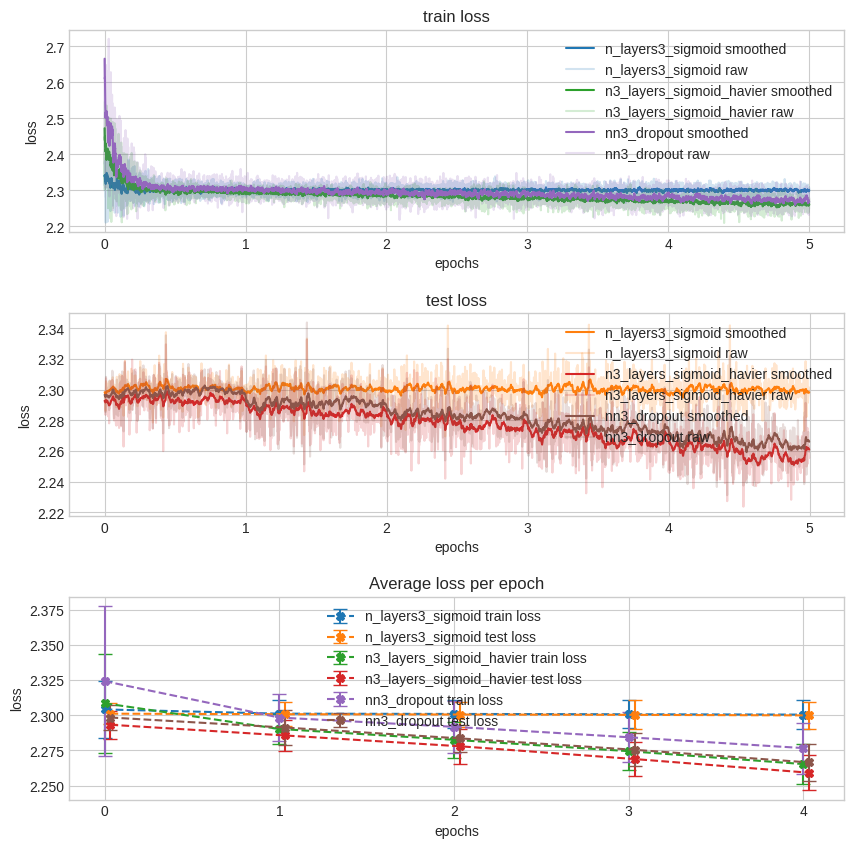

In [ ]:
history_plotter.add(history)
history_plotter.plot(["n_layers3_sigmoid", "n3_layers_sigmoid_havier", model_name])

–í –¥–∞–Ω–Ω–æ–º —Å–ª—É—á–∞–µ –≤—ã–∏–≥—Ä—ã—à–∞ –º—ã –Ω–µ –ø–æ–ª—É—á–∏–ª–∏. –í–æ–∑–º–æ–∂–Ω–æ, –µ—Å–ª–∏ —É—á–∏—Ç—å –Ω–µ–π—Ä–æ—Å–µ—Ç—å –±–æ–ª—å—à–µ —ç–ø–æ—Ö, —ç—Ñ—Ñ–µ–∫—Ç –±—ã –∑–∞–º–µ—Ç–∏–ª–∏

#### –ü—Ä–∏–º–µ—Ä –±–æ—Ä—å–±—ã —Å –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–µ–º –ø—Ä–∏ –ø–æ–º–æ—â–∏ Dropout


–ß—Ç–æ–±—ã —É–≤–∏–¥–µ—Ç—å —ç—Ñ—Ñ–µ–∫—Ç –∏ –ø—Ä–∏ —ç—Ç–æ–º –Ω–µ —É—á–∏—Ç—å –Ω–µ–π—Ä–æ—Å–µ—Ç—å 100+ —ç–ø–æ—Ö, —Å–¥–µ–ª–∞–µ–º –∏—Å–∫—É—Å—Å—Ç–≤–µ–Ω–Ω—ã–π –ø—Ä–∏–º–µ—Ä.

–ü—Ä–æ—Å—Ç–æ **–¥–æ–±–∞–≤–∏–º –∫ –ª–∏–Ω–µ–π–Ω–æ–π –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ —à—É–º** –∏ –ø–æ–ø—Ä–æ–±—É–µ–º –≤—ã—É—á–∏—Ç—å –µ–µ –Ω–µ–π—Ä–æ–Ω–Ω–æ–π —Å–µ—Ç—å—é.

[Batch Normalization and Dropout in Neural Networks with PyTorch (–ø–µ—Ä–µ–≤–æ–¥)](https://machinelearningmastery.ru/batch-normalization-and-dropout-in-neural-networks-explained-with-pytorch-47d7a8459bcd/#)

In [ ]:
N = 50  # number of data points
noise = 0.3

# generate the train data
x_train = torch.unsqueeze(torch.linspace(-1, 1, N), 1)
y_train = x_train + noise * torch.normal(torch.zeros(N, 1), torch.ones(N, 1))

# generate the test data
x_test = torch.unsqueeze(torch.linspace(-1, 1, N), 1)
y_test = x_test + noise * torch.normal(torch.zeros(N, 1), torch.ones(N, 1))

print(f"x_train shape: {x_train.shape}\nx_test shape: {x_test.shape}")

x_train shape: torch.Size([50, 1])
x_test shape: torch.Size([50, 1])


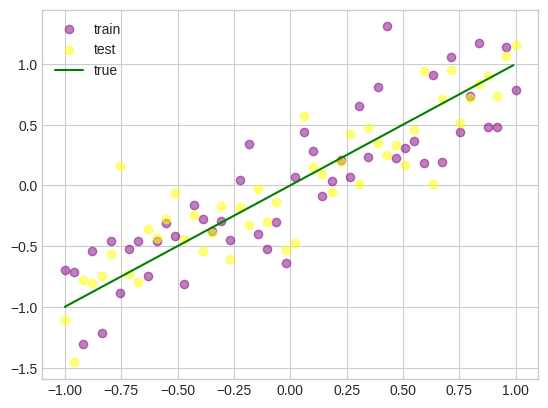

In [ ]:
plt.scatter(
    x_train.data.numpy(), y_train.data.numpy(), c="purple", alpha=0.5, label="train"
)
plt.scatter(
    x_test.data.numpy(), y_test.data.numpy(), c="yellow", alpha=0.5, label="test"
)

x_real = np.arange(-1, 1, 0.01)
y_real = x_real
plt.plot(x_real, y_real, c="green", label="true")
plt.legend()
plt.show()

–ú–æ–¥–µ–ª—å **–±–µ–∑ Dropout**:

In [ ]:
N_h = 100  # num of neurons
model = torch.nn.Sequential(
    torch.nn.Linear(1, N_h),
    torch.nn.ReLU(),
    torch.nn.Linear(N_h, N_h),
    torch.nn.ReLU(),
    torch.nn.Linear(N_h, 1),
)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

–ú–æ–¥–µ–ª—å **—Å Dropout**:

In [ ]:
N_h = 100  # num of neurons

model_dropout = nn.Sequential(
    nn.Linear(1, N_h),
    nn.Dropout(0.5),  # 50 % probability
    nn.ReLU(),
    torch.nn.Linear(N_h, N_h),
    nn.Dropout(0.2),  # 20% probability
    nn.ReLU(),
    torch.nn.Linear(N_h, 1),
)
optimizer_dropout = torch.optim.Adam(model_dropout.parameters(), lr=0.01)

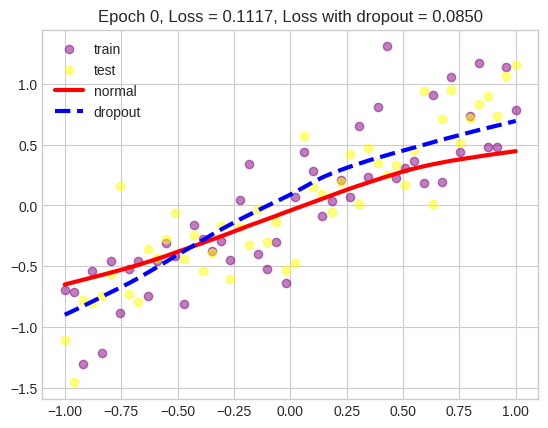

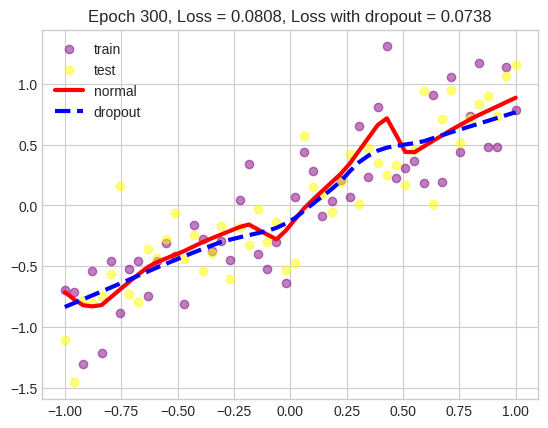

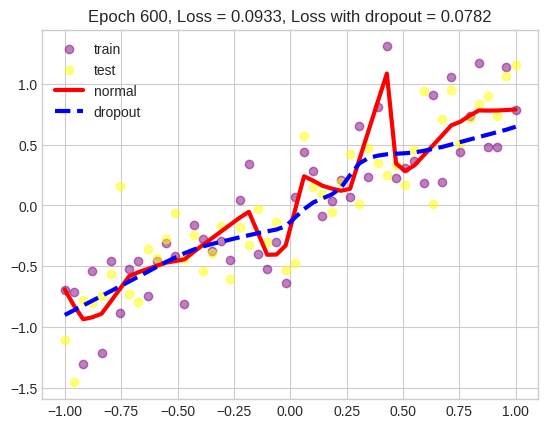

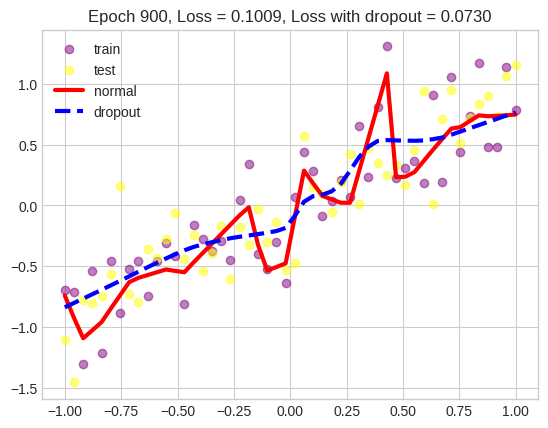

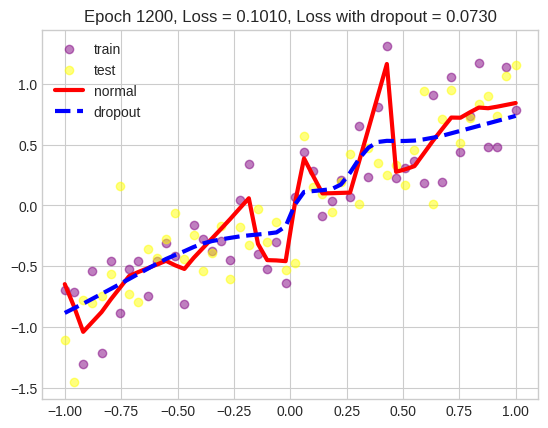

In [ ]:
num_epochs = 1500
criterion = torch.nn.MSELoss()

for epoch in range(num_epochs):
    # train without dropout
    y_pred = model(x_train)  # look at the entire data in a single shot
    loss = criterion(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # train with dropout
    y_pred_dropout = model_dropout(x_train)
    loss_dropout = criterion(y_pred_dropout, y_train)
    optimizer_dropout.zero_grad()
    loss_dropout.backward()
    optimizer_dropout.step()

    if epoch % 300 == 0:
        model.eval()  # not train mode
        model_dropout.eval()  #  not train mode

        # get predictions
        y_test_pred = model(x_test)
        test_loss = criterion(y_test_pred, y_test)

        y_test_pred_dropout = model_dropout(x_test)
        test_loss_dropout = criterion(y_test_pred_dropout, y_test)
        # plotting data and predictions
        plt.scatter(
            x_train.data.numpy(),
            y_train.data.numpy(),
            c="purple",
            alpha=0.5,
            label="train",
        )
        plt.scatter(
            x_test.data.numpy(),
            y_test.data.numpy(),
            c="yellow",
            alpha=0.5,
            label="test",
        )
        plt.plot(
            x_test.data.numpy(), y_test_pred.data.numpy(), "r-", lw=3, label="normal"
        )
        plt.plot(
            x_test.data.numpy(),
            y_test_pred_dropout.data.numpy(),
            "b--",
            lw=3,
            label="dropout",
        )

        plt.title(
            "Epoch %d, Loss = %0.4f, Loss with dropout = %0.4f"
            % (epoch, test_loss, test_loss_dropout)
        )

        plt.legend()

        model.train()  # train mode
        model_dropout.train()  # train mode

        plt.pause(0.05)

–í–∏–¥–∏–º, —á—Ç–æ **–Ω–µ–π—Ä–æ—Å–µ—Ç—å –±–µ–∑ Dropout —Å–∏–ª—å–Ω–æ –ø–µ—Ä–µ–æ–±—É—á–∏–ª–∞—Å—å**.

#### –î–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª –æ—Ç Dropout

–ú–æ–∂–Ω–æ, –∏—Å–ø–æ–ª—å–∑—É—è –Ω–µ–π—Ä–æ—Å–µ—Ç—å —Å Dropout, –ø–æ–ª—É—á–∏—Ç—å **–¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª** –¥–ª—è –Ω–∞—à–µ–≥–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è (–∫–∞–∫ –¥–µ–ª–∞–ª–∏ –≤ –ª–µ–∫—Ü–∏–∏ –ø–æ ML). –ü—Ä–æ—Å—Ç–æ **–Ω–µ "–∑–∞–º–æ—Ä–∞–∂–∏–≤–∞–µ–º" dropout-—Å–ª–æ–∏** –≤–æ –≤—Ä–µ–º—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è, –∞ –¥–µ–ª–∞–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è —Å –∞–∫—Ç–∏–≤–Ω—ã–º–∏ dropout.

–î–µ–ª–∞–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –æ–±—ä–µ–∫—Ç–∞ 1000 —Ä–∞–∑. –°–¥–µ–ª–∞–≤ —ç—Ç–æ 1000 —Ä–∞–∑, –≤—ã –ø–æ–ª—É—á–∞–µ—Ç–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π, –Ω–∞ –æ—Å–Ω–æ–≤–µ –∫–æ—Ç–æ—Ä–æ–≥–æ –º–æ–∂–Ω–æ –¥–µ–ª–∞—Ç—å **–¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–µ –∏–Ω—Ç–µ—Ä–≤–∞–ª—ã** –∏ –∫–∞–∫ —Ä–∞–∑ –ª–æ–≤–∏—Ç—å **–∞–Ω–æ–º–∞–ª–∏–∏** ‚Äî —Ç–µ –æ–±—ä–µ–∫—Ç—ã, –Ω–∞ –∫–æ—Ç–æ—Ä—ã—Ö –Ω–µ–π—Ä–æ—Å–µ—Ç—å –≤–æ–æ–±—â–µ –Ω–µ –ø–æ–Ω–∏–º–∞–µ—Ç, —á—Ç–æ –µ–π –¥–µ–ª–∞—Ç—å, –∏ –ø–æ—Ç–æ–º—É –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞–µ—Ç –º–µ—Ç–∫—É –∏–ª–∏ –µ—â–µ —á—Ç–æ-—Ç–æ —Å —Å–∏–ª—å–Ω–æ–π –¥–∏—Å–ø–µ—Ä—Å–∏–µ–π.


<center><img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/L07/confidence_interval_dropout.png" width="600"></center>

<center><em>Source: <a href="https://atcold.github.io/NYU-DLSP20/en/week14/14-3/">Overfitting and regularization</a></em></center>



## DropConnect

–ï—Å–ª–∏ –∑–∞–Ω—É–ª—è—Ç—å –Ω–µ –Ω–µ–π—Ä–æ–Ω—ã (–∞–∫—Ç–∏–≤–∞—Ü–∏–∏), –∞ —Å–ª—É—á–∞–π–Ω—ã–µ –≤–µ—Å–∞ —Å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å—é $p$, –ø–æ–ª—É—á–∏—Ç—Å—è DropConnect.

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L07/out/dropconnect.png" width="650">

DropConnect –ø–æ—Ö–æ–∂ –Ω–∞ Dropout, –ø–æ—Å–∫–æ–ª—å–∫—É –æ–Ω –≤–≤–æ–¥–∏—Ç –¥–∏–Ω–∞–º–∏—á–µ—Å–∫—É—é —Ä–∞–∑—Ä–µ–∂–µ–Ω–Ω–æ—Å—Ç—å –≤ –º–æ–¥–µ–ª—å, –Ω–æ –æ—Ç–ª–∏—á–∞–µ—Ç—Å—è —Ç–µ–º, —á—Ç–æ —Ä–∞–∑—Ä–µ–∂–µ–Ω–Ω–æ—Å—Ç—å –∑–∞–≤–∏—Å–∏—Ç –æ—Ç –≤–µ—Å–æ–≤ *W*, –∞ –Ω–µ –æ—Ç –≤—ã—Ö–æ–¥–Ω—ã—Ö –≤–µ–∫—Ç–æ—Ä–æ–≤ —Å–ª–æ—è. –î—Ä—É–≥–∏–º–∏ —Å–ª–æ–≤–∞–º–∏, –ø–æ–ª–Ω–æ—Å—Ç—å—é —Å–≤—è–∑–∞–Ω–Ω—ã–π —Å–ª–æ–π —Å DropConnect —Å—Ç–∞–Ω–æ–≤–∏—Ç—Å—è —Ä–∞–∑—Ä–µ–∂–µ–Ω–Ω–æ —Å–≤—è–∑–∞–Ω–Ω—ã–º —Å–ª–æ–µ–º, –≤ –∫–æ—Ç–æ—Ä–æ–º —Å–æ–µ–¥–∏–Ω–µ–Ω–∏—è –≤—ã–±–∏—Ä–∞—é—Ç—Å—è —Å–ª—É—á–∞–π–Ω—ã–º –æ–±—Ä–∞–∑–æ–º –Ω–∞ —ç—Ç–∞–ø–µ –æ–±—É—á–µ–Ω–∏—è.

–í –ø—Ä–∏–Ω—Ü–∏–ø–µ, –≤–∞—Ä–∏–∞–Ω—Ç–æ–≤ –∑–∞–Ω—É–ª–µ–Ω–∏—è —á–µ–≥–æ-—Ç–æ –≤ –Ω–µ–π—Ä–æ–Ω–Ω–æ–π —Å–µ—Ç–∏ –º–æ–∂–Ω–æ –ø—Ä–µ–¥–ª–æ–∂–∏—Ç—å –≤–µ–ª–∏–∫–æ–µ –º–Ω–æ–∂–µ—Å—Ç–≤–æ, –≤ —Ä–∞–∑–Ω—ã—Ö —Å–∏—Ç—É–∞—Ü–∏—è—Ö –±—É–¥—É—Ç —Ä–∞–±–æ—Ç–∞—Ç—å —Ä–∞–∑–Ω—ã–µ —Å–ø–æ—Å–æ–±—ã ([–≤ —ç—Ç–æ–º —Å–ø–∏—Å–∫–µ](https://paperswithcode.com/methods/category/regularization)  –º–Ω–æ–≥–æ Drop...).

## DropBlock

–ù–∞–ø—Ä–∏–º–µ—Ä, –º–æ–∂–Ω–æ —É–±–∏—Ä–∞—Ç—å –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –±–∞—Ç—á–∞ –∏–∑ –Ω–µ–π—Ä–æ—Å–µ—Ç–∏ —Å–ª—É—á–∞–π–Ω—ã–µ –±–ª–æ–∫–∏ –∏–∑ —Å–ª–æ–µ–≤. –ò —ç—Ç–æ –±—É–¥–µ—Ç —Ä–∞–±–æ—Ç–∞—Ç—å!

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L07/out/dropblock.png" width="750">

[[arxiv] üéì Deep Networks with Stochastic Depth](https://arxiv.org/pdf/1603.09382.pdf)

## Batch Normalization –¥–æ –∏–ª–∏ –ø–æ—Å–ª–µ Dropout



### –ü–æ—Å–ª–µ

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L07/out/batchnormalization_after_dropout.png" width="600">

* **–ü–ª–æ—Ö–æ**: –í —Ä–µ–∂–∏–º–µ –æ–±—É—á–µ–Ω–∏—è **Dropout** –±—É–¥–µ—Ç –æ—Ç–∫–ª—é—á–∞—Ç—å (–∑–∞–Ω—É–ª—è—Ç—å) –≤—ã—Ö–æ–¥—ã —Å–ª–æ—è –∞–∫—Ç–∏–≤–∞—Ü–∏–∏, –∏–∑-–∑–∞ —ç—Ç–æ–≥–æ –Ω–∞–∫–æ–ø–ª–µ–Ω–Ω—ã–µ –≤ —Ä–µ–∂–∏–º–µ –æ–±—É—á–µ–Ω–∏—è **–∑–Ω–∞—á–µ–Ω–∏—è —Å–∫–æ–ª—å–∑—è—â–µ–≥–æ —Å—Ä–µ–¥–Ω–µ–≥–æ –º–∞—Ç–æ–∂–∏–¥–∞–Ω–∏—è –∏ –¥–∏—Å–ø–µ—Ä—Å–∏–∏** –¥–ª—è –≤—ã—á–∏—Å–ª–µ–Ω–∏—è **Batch Normalization** –≤ —Ä–µ–∂–∏–º–µ —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è –±—É–¥—É—Ç –∏–º–µ—Ç—å **—Å–¥–≤–∏–≥**, –∫–æ—Ç–æ—Ä—ã–π –ø—Ä–∏–≤–µ–¥–µ—Ç –∫ –Ω–µ—Å—Ç–∞–±–∏–ª—å–Ω–æ–π —Ä–∞–±–æ—Ç–µ –Ω–µ–π—Ä–æ—Å–µ—Ç–∏.


–ü–æ–¥—Ä–æ–±–Ω–æ –æ–± —ç—Ç–æ–º –º–æ–∂–Ω–æ –ø–æ—á–∏—Ç–∞—Ç—å –≤ [—Å—Ç–∞—Ç—å–µ](https://arxiv.org/pdf/1801.05134.pdf) –∏ [–±–ª–æ–∫–Ω–æ—Ç–µ](https://github.com/adelizer/kaggle-sandbox/blob/master/drafts/dropout_bn.ipynb).

### –î–æ

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L07/out/batchnormalization_before_dropout.png" width="600">

* **–õ—É—á—à–µ**: –ú–µ–Ω—å—à–µ –≤–ª–∏—è–Ω–∏–µ —Å–¥–≤–∏–≥–∞ –æ—Ç **Dropout** –Ω–∞ **BatchNorm**. –ù–æ –µ—Å–ª–∏ –Ω–∞ –ø—Ä–µ–¥—ã–¥—É—â–∏—Ö —Å–ª–æ—è—Ö –µ—Å—Ç—å **Dropout**, —Ç–æ –∑–Ω–∞—á–µ–Ω–∏—è –≤—Å–µ —Ä–∞–≤–Ω–æ –º–æ–≥—É—Ç –±—ã—Ç—å —Å–º–µ—â–µ–Ω—ã.

### –°—Ç–∞–≤–∏—Ç—å —Ç–æ–ª—å–∫–æ —á—Ç–æ-—Ç–æ –æ–¥–Ω–æ

* **Dropout** –º–æ–∂–µ—Ç –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω–æ –≤–ª–∏—è—Ç—å –Ω–∞ –∫–∞—á–µ—Å—Ç–≤–æ –Ω–µ–π—Ä–æ—Å–µ—Ç–∏ —Å **BatchNorm** –∑–∞ —Å—á–µ—Ç —Ä–∞–∑–Ω–æ–≥–æ –ø–æ–≤–µ–¥–µ–Ω–∏—è –Ω–∞ train –∏ test. –õ—É—á—à–µ –Ω–µ —Å—Ç–∞–≤–∏—Ç—å **Dropout** —Ä–∞–Ω—å—à–µ **BatchNorm**.

### –°—Ç—Ä–æ–≥–æ –≥–æ–≤–æ—Ä—è

* –û–ø—Ç–∏–º–∞–ª—å–Ω—ã–π –ø–æ—Ä—è–¥–æ–∫ —Å–ª–µ–¥–æ–≤–∞–Ω–∏—è —Å–ª–æ–µ–≤ –∑–∞–≤–∏—Å–∏—Ç –æ—Ç –∑–∞–¥–∞—á–∏ –∏ –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä—ã —Å–µ—Ç–∏.
* –í–æ–∑–º–æ–∂–Ω–æ, —Å—Ç–æ–∏—Ç –ø—Ä–∏–º–µ–Ω—è—Ç—å –¥—Ä—É–≥–∏–µ –≤–∏–¥—ã –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏.
* –ï—Å–ª–∏ –∏—Å–ø–æ–ª—å–∑—É–µ–º **BatchNormalization**, —Ç–æ –Ω–∞–¥–æ —É–º–µ–Ω—å—à–∏—Ç—å —Å–∏–ª—É **Dropout** –∏ **L2**-—Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏.

# –û–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –Ω–µ–π—Ä–æ—Å–µ—Ç–µ–π

–í –ø—Ä–æ—Ü–µ—Å—Å–µ –æ–±—É—á–µ–Ω–∏—è –º—ã –ø—ã—Ç–∞–µ–º—Å—è –ø–æ–¥–æ–±—Ä–∞—Ç—å –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –º–æ–¥–µ–ª–∏, –ø—Ä–∏ –∫–æ—Ç–æ—Ä—ã—Ö –æ–Ω–∞ –±—É–¥–µ—Ç —Ä–∞–±–æ—Ç–∞—Ç—å –ª—É—á—à–µ –≤—Å–µ–≥–æ. –≠—Ç–æ ‚Äî **–æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–æ–Ω–Ω–∞—è –∑–∞–¥–∞—á–∞** (–∑–∞–¥–∞—á–∞ –ø–æ–¥–±–æ—Ä–∞ –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤). –ú—ã —É–∂–µ –æ–∑–Ω–∞–∫–æ–º–∏–ª–∏—Å—å —Å –æ–¥–Ω–∏–º –∞–ª–≥–æ—Ä–∏—Ç–º–æ–º –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ ‚Äî **–≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–º —Å–ø—É—Å–∫–æ–º**.

–°—É—â–µ—Å—Ç–≤—É–µ—Ç –º–Ω–æ–∂–µ—Å—Ç–≤–æ **–∞–ª–≥–æ—Ä–∏—Ç–º–æ–≤ –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏**, –∫–æ—Ç–æ—Ä—ã–µ –º–æ–∂–Ω–æ –ø—Ä–∏–º–µ–Ω—è—Ç—å –¥–ª—è –ø–æ–∏—Å–∫–∞ –º–∏–Ω–∏–º—É–º–∞ —Ñ—É–Ω–∫—Ü–∏–æ–Ω–∞–ª–∞ –æ—à–∏–±–∫–∏ ([–Ω–µ–ø–æ–ª–Ω—ã–π —Å–ø–∏—Å–æ–∫](https://paperswithcode.com/methods/category/stochastic-optimization)). –≠—Ç–∏ –∞–ª–≥–æ—Ä–∏—Ç–º—ã —Ä–µ–∞–ª–∏–∑–æ–≤–∞–Ω—ã –≤ –º–æ–¥—É–ª–µ [`torch.optim`](https://pytorch.org/docs/stable/optim.html).

–í–∞–∂–Ω–æ –æ—Ç–º–µ—Ç–∏—Ç—å, —á—Ç–æ **–≤—ã–±–æ—Ä –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä–∞ –Ω–µ –≤–ª–∏—è–µ—Ç –Ω–∞ —Ä–∞—Å—á–µ—Ç –≥—Ä–∞–¥–∏–µ–Ω—Ç–∞**. –ì—Ä–∞–¥–∏–µ–Ω—Ç –≤ PyTorch –≤—ã—á–∏—Å–ª—è–µ—Ç—Å—è –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∏ –Ω–∞ –æ—Å–Ω–æ–≤–µ –≥—Ä–∞—Ñ–∞ –≤—ã—á–∏—Å–ª–µ–Ω–∏–π.


## –û–±–∑–æ—Ä –ø–æ–ø—É–ª—è—Ä–Ω—ã—Ö –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä–æ–≤

### SGD (stochastic gradient descent)

–ü—Ä–∏ –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–º —Å–ø—É—Å–∫–µ –º—ã:
- –¥–µ–ª–∞–µ–º **–ø—Ä—è–º–æ–π –ø—Ä–æ—Ö–æ–¥**, –≤—ã—á–∏—Å–ª—è–µ–º —Ñ—É–Ω–∫—Ü–∏–æ–Ω–∞–ª –æ—à–∏–±–∫–∏ $L(x, y, w_t)$;
- –¥–µ–ª–∞–µ–º **–æ–±—Ä–∞—Ç–Ω—ã–π –ø—Ä–æ—Ö–æ–¥**, –≤—ã—á–∏—Å–ª—è–µ–º –≥—Ä–∞–¥–∏–µ–Ω—Ç $\nabla_wL(x, y, w_t)$;
- –¥–µ–ª–∞–µ–º **—à–∞–≥ –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏**: –∏–∑–º–µ–Ω—è–µ–º –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –º–æ–¥–µ–ª–∏ –ø–æ —Ñ–æ—Ä–º—É–ª–µ:

$$w_{t+1} = w_t - lr \cdot \nabla_wL(x, y, w_t),$$

–¥–æ–º–Ω–æ–∂–∞—è –∞–Ω—Ç–∏–≥—Ä–∞–¥–∏–µ–Ω—Ç –Ω–∞ –ø–æ—Å—Ç–æ—è–Ω–Ω—ã–π –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç $lr$ (–≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä –æ–±—É—á–µ–Ω–∏—è ‚Äî learning rate).

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L07/out/stochastic_gradient_descent.gif" width="950">

–£ –¥–∞–Ω–Ω–æ–≥–æ –∞–ª–≥–æ—Ä–∏—Ç–º–∞ –µ—Å—Ç—å –ø—Ä–æ–±–ª–µ–º–∞: –æ–Ω –º–æ–∂–µ—Ç –∑–∞—Å—Ç—Ä–µ–≤–∞—Ç—å –≤ **–ª–æ–∫–∞–ª—å–Ω—ã—Ö –º–∏–Ω–∏–º—É–º–∞—Ö** –∏–ª–∏ –¥–∞–∂–µ **—Å–µ–¥–ª–æ–≤—ã—Ö —Ç–æ—á–∫–∞—Ö**.

**C–µ–¥–ª–æ–≤—ã–µ —Ç–æ—á–∫–∏** ‚Äî —Ç–æ—á–∫–∏, –≤ –∫–æ—Ç–æ—Ä—ã—Ö –≤—Å–µ –ø—Ä–æ–∏–∑–≤–æ–¥–Ω—ã–µ —Ä–∞–≤–Ω—ã 0, –Ω–æ –æ–Ω–∏ –Ω–µ —è–≤–ª—è—é—Ç—Å—è —ç–∫—Å—Ç—Ä–µ–º—É–º–∞–º–∏. –í –Ω–∏—Ö –≥—Ä–∞–¥–∏–µ–Ω—Ç —Ä–∞–≤–µ–Ω 0, –≤–µ—Å–∞ –Ω–µ –æ–±–Ω–æ–≤–ª—è—é—Ç—Å—è ‚Äî –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è –æ—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞–µ—Ç—Å—è.

–ü—Ä–∏–º–µ—Ä —Ç–∞–∫–∏—Ö —Ç–æ—á–µ–∫:

- —Ç–æ—á–∫–∞ $(0, 0)$ —É —Ñ—É–Ω–∫—Ü–∏–∏ $y = x^3$, –Ω–µ –∏–º–µ—é—â–µ–π –º–∏–Ω–∏–º—É–º–∞ –∏–ª–∏ –º–∞–∫—Å–∏–º—É–º–∞ –≤–æ–≤—Å–µ;
- —Ç–æ—á–∫–∞ $(0, 0, 0)$ —É —Ñ—É–Ω–∫—Ü–∏–∏ $z = x^2 - y^2$.

<center><img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L07/out/getting_stuck_in_local_minimum_example.png" width="350"> <img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L07/out/saddle_point_example.png" width="400"></center>

<center><em><a href="https://ru.wikipedia.org/wiki/%D0%A1%D0%B5%D0%B4%D0%BB%D0%BE%D0%B2%D0%B0%D1%8F_%D1%82%D0%BE%D1%87%D0%BA%D0%B0">–°–µ–¥–ª–æ–≤–∞—è —Ç–æ—á–∫–∞</a></em></center>

–ß–∞—Å—Ç–∏—á–Ω–æ —ç—Ç—É –ø—Ä–æ–±–ª–µ–º—É —Ä–µ—à–∞–µ—Ç **—Å—Ç–æ—Ö–∞—Å—Ç–∏—á–µ—Å–∫–∏–π –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π —Å–ø—É—Å–∫** (stochastic gradient descent, **SGD**). –í –Ω–µ–º –¥–ª—è –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ —Å–ø—É—Å–∫–∞ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –Ω–µ –≤—Å–µ –¥–∞–Ω–Ω—ã–µ, –∞ –Ω–µ–∫–æ—Ç–æ—Ä–∞—è –ø–æ–¥–≤—ã–±–æ—Ä–∫–∞ (mini-batch) –∏–ª–∏ –¥–∞–∂–µ –æ–¥–∏–Ω —ç–ª–µ–º–µ–Ω—Ç.


**SGD** –æ–±–ª–∞–¥–∞–µ—Ç –≤–∞–∂–Ω–æ–π –æ—Å–æ–±–µ–Ω–Ω–æ—Å—Ç—å—é: –Ω–∞ –∫–∞–∂–¥–æ–º –æ–±—ä–µ–∫—Ç–µ –∏–ª–∏ –ø–æ–¥–≤—ã–±–æ—Ä–∫–µ (mini-batch) –ª–∞–Ω–¥—à–∞—Ñ—Ç —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å –≤—ã–≥–ª—è–¥–∏—Ç –ø–æ-—Ä–∞–∑–Ω–æ–º—É. –ù–µ–∫–æ—Ç–æ—Ä—ã–µ –º–∏–Ω–∏–º—É–º—ã —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å –∏ —Å–µ–¥–ª–æ–≤—ã–µ —Ç–æ—á–∫–∏ –º–æ–≥—É—Ç –±—ã—Ç—å —Ö–∞—Ä–∞–∫—Ç–µ—Ä–Ω—ã –ª–∏—à—å –¥–ª—è —á–∞—Å—Ç–∏ –æ–±—ä–µ–∫—Ç–æ–≤.

–ù–∏–∂–µ **—É–ø—Ä–æ—â–µ–Ω–Ω–æ** –ø–æ–∫–∞–∑–∞–Ω—ã –ª–∞–Ω–¥—à–∞—Ñ—Ç—ã —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å –Ω–∞ –ø–æ–ª–Ω–æ–º –¥–∞—Ç–∞—Å–µ—Ç–µ –∏ –Ω–∞ –æ—Ç–¥–µ–ª—å–Ω—ã—Ö –±–∞—Ç—á–∞—Ö. –ü—Ä–∏ –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏ –Ω–∞ –ø–æ–ª–Ω–æ–º –¥–∞—Ç–∞—Å–µ—Ç–µ –º–æ–¥–µ–ª—å –º–æ–≥–ª–∞ –±—ã **–æ—Å—Ç–∞–Ω–æ–≤–∏—Ç—å—Å—è –≤ –ª–µ–≤–æ–º –ª–æ–∫–∞–ª—å–Ω–æ–º –º–∏–Ω–∏–º—É–º–µ**, –Ω–æ —Å—Ç–æ—Ö–∞—Å—Ç–∏—á–µ—Å–∫–∞—è –ø—Ä–∏—Ä–æ–¥–∞ —Å–ø—É—Å–∫–∞ –ø–æ–∑–≤–æ–ª—è–µ—Ç –∏–∑–±–µ–∂–∞—Ç—å —ç—Ç–æ–≥–æ –∑–∞ —Å—á–µ—Ç —Ç–æ–≥–æ, —á—Ç–æ **–¥–ª—è –Ω–µ–∫–æ—Ç–æ—Ä—ã—Ö –±–∞—Ç—á–µ–π —ç—Ç–æ—Ç –º–∏–Ω–∏–º—É–º –æ—Ç—Å—É—Ç—Å—Ç–≤—É–µ—Ç**.

–í —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ –º–æ–¥–µ–ª—å —Å–º–æ–∂–µ—Ç –æ—Å—Ç–∞–Ω–æ–≤–∏—Ç—å—Å—è —Ç–æ–ª—å–∫–æ –≤ –∫–∞–∫–æ–º-—Ç–æ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ —à–∏—Ä–æ–∫–æ–º –∏ –≥–ª—É–±–æ–∫–æ–º –º–∏–Ω–∏–º—É–º–µ, —Ö–∞—Ä–∞–∫—Ç–µ—Ä–Ω–æ–º –¥–ª—è –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–∞ –±–∞—Ç—á–µ–π –æ–±—É—á–∞—é—â–∏—Ö –¥–∞–Ω–Ω—ã—Ö. –° –±–æ–ª—å—à–æ–π –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å—é —ç—Ç–æ—Ç –º–∏–Ω–∏–º—É–º –±—É–¥–µ—Ç –ø—Ä–∏—Å—É—Ç—Å—Ç–≤–æ–≤–∞—Ç—å –∏ –Ω–∞ —Ä–µ–∞–ª—å–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö, —Ç–æ –µ—Å—Ç—å –º–æ–¥–µ–ª—å —Å–º–æ–∂–µ—Ç –∞–¥–µ–∫–≤–∞—Ç–Ω–æ —Ä–∞–±–æ—Ç–∞—Ç—å —Å –Ω–∏–º–∏.

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L07/out/sgd_loss_batch_landscape.png" width="700">

**SGD** –¥–æ —Å–∏—Ö –ø–æ—Ä —è–≤–ª—è–µ—Ç—Å—è –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –ø–æ–ø—É–ª—è—Ä–Ω—ã–º –º–µ—Ç–æ–¥–æ–º –æ–±—É—á–µ–Ω–∏—è –Ω–µ–π—Ä–æ—Å–µ—Ç–µ–π, –ø–æ—Ç–æ–º—É —á—Ç–æ –æ–Ω –ø—Ä–æ—Å—Ç–æ–π, –Ω–µ —Ç—Ä–µ–±—É–µ—Ç –ø–æ–¥–±–æ—Ä–∞ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã—Ö –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤, –∫—Ä–æ–º–µ **—Å–∫–æ—Ä–æ—Å—Ç–∏ –æ–±—É—á–µ–Ω–∏—è** `lr`, –∏ —Å–∞–º –ø–æ —Å–µ–±–µ –æ–±—ã—á–Ω–æ –¥–∞–µ—Ç –Ω–µ–ø–ª–æ—Ö–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã.

–ï—Å–ª–∏ –∂–µ –º–æ–¥–µ–ª—å —É—á–∏—Ç—Å—è —Å–ª–∏—à–∫–æ–º –¥–æ–ª–≥–æ –∏/–∏–ª–∏ –≤–∞–∂–Ω–∞ –∫–∞–∂–¥–∞—è —Å–æ—Ç–∞—è –≤ –∫–∞—á–µ—Å—Ç–≤–µ, —Ç–æ –Ω—É–∂–Ω–æ –ª–∏–±–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –µ–≥–æ –≤ —Å–æ–≤–æ–∫—É–ø–Ω–æ—Å—Ç–∏ —Å –¥—Ä—É–≥–∏–º–∏ —Ç–µ—Ö–Ω–∏–∫–∞–º–∏ (–∏—Ö —Ä–∞—Å—Å–º–æ—Ç—Ä–∏–º –¥–∞–ª–µ–µ), –ª–∏–±–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –¥—Ä—É–≥–∏–µ —Å–ø–æ—Å–æ–±—ã.

–§—Ä–∞–≥–º–µ–Ω—Ç –∫–æ–¥–∞ –¥–ª—è –ø–æ–Ω–∏–º–∞–Ω–∏—è —Ä–∞–±–æ—Ç—ã SGD:
```
class SGD:
  def __init__(self, parameters, lr):
    self.parameters = parameters
    self.lr = lr

  def step(self):
    d_parameters = self.parameters.grad
    self.parameters -= self.lr*d_parameters
```

–ê–ª–≥–æ—Ä–∏—Ç–º SGD —Ä–µ–∞–ª–∏–∑–æ–≤–∞–Ω –≤ [`torch.optim.SGD`](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html)

In [ ]:
import torch.optim as optim

parameters = torch.randn(10, requires_grad=True)
optimizer = optim.SGD(model.parameters(), lr=0.001)

**–ú–∏–Ω—É—Å—ã SGD**:

 1. –ï—Å–ª–∏ —Ñ—É–Ω–∫—Ü–∏—è –æ—à–∏–±–∫–∏ –±—ã—Å—Ç—Ä–æ –º–µ–Ω—è–µ—Ç—Å—è –≤ –æ–¥–Ω–æ–º –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏–∏, –∞ –≤ –¥—Ä—É–≥–æ–º &mdash; –º–µ–¥–ª–µ–Ω–Ω–æ, —Ç–æ —ç—Ç–æ –ø—Ä–∏–≤–æ–¥–∏—Ç –∫ —Ä–µ–∑–∫–∏–º –∏–∑–º–µ–Ω–µ–Ω–∏—è–º –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏—è –≥—Ä–∞–¥–∏–µ–Ω—Ç–æ–≤ –∏ –∑–∞–º–µ–¥–ª—è–µ—Ç –ø—Ä–æ—Ü–µ—Å—Å –æ–±—É—á–µ–Ω–∏—è.


<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L07/out/stohastic_gradient_descent_no_momentum.gif" width="500">


 2. –ú–æ–∂–µ—Ç –∑–∞—Å—Ç—Ä–µ–≤–∞—Ç—å –≤ –ª–æ–∫–∞–ª—å–Ω—ã—Ö –º–∏–Ω–∏–º—É–º–∞—Ö –∏–ª–∏ —Å–µ–¥–ª–æ–≤—ã—Ö —Ç–æ—á–∫–∞—Ö.

 3. –ú—ã –æ—Ü–µ–Ω–∏–≤–∞–µ–º –≥—Ä–∞–¥–∏–µ–Ω—Ç –ø–æ –º–∞–ª—ã–º —á–∞—Å—Ç—è–º –≤—ã–±–æ—Ä–∫–∏, –∫–æ—Ç–æ—Ä—ã–µ –º–æ–≥—É—Ç –ø–ª–æ—Ö–æ –æ—Ç–æ–±—Ä–∞–∂–∞—Ç—å –≥—Ä–∞–¥–∏–µ–Ω—Ç –ø–æ –≤—Å–µ–π –≤—ã–±–æ—Ä–∫–µ –∏ —è–≤–ª—è—Ç—å—Å—è —à—É–º–Ω—ã–º–∏. –í —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ —á–∞—Å—Ç—å —à–∞–≥–æ–≤ –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ —Å–ø—É—Å–∫–∞ –¥–µ–ª–∞–µ—Ç—Å—è –≤–ø—É—Å—Ç—É—é –∏–ª–∏ –≤–æ –≤—Ä–µ–¥.

 4. –ú—ã –ø—Ä–∏–º–µ–Ω—è–µ–º –æ–¥–∏–Ω –∏ —Ç–æ—Ç –∂–µ `learning rate` –∫–æ –≤—Å–µ–º –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º, —á—Ç–æ –Ω–µ –≤—Å–µ–≥–¥–∞ —Ä–∞–∑—É–º–Ω–æ. –ü–∞—Ä–∞–º–µ—Ç—Ä, –æ—Ç–≤–µ—á–∞—é—â–∏–π —Ä–µ–¥–∫–æ–º—É –∫–ª–∞—Å—Å—É, –±—É–¥–µ—Ç –æ–±—É—á–∞—Ç—å—Å—è –º–µ–¥–ª–µ–Ω–Ω–µ–µ –æ—Å—Ç–∞–ª—å–Ω—ã—Ö.

 5. –ü—Ä–æ—Å—Ç–æ –º–µ–¥–ª–µ–Ω–Ω–µ–µ —Å—Ö–æ–¥–∏—Ç—Å—è.

**SGD** —è–≤–ª—è–µ—Ç—Å—è –æ—Å–Ω–æ–≤–æ–π –≤—Å–µ—Ö –æ–ø–∏—Å–∞–Ω–Ω—ã—Ö –Ω–∏–∂–µ –∞–ª–≥–æ—Ä–∏—Ç–º–æ–≤.

### Momentum

–ß—Ç–æ–±—ã –∏–∑–±–µ–∂–∞—Ç—å –ø—Ä–æ–±–ª–µ–º 1‚Äì3, –º–æ–∂–Ω–æ –¥–æ–±–∞–≤–∏—Ç—å –¥–≤–∏–∂–µ–Ω–∏—é –ø–æ –ª–∞–Ω–¥—à–∞—Ñ—Ç—É —Ñ—É–Ω–∫—Ü–∏–∏ –æ—à–∏–±–æ–∫ –∏–Ω–µ—Ä—Ü–∏–∏ (**momentum**). –ü–æ –∞–Ω–∞–ª–æ–≥–∏–∏ —Å —Ä–µ–∞–ª—å–Ω–æ–π –∂–∏–∑–Ω—å—é: –µ—Å–ª–∏ –º—è—á –∫–∞—Ç–∏—Ç—Å—è —Å –≥–æ—Ä–∫–∏, —Ç–æ –æ–Ω –±–ª–∞–≥–æ–¥–∞—Ä—è –∏–Ω–µ—Ä—Ü–∏–∏ –º–æ–∂–µ—Ç –ø—Ä–æ—Å–∫–æ—á–∏—Ç—å –ø–æ–ª–æ–≥–æ–µ –º–µ—Å—Ç–æ –∏–ª–∏ –¥–∞–∂–µ –Ω–µ–±–æ–ª—å—à—É—é —è–º—É.

–ö–æ—Ä—Ä–µ–∫—Ç–∏—Ä—É–µ–º –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏–µ –¥–≤–∏–∂–µ–Ω–∏—è —à–∞—Ä–∏–∫–∞ —Å —É—á–µ—Ç–æ–º —Ç–µ–∫—É—â–µ–≥–æ –≥—Ä–∞–¥–∏–µ–Ω—Ç–∞:

$$v_{t} = m \cdot v_{t-1} + \nabla_wL(x, y, w_{t})$$

–≥–¥–µ $m \in [0, 1)$ ‚Äî momentum (–≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä).

–í—ã—á–∏—Å–ª—è–µ–º, –∫—É–¥–∞ –æ–Ω –ø–æ–∫–∞—Ç–∏—Ç—Å—è:

$$w_{t+1} = w_t - lr \cdot v_{t}$$

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L07/out/advantages_wtih_momentum.png" width="480">

[–ì—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π —Å–ø—É—Å–∫, –∫–∞–∫ —É—á–∞—Ç—Å—è –Ω–µ–π—Ä–æ–Ω–Ω—ã–µ —Å–µ—Ç–∏ (–≤–∏–¥–µ–æ)](https://youtu.be/IHZwWFHWa-w)

–¢–µ–ø–µ—Ä—å –º—ã –±—ã—Å—Ç—Ä–µ–µ –¥–æ—Å—Ç–∏–≥–∞–µ–º –ª–æ–∫–∞–ª—å–Ω–æ–≥–æ –º–∏–Ω–∏–º—É–º–∞ –∏ –º–æ–∂–µ–º –≤—ã–∫–∞—Ç—ã–≤–∞—Ç—å—Å—è –∏–∑ —Å–æ–≤—Å–µ–º –Ω–µ–≥–ª—É–±–æ–∫–∏—Ö. –ì—Ä–∞–¥–∏–µ–Ω—Ç —Å—Ç–∞–ª –º–µ–Ω–µ–µ –ø–æ–¥–≤–µ—Ä–∂–µ–Ω —à—É–º—É, –º–µ–Ω—å—à–µ –æ—Å—Ü–∏–ª–ª–∏—Ä—É–µ—Ç

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L07/out/stohastic_gradient_descent_no_momentum.gif" width="500"> <img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L07/out/stohastic_gradient_descent_with_momentum.gif" width="500">

–§—Ä–∞–≥–º–µ–Ω—Ç –∫–æ–¥–∞ –¥–ª—è –ø–æ–Ω–∏–º–∞–Ω–∏—è —Ä–∞–±–æ—Ç—ã Momentum:

```
class SGD_with_momentum:
  def __init__(self, parameters, momentum, lr):
    self.parameters = parameters
    self.momentum = momentum
    self.lr = lr
    self.velocity = torch.zeros_like(parameters)

  def step(self):
    d_parameters = self.parameters.grad
    self.velocity =  self.momentum*self.velocity + d_parameters
    self.weights -= self.lr*self.velocity
```


**Momentum —É–¥–≤–∞–∏–≤–∞–µ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ö—Ä–∞–Ω–∏–º—ã—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤.**

–ê–ª–≥–æ—Ä–∏—Ç–º Momentum —Ä–µ–∞–ª–∏–∑–æ–≤–∞–Ω –≤ `torch.optim.SGD` [üõ†Ô∏è[doc]](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html):

In [ ]:
parameters = torch.randn(10, requires_grad=True)
optimizer = optim.SGD(model.parameters(), momentum=0.9, lr=0.001)

–£ —ç—Ç–æ–≥–æ –ø–æ–¥—Ö–æ–¥–∞ –µ—Å—Ç—å –æ–¥–Ω–∞ –æ–ø–∞—Å–Ω–æ—Å—Ç—å ‚Äî –º—ã –º–æ–∂–µ–º –≤—ã–∫–∞—Ç–∏—Ç—å—Å—è –∑–∞ –ø—Ä–µ–¥–µ–ª—ã –º–∏–Ω–∏–º—É–º–∞, –∫ –∫–æ—Ç–æ—Ä–æ–º—É —Å—Ç—Ä–µ–º–∏–º—Å—è, –∞ –ø–æ—Ç–æ–º –∫–∞–∫–æ–µ-—Ç–æ –≤—Ä–µ–º—è –∫ –Ω–µ–º—É –≤–æ–∑–≤—Ä–∞—â–∞—Ç—å—Å—è.

<img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/L07/problem_of_big_momentum_value.gif" width="700">

<em>Source: <a href="https://distill.pub/2017/momentum/">Why Momentum Really Works</a></em>

[optimizer-visualization](https://github.com/Jaewan-Yun/optimizer-visualization)

–ß—Ç–æ–±—ã —Å —ç—Ç–∏–º –±–æ—Ä–æ—Ç—å—Å—è, –ø—Ä–µ–¥–ª–æ–∂–µ–Ω –¥—Ä—É–≥–æ–π —Å–ø–æ—Å–æ–± –ø–æ–¥—Å—á–µ—Ç–∞ –∏–Ω–µ—Ä—Ü–∏–∏

### NAG (Nesterov momentum)

–ë—É–¥–µ–º —Å–Ω–∞—á–∞–ª–∞ —Å–º–µ—â–∞—Ç—å—Å—è –≤ —Å—Ç–æ—Ä–æ–Ω—É, –∫—É–¥–∞ –ø—Ä–∏–≤–µ–ª –±—ã –Ω–∞—Å –Ω–∞—à –Ω–∞–∫–æ–ø–ª–µ–Ω–Ω—ã–π –≥—Ä–∞–¥–∏–µ–Ω—Ç, —Ç–∞–º —Å—á–∏—Ç–∞—Ç—å –Ω–æ–≤—ã–π –≥—Ä–∞–¥–∏–µ–Ω—Ç –∏ —Å–º–µ—â–∞—Ç—å—Å—è –ø–æ –Ω–µ–º—É.
–í —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ –ø–µ—Ä–µ—Å–∫–æ–∫–∏ —á–µ—Ä–µ–∑ –º–∏–Ω–∏–º—É–º –±—É–¥—É—Ç –º–µ–Ω–µ–µ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω—ã–º–∏, –∏ –∞–ª–≥–æ—Ä–∏—Ç–º –±—É–¥–µ—Ç –±—ã—Å—Ç—Ä–µ–µ —Å—Ö–æ–¥–∏—Ç—å—Å—è:

$$v_{t} = m \cdot v_{t-1} +  \nabla_w L(w_t - lr \cdot m \cdot  v_{t-1} )$$

$$w_{t+1} = w_{t} - lr \cdot v_{t} $$

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L07/out/nesterov_momentum.png" width="800">

–ö–∞–∂–µ—Ç—Å—è, —á—Ç–æ –¥–ª—è —Ä–µ–∞–ª–∏–∑–∞—Ü–∏–∏ —Ç–∞–∫–æ–≥–æ –∞–ª–≥–æ—Ä–∏—Ç–º–∞ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –ø–µ—Ä–µ—Å—á–∏—Ç—ã–≤–∞—Ç—å –ø—Ä—è–º–æ–π –∏ –æ–±—Ä–∞—Ç–Ω—ã–π –ø—Ä–æ—Ö–æ–¥ —Å –Ω–æ–≤—ã–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏, –¥–ª—è –≤—ã—á–∏—Å–ª–µ–Ω–∏—è –≥—Ä–∞–¥–∏–µ–Ω—Ç–∞. –ù–∞ –ø—Ä–∞–∫—Ç–∏–∫–µ —ç—Ç—É —Ñ–æ—Ä–º—É–ª—É –º–æ–∂–Ω–æ [–ø–µ—Ä–µ–ø–∏—Å–∞—Ç—å](http://www.cs.toronto.edu/~hinton/absps/momentum.pdf) —Ç–∞–∫, —á—Ç–æ–±—ã –Ω–µ –ø–µ—Ä–µ—Å—á–∏—Ç—ã–≤–∞—Ç—å –≥—Ä–∞–¥–∏–µ–Ω—Ç.

–° –ø—Å–µ–≤–¥–æ–∫–æ–¥–æ–º, –æ–ø–∏—Å—ã–≤–∞—é—â–∏–º –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç—å –¥–µ–π—Å—Ç–≤–∏–π NAG, –º–æ–∂–Ω–æ –ø–æ–∑–Ω–∞–∫–æ–º–∏—Ç—å—Å—è –≤ [–¥–æ–∫—É–º–µ–Ω—Ç–∞—Ü–∏–∏ PyTorch](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html).

**–¢–∞–∫ –∂–µ, –∫–∞–∫ momentum, Nesterov momentum —É–¥–≤–∞–∏–≤–∞–µ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ö—Ä–∞–Ω–∏–º—ã—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤.**

–ê–ª–≥–æ—Ä–∏—Ç–º Nesterov momentum —Ä–µ–∞–ª–∏–∑–æ–≤–∞–Ω –≤ `torch.optim.SGD` [üõ†Ô∏è[doc]](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html):

In [ ]:
parameters = torch.randn(10, requires_grad=True)
optimizer = optim.SGD(model.parameters(), momentum=0.9, nesterov=True, lr=0.001)

### Adaptive Learning Rate

–û–ø–∏—Å–∞–Ω–Ω—ã–µ –∞–ª–≥–æ—Ä–∏—Ç–º—ã –Ω–µ –±–æ—Ä—é—Ç—Å—è —Å 4-–æ–π –ø—Ä–æ–±–ª–µ–º–æ–π SGD: "–º—ã –ø—Ä–∏–º–µ–Ω—è–µ–º **–æ–¥–∏–Ω –∏ —Ç–æ—Ç –∂–µ learning rate –∫–æ –≤—Å–µ–º –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º**, —á—Ç–æ –Ω–µ –≤—Å–µ–≥–¥–∞ —Ä–∞–∑—É–º–Ω–æ. –ü–∞—Ä–∞–º–µ—Ç—Ä, –æ—Ç–≤–µ—á–∞—é—â–∏–π —Ä–µ–¥–∫–æ–º—É –∫–ª–∞—Å—Å—É, –±—É–¥–µ—Ç –æ–±—É—á–∞—Ç—å—Å—è –º–µ–¥–ª–µ–Ω–Ω–µ–µ –æ—Å—Ç–∞–ª—å–Ω—ã—Ö".

**–ü—Ä–∏–º–µ—Ä:** –º—ã —Ä–µ—à–∞–µ–º –∑–∞–¥–∞—á—É –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –∫–∞—Ä—Ç–∏–Ω–æ–∫ –∏–∑ –ò–Ω—Ç–µ—Ä–Ω–µ—Ç–∞, –∏ —É –Ω–∞—Å –µ—Å—Ç—å –ø–∞—Ä–∞–º–µ—Ç—Ä—ã, –æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω—ã–µ –∑–∞ –ø—Ä–∏–∑–Ω–∞–∫–∏, –∫–æ—Ç–æ—Ä—ã–µ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏–∑—É—é—Ç –∫–æ—à–µ–∫ –ø–æ—Ä–æ–¥—ã —Å—Ñ–∏–Ω–∫—Å. –ö–æ—à–∫–∏ –ø–æ—Ä–æ–¥—ã —Å—Ñ–∏–Ω–∫—Å –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è –≤ –Ω–∞—à–µ–º –¥–∞—Ç–∞—Å–µ—Ç–µ —Ä–µ–¥–∫–æ, –∏ —ç—Ç–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã —Ä–µ–∂–µ –ø–æ–ª—É—á–∞—é—Ç –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –¥–ª—è –æ–±–Ω–æ–≤–ª–µ–Ω–∏—è. –ü–æ—ç—Ç–æ–º—É –Ω–∞—à–∞ –º–æ–¥–µ–ª—å –º–æ–∂–µ—Ç —Ö—É–∂–µ –∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞—Ç—å –∫–æ—à–µ–∫ —ç—Ç–æ–π –ø–æ—Ä–æ–¥—ã.

–î–ª—è —Ä–µ—à–µ–Ω–∏—è —ç—Ç–æ–π –ø—Ä–æ–±–ª–µ–º—ã –º—ã –º–æ–∂–µ–º –∑–∞–≤–µ—Å—Ç–∏ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ **–∏–Ω–¥–∏–≤–∏–¥—É–∞–ª—å–Ω—ã–π learning rate**, –∑–∞–≤–∏—Å—è—â–∏–π –æ—Ç —Ç–æ–≥–æ, –∫–∞–∫ —á–∞—Å—Ç–æ –∏ –∫–∞–∫ —Å–∏–ª—å–Ω–æ –∏–∑–º–µ–Ω—è–µ—Ç—Å—è —ç—Ç–æ—Ç –ø–∞—Ä–∞–º–µ—Ç—Ä –≤ –ø—Ä–æ—Ü–µ—Å—Å–µ –æ–±—É—á–µ–Ω–∏—è.

### Adagrad

–ë—É–¥–µ–º —Ö—Ä–∞–Ω–∏—Ç—å –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ **—Å—É–º–º—É –∫–≤–∞–¥—Ä–∞—Ç–æ–≤ –µ–≥–æ –≥—Ä–∞–¥–∏–µ–Ω—Ç–æ–≤** (–∑–∞–ø–æ–º–∏–Ω–∞–µ–º, –∫–∞–∫ —á–∞—Å—Ç–æ –∏ –∫–∞–∫ —Å–∏–ª—å–Ω–æ –æ–Ω –∏–∑–º–µ–Ω—è–ª—Å—è).

–ò –±—É–¥–µ–º –≤—ã—á–∏—Ç–∞—Ç—å –∏–∑ –∑–Ω–∞—á–µ–Ω–∏–π –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –≥—Ä–∞–¥–∏–µ–Ω—Ç —Å –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–º, –æ–±—Ä–∞—Ç–Ω–æ –ø—Ä–æ–ø–æ—Ä—Ü–∏–æ–Ω–∞–ª—å–Ω—ã–º –∫–æ—Ä–Ω—é –∏–∑ —ç—Ç–æ–π —Å—É–º–º—ã $G_t$.

$$ G_ t = \sum_{i=1}^t \nabla_w L(x,y,w_i)\odot\nabla_w L(x,y,w_i) $$

$$ w_{t+1} = w_{t} -  \frac{lr}{\sqrt{G_t} + e} \odot \nabla_w L(x,y,w_{t}) $$

$e$ ‚Äî –º–∞–ª–∞—è –∫–æ–Ω—Å—Ç–∞–Ω—Ç–∞, —á—Ç–æ–±—ã –Ω–µ –¥–æ–ø—É—Å–∫–∞—Ç—å –¥–µ–ª–µ–Ω–∏—è –Ω–∞ –Ω–æ–ª—å, $\odot$ ‚Äî –ø–æ—ç–ª–µ–º–µ–Ω—Ç–Ω–æ–µ —É–º–Ω–æ–∂–µ–Ω–∏–µ.

–í —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ, –µ—Å–ª–∏ –≥—Ä–∞–¥–∏–µ–Ω—Ç —É –Ω–∞—à–µ–≥–æ –≤–µ—Å–∞ —á–∞—Å—Ç–æ –±–æ–ª—å—à–æ–π, –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –±—É–¥–µ—Ç —É–º–µ–Ω—å—à–∞—Ç—å—Å—è.

–ü—Ä–æ–±–ª–µ–º–∞ –∑–∞–∫–ª—é—á–∞–µ—Ç—Å—è –≤ —Ç–æ–º, —á—Ç–æ –ø—Ä–∏ —Ç–∞–∫–æ–π —Ñ–æ—Ä–º—É–ª–µ –Ω–∞—à `learning rate` –Ω–µ–º–∏–Ω—É–µ–º–æ –≤ –∫–æ–Ω—Ü–µ –∫–æ–Ω—Ü–æ–≤ –∑–∞—Ç—É—Ö–∞–µ—Ç (—Ç–∞–∫ –∫–∞–∫ —Å—É–º–º–∞ –∫–≤–∞–¥—Ä–∞—Ç–æ–≤ –Ω–µ —É–±—ã–≤–∞–µ—Ç).


–§—Ä–∞–≥–º–µ–Ω—Ç –∫–æ–¥–∞ –¥–ª—è –ø–æ–Ω–∏–º–∞–Ω–∏—è —Ä–∞–±–æ—Ç—ã Adagrad:
```
class AdaGrad:
  def __init__(self, parameters, lr=0.01):
     self.parameters = parameters
     self.lr = lr
     self.grad_squared = torch.zeros_like(parameters)

  def step(self):
    d_parameters = self.parameters.grad
    self.grad_squared += d_parameters*d_parameters
    self.parameters -= self.lr*d_parameters / (torch.sqrt(self.grad_squared) + 1e-7)
```



**Adagrad —É–¥–≤–∞–∏–≤–∞–µ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ö—Ä–∞–Ω–∏–º—ã—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤**

–ê–ª–≥–æ—Ä–∏—Ç–º Adagrad —Ä–µ–∞–ª–∏–∑–æ–≤–∞–Ω –≤ `torch.optim.Adagrad` [üõ†Ô∏è[doc]](https://pytorch.org/docs/stable/generated/torch.optim.Adagrad.html):

In [ ]:
parameters = torch.randn(10, requires_grad=True)
optimizer = optim.Adagrad(model.parameters(), lr=0.01)

### RMSprop

–î–æ–±–∞–≤–∏–º "–∑–∞–±—ã–≤–∞–Ω–∏–µ" –ø—Ä–µ–¥—ã–¥—É—â–∏—Ö –∫–≤–∞–¥—Ä–∞—Ç–æ–≤ –≥—Ä–∞–¥–∏–µ–Ω—Ç–æ–≤. –¢–µ–ø–µ—Ä—å –º—ã —Å—á–∏—Ç–∞–µ–º –Ω–µ —Å—É–º–º—É –∫–≤–∞–¥—Ä–∞—Ç–æ–≤, –∞ [—ç–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω–æ–µ —Å–∫–æ–ª—å–∑—è—â–µ–µ —Å—Ä–µ–¥–Ω–µ–µ üìö[wiki]](https://ru.wikipedia.org/wiki/%D0%A1%D0%BA%D0%BE%D0%BB%D1%8C%D0%B7%D1%8F%D1%89%D0%B0%D1%8F_%D1%81%D1%80%D0%B5%D0%B4%D0%BD%D1%8F%D1%8F) —Å –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–º $\alpha$.


$$G_t = \alpha \cdot G_{t-1} + (1-\alpha) \cdot \nabla_w L(x,y,w_t) \odot \nabla_w L(x,y,w_t)$$

$$w_{t+1} = w_{t} - \frac{lr}{\sqrt{G_t }+ e} \odot \nabla_w L(x,y,w_t)$$

–§—Ä–∞–≥–º–µ–Ω—Ç –∫–æ–¥–∞ –¥–ª—è –ø–æ–Ω–∏–º–∞–Ω–∏—è —Ä–∞–±–æ—Ç—ã RMSprop:

```
class RMSprop():
  def __init__(self, parameters, lr=0.01, alpha=0.99):
    self.parameters = parameters
    self.lr = lr
    self.alpha = alpha
    self.grad_squared = torch.zeros_like(parameters)

  def step(self):
    d_parameters = self.parameters.grad
    self.grad_squared = self.alpha*self.grad_squared + \
        (1 - self.alpha)*d_parameters*d_parameters

    self.parameters -= self.lr*d_parameters / (torch.sqrt(self.grad_squared) + 1e-7)
```



**–¢–∞–∫ –∂–µ, –∫–∞–∫ Adagrad, RMSprop —É–¥–≤–∞–∏–≤–∞–µ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ö—Ä–∞–Ω–∏–º—ã—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤**

–ê–ª–≥–æ—Ä–∏—Ç–º RMSprop —Ä–µ–∞–ª–∏–∑–æ–≤–∞–Ω –≤ `torch.optim.RMSprop` [üõ†Ô∏è[doc]](https://pytorch.org/docs/stable/generated/torch.optim.RMSprop.html):

In [ ]:
parameters = torch.randn(10, requires_grad=True)
optimizer = optim.RMSprop(model.parameters(), lr=0.01, alpha=0.99)

### Adam

–û–¥–Ω–∏–º –∏–∑ —Å–∞–º—ã—Ö –ø–æ–ø—É–ª—è—Ä–Ω—ã—Ö –∞–¥–∞–ø—Ç–∏–≤–Ω—ã—Ö –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä–æ–≤ —è–≤–ª—è–µ—Ç—Å—è Adam, –æ–±—ä–µ–¥–∏–Ω—è—é—â–∏–π –∏–¥–µ–∏ momentum –∏ adaptive learning rate:

$$ v_t = \beta_1 \cdot v_{t-1} + (1-\beta_1) \cdot \nabla_w L(x,y,w_t) $$

$$ G_t = \beta_2 \cdot G_{t-1} + (1-\beta_2) \cdot \nabla_w L(x,y,w_t) \odot \nabla_w L(x,y,w_t) $$

$$ w_{t+1} = w_t - \frac{lr}{\sqrt{G_t} + e} \odot v_t$$

–≥–¥–µ $\beta_1$ ‚Äî –∞–Ω–∞–ª–æ–≥ $m$ –∏–∑ Momentum, –∞ $\beta_2$ ‚Äî –∞–Ω–∞–ª–æ–≥ $\alpha$ –∏–∑ RMSprop.

–§—Ä–∞–≥–º–µ–Ω—Ç –∫–æ–¥–∞ –¥–ª—è –ø–æ–Ω–∏–º–∞–Ω–∏—è —Ä–∞–±–æ—Ç—ã Adam:

```
class Adam:
  def __init__(self, parameters, lr=0.01, betas=(0.9, 0.999)):
    self.parameters = parameters
    self.lr = lr
    self.betas = betas
    self.velocity = torch.zeros_like(parameters)
    self.grad_squared = torch.zeros_like(parameters)
    self.beta_1 = betas[0] # momentum
    self.beta_2 = betas[1] # alpha

  def step(self):
    d_parameters = self.parameters.grad
    # momentum
    self.velocity = self.beta_1*self.velocity + (1 - self.beta_1)*d_parameters
    # adaptive learning rate
    self.grad_squared = self.beta_2*self.grad_squared + \
        (1 - self.beta_2)*d_parameters*d_parameters
    self.parameters -= self.lr*self.velocity / (torch.sqrt(self.grad_squared) + 1e-7)
```



**Adam —É—Ç—Ä–∞–∏–≤–∞–µ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ö—Ä–∞–Ω–∏–º—ã—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤**

–ß—Ç–æ–±—ã –≤ –Ω–∞—á–∞–ª–µ —É –Ω–∞—Å –ø–æ–ª—É—á–∞–ª–∏—Å—å –æ—á–µ–Ω—å –±–æ–ª—å—à–∏–µ —à–∞–≥–∏, –±—É–¥–µ–º –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ –º–æ–¥–∏—Ü–∏—Ñ–∏—Ä–æ–≤–∞—Ç—å –∏–Ω–µ—Ä—Ü–∏—é –∏ —Å—É–º–º—É –∫–≤–∞–¥—Ä–∞—Ç–æ–≤:

$$ v_t = \frac{v_t}{1-\beta_1^t} $$

$$ G_t = \frac{G_t}{1-\beta_2^t} $$

–ê–ª–≥–æ—Ä–∏—Ç–º Adam —Ä–µ–∞–ª–∏–∑–æ–≤–∞–Ω –≤ `torch.optim.Adam` [üõ†Ô∏è[doc]](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html):

In [ ]:
parameters = torch.randn(10, requires_grad=True)
optimizer = optim.Adam([parameters], betas=(0.9, 0.999))

–ü—Ä–∏–º–µ—Ä –ø—Ä–∏–º–µ–Ω–µ–Ω–∏—è

In [ ]:
model = SimpleMNIST_NN_Init_Batchnorm(n_layers=3).to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-2)
hooks_data_history = register_model_hooks(model)

model_name = "adam"
history = train_model_sep(model, optimizer, model_name="adam")

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 5/5 [02:18<00:00, 27.78s/it]


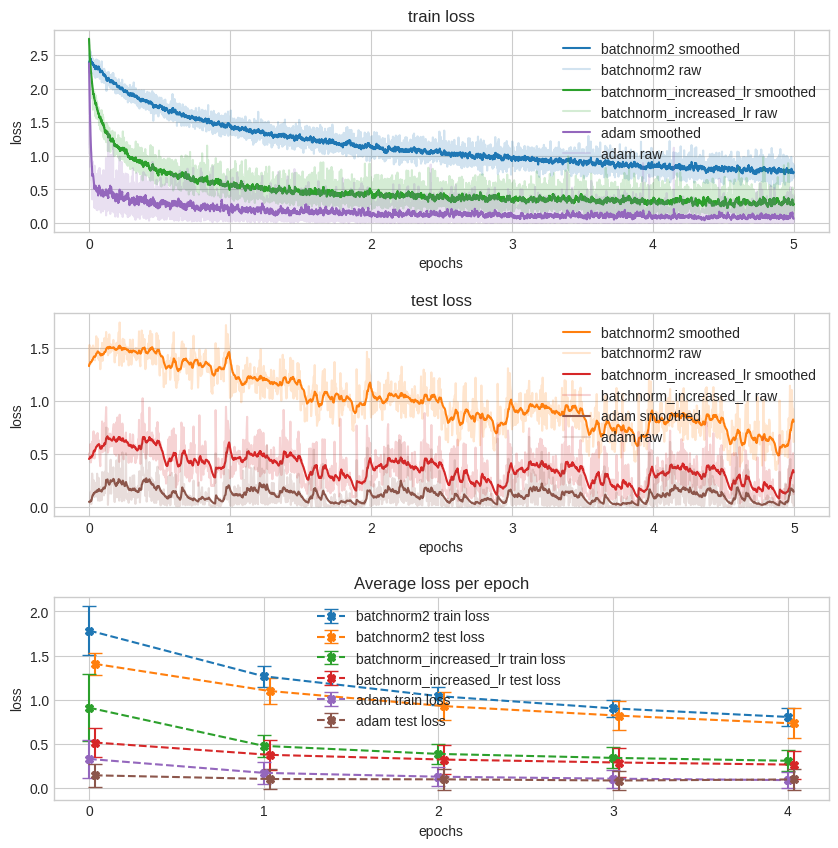

In [ ]:
history_plotter.add(history)
history_plotter.plot(["batchnorm2", "batchnorm_increased_lr", model_name])

### L2 vs Weight decay

–î–ª—è –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è L2 c –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä–æ–º –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ —É–∫–∞–∑–∞—Ç—å –∑–Ω–∞—á–µ–Ω–∏–µ `weight_decay`,  –≥–¥–µ `weight_decay` ‚Äî –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –ø–µ—Ä–µ–¥ L2.

In [ ]:
parameters = torch.randn(10, requires_grad=True)
optimizer = optim.RMSprop(model.parameters(), alpha=0.99, weight_decay=0.001)

–í–æ–æ–±—â–µ –≥–æ–≤–æ—Ä—è, **Weight decay** –∏ **L2** ‚Äî —ç—Ç–æ –Ω–µ–º–Ω–æ–≥–æ —Ä–∞–∑–Ω—ã–µ –≤–µ—â–∏.

**L2** –¥–æ–±–∞–≤–ª—è–µ—Ç —á–ª–µ–Ω —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏ –∫ Loss —Ñ—É–Ω–∫—Ü–∏–∏:

$$Loss_{L2} = Loss + \frac{Œª}{2n}w^2$$

**Weight decay** —É–º–µ–Ω—å—à–∞–µ—Ç –≤–µ—Å–∞:

$$w_{wd} = w - \frac{Œª}{n}w$$

–≥–¥–µ $Œª$ ‚Äî –∫–æ–Ω—Å—Ç–∞–Ω—Ç–∞, –∞ $n$ ‚Äî –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç–ª–µ–º–µ–Ω—Ç–æ–≤ –≤ –±–∞—Ç—á–µ.


–î–ª—è **SGD** –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä–∞ **Weight decay** –∏ **L2** **—ç–∫–≤–∏–≤–∞–ª–µ–Ω—Ç–Ω—ã**, –Ω–æ –Ω–µ –¥–ª—è –≤—Å–µ—Ö –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä–æ–≤ —ç—Ç–æ —Ç–∞–∫.

–ù–∞–ø—Ä–∏–º–µ—Ä, —ç—Ç–æ –Ω–µ —Ç–∞–∫ –¥–ª—è **Adam**. **L2** —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏—è –ø—Ä–∏–±–∞–≤–ª—è–µ—Ç—Å—è –∫ Loss —Ñ—É–Ω–∫—Ü–∏–∏ –∏ –∏–∑–º–µ–Ω—è–µ—Ç **–∑–Ω–∞—á–µ–Ω–∏–µ –≥—Ä–∞–¥–∏–µ–Ω—Ç–∞**, –∫–≤–∞–¥—Ä–∞—Ç—ã –∫–æ—Ç–æ—Ä–æ–≥–æ –±—É–¥—É—Ç —Ö—Ä–∞–Ω–∏—Ç—å—Å—è. **Weight decay** –∏–∑–º–µ–Ω—è–µ—Ç —Ç–æ–ª—å–∫–æ –≤–µ—Å–∞ (–ø–æ–¥—Ä–æ–±–Ω–æ –æ–± —ç—Ç–æ–º –º–æ–∂–Ω–æ –ø–æ—á–∏—Ç–∞—Ç—å [—Ç—É—Ç](https://arxiv.org/pdf/1711.05101.pdf)).

**–û–±—Ä–∞—Ç–∏—Ç–µ –≤–Ω–∏–º–∞–Ω–∏–µ**, —á—Ç–æ `weight_decay` –≤ `torch.optim.Adam` ‚Äî —ç—Ç–æ **–∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –ø–µ—Ä–µ–¥ L2**. **Weight decay** –¥–ª—è **Adam** —Ä–µ–∞–ª–∏–∑–æ–≤–∞–Ω–æ –≤
`torch.optim.AdamW`.

–°—á–∏—Ç–∞–µ—Ç—Å—è, —á—Ç–æ **Weight decay** –¥–ª—è **Adam** —Ä–∞–±–æ—Ç–∞–µ—Ç –ª—É—á—à–µ, —á–µ–º **L2**, –Ω–æ –Ω–∞ –ø—Ä–∞–∫—Ç–∏–∫–µ —ç—Ç–æ –Ω–µ –≤—Å–µ–≥–¥–∞ –≤—ã–ø–æ–ª–Ω—è–µ—Ç—Å—è.


### –î—Ä—É–≥–∏–µ –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä—ã (Lion)

–ù–µ Adam-–æ–º –µ–¥–∏–Ω—ã–º –∂–∏–≤—É—Ç –Ω–µ–π—Ä–æ–Ω–Ω—ã–µ —Å–µ—Ç–∏. –ï—Å—Ç—å –∞–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω—ã–µ –º–µ—Ç–æ–¥—ã –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏, –Ω–∞–ø—Ä–∏–º–µ—Ä, –ø—Ä–æ–µ–∫—Ç [Google Brain](https://research.google/teams/brain/) –≤ 2023 –≥–æ–¥—É –æ–ø—É–±–ª–∏–∫–æ–≤–∞–ª [—Å—Ç–∞—Ç—å—é](https://arxiv.org/pdf/2302.06675.pdf), –≤ –∫–æ—Ç–æ—Ä–æ–π –æ–ø–∏—Å—ã–≤–∞–µ—Ç –Ω–∞–π–¥–µ–Ω–Ω—ã–π –≤ –ø—Ä–æ—Ü–µ—Å—Å–µ [AutoML](https://arxiv.org/pdf/2101.08809.pdf) (–∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–æ–≥–æ –ø–æ–¥–±–æ—Ä–∞ –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä –∏ –∞–ª–≥–æ—Ä–∏—Ç–º–æ–≤) –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä, –Ω–∞–∑–≤–∞–Ω–Ω—ã–π **Lion**  (Evo**L**ved S**i**gn M**o**me**n**tum) ü¶Å.

In [ ]:
# –ª—É—á—à–µ —Ä–∞–±–æ—Ç–∞–µ—Ç –¥–ª—è –º–æ–¥–µ–ª–µ–π —Å –ø—Ä–æ–±–ª–µ–º–∞–º–∏ —Å–æ —Å—Ö–æ–¥–∏–º–æ—Å—Ç—å—é (—Ñ—É–Ω–∫—Ü–∏–∏ –∞–∫—Ç–∏–≤–∞—Ü–∏–∏ –∏–º–µ—é—Ç –Ω–µ–æ–≥—Ä–∞–Ω–∏—á–µ–Ω–Ω—ã–µ –ø—Ä–æ–∏–∑–≤–æ–¥–Ω—ã–µ)

–ò–Ω—Ç–µ—Ä–µ—Å–Ω–æ, —á—Ç–æ AutoML –∞–ª–≥–æ—Ä–∏—Ç–º –ø—Ä–∏—à–µ–ª –∫ –∏–Ω—Ç—É–∏—Ç–∏–≤–Ω–æ –ø–æ–Ω—è—Ç–Ω–æ–π —ç–≤—Ä–∏—Å—Ç–∏–∫–µ: –≥—Ä–∞–¥–∏–µ–Ω—Ç—ã ‚Äî –≤–µ—â—å –Ω–µ –æ—á–µ–Ω—å –Ω–∞–¥–µ–∂–Ω–∞—è. –û–Ω–∏ –º–æ–≥—É—Ç –≤–∑—Ä—ã–≤–∞—Ç—å—Å—è –∏ –∑–∞—Ç—É—Ö–∞—Ç—å. –ú–æ–∂–µ—Ç —Ç–æ–≥–¥–∞ –º—ã –∑–∞—Ñ–∏–∫—Å–∏—Ä—É–µ–º —Ä–∞–∑–º–µ—Ä —à–∞–≥–∞, –∞ –≥—Ä–∞–¥–∏–µ–Ω—Ç—ã –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —Ç–æ–ª—å–∫–æ –¥–ª—è –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏—è?

–î–ª—è –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏—è –∏—Å–ø–æ–ª—å–∑—É—é—Ç —Ñ—É–Ω–∫—Ü–∏—é $sign$ (–∑–Ω–∞–∫):

\begin{align}
\text{sign}(x) = \left\{
\begin{array}{cl}
1 & x > 0 \\
0 & x = 0\\
-1 & x < 0.
\end{array}
\right.
\end{align}


–ö —ç—Ç–æ–º—É –¥–æ–±–∞–≤–ª—è–µ—Ç—Å—è —É–∂–µ –∏–∑—É—á–µ–Ω–Ω—ã–π –Ω–∞–º–∏ momentum, —á—Ç–æ–±—ã –∑–Ω–∞–∫ ‚Äú–ø—Ä—ã–≥–∞–ª‚Äù —Ä–µ–∂–µ. –ò–Ω—Ç–µ—Ä–µ—Å–Ω–æ, —á—Ç–æ AutoML –ø–æ–¥–æ–±—Ä–∞–ª –∞–ª–≥–æ—Ä–∏—Ç–º, –≤ –∫–æ—Ç–æ—Ä–æ–º –∏—Å–ø–æ–ª—å–∑—É—é—Ç—Å—è –¥–≤–µ –∫–æ–Ω—Å—Ç–∞–Ω—Ç—ã –¥–ª—è momentum. $\beta_1$ ‚Äî –¥–ª—è –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Ç–µ–∫—É—â–µ–≥–æ –∑–Ω–∞–∫–∞ –≥—Ä–∞–¥–∏–µ–Ω—Ç–∞, $\beta_2$ ‚Äî –¥–ª—è —Ö—Ä–∞–Ω–µ–Ω–∏—è –∑–Ω–∞—á–µ–Ω–∏—è $v_t$. –ó–Ω–∞—á–µ–Ω–∏—è –ø–æ —É–º–æ–ª—á–∞–Ω–∏—é $\beta_1 = 0.9$, $\beta_2 = 0.99$. –≠—Ç–æ –∑–Ω–∞—á–∏—Ç, —á—Ç–æ —Ç–µ–∫—É—â–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –≥—Ä–∞–¥–∏–µ–Ω—Ç–∞ —Å–∏–ª—å–Ω–µ–µ –≤–ª–∏—è–µ—Ç –Ω–∞ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –≤—ã–±–æ—Ä–∞ –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏—è —Ç–µ–∫—É—â–µ–≥–æ —à–∞–≥–∞ $—Å_{t}$, —á–µ–º –Ω–∞ —Ö—Ä–∞–Ω–∏–º–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –º–æ–º–µ–Ω—Ç–∞ $v_t$.


–ó–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –≤—ã—á–∏—Å–ª–µ–Ω–∏—è –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏—è —Ç–µ–∫—É—â–µ–≥–æ —à–∞–≥–∞:

$$—Å_{t} = \beta_1 \cdot v_{t-1} + (1-\beta_1) \nabla_wL(x, y, w_{t})$$

–®–∞–≥ –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä–∞. $Œª$ ‚Äî –∫–æ–Ω—Å—Ç–∞–Ω—Ç–∞ weight decay:

$$w_{t+1} = w_t - lr \cdot (sign(c_t) +Œª w_t)$$

–û–±–Ω–æ–≤–ª–µ–Ω–∏–µ —Ö—Ä–∞–Ω–∏–º–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è –º–æ–º–µ–Ω—Ç–∞:

$$v_t = \beta_2 \cdot v_{t-1} + (1-\beta_2) \nabla_wL(x, y, w_{t})$$

–§—Ä–∞–≥–º–µ–Ω—Ç –∫–æ–¥–∞ –¥–ª—è –ø–æ–Ω–∏–º–∞–Ω–∏—è —Ä–∞–±–æ—Ç—ã **Lion**:

```
class Lion:
  def __init__(self, parameters, lr=0.0001, betas=(0.9, 0.99), weight_decay=0.01):
    self.parameters = parameters
    self.lr = lr
    self.betas = betas
    self.velocity = torch.zeros_like(parameters)
    self.beta_1 = betas[0] # momentum 1
    self.beta_2 = betas[1] # momentum 2
    self.weight_decay = weight_decay

  def step(self):
    d_parameters = self.parameters.grad
    # current momentum
    current = self.beta_1*self.velocity + (1 - self.beta_1)*d_parameters
    # step
    self.parameters -= self.lr*(torch.sign(carent)+self.weight_decay*self.parameters)
    # history momentum
    self.velocity = self.beta_2*self.velocity + (1 - self.beta_2)*d_parameters
```

**Lion —É–¥–≤–∞–∏–≤–∞–µ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ö—Ä–∞–Ω–∏–º—ã—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤**

–û–±—Ä–∞—Ç–∏—Ç–µ –≤–Ω–∏–º–∞–Ω–∏–µ, —á—Ç–æ –∑–Ω–∞—á–µ–Ω–∏–µ lr –ø–æ —É–º–æ–ª—á–∞–Ω–∏—é —É **Lion** –≤—ã–±—Ä–∞–Ω–æ –º–µ–Ω—å—à–µ, —á–µ–º —É **Adam**. –≠—Ç–æ —Å–≤—è–∑–∞–Ω–æ —Å —Ç–µ–º, —á—Ç–æ —Ç–æ–ª—å–∫–æ lr –∏ —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏—è –æ–ø—Ä–µ–¥–µ–ª—è—é—Ç —Ä–∞–∑–º–µ—Ä —à–∞–≥–∞. –ê–≤—Ç–æ—Ä—ã —Å—Ç–∞—Ç—å–∏ —Å–æ–≤–µ—Ç—É—é—Ç –±—Ä–∞—Ç—å –¥–ª—è **Lion** –≤ 10 —Ä–∞–∑ –º–µ–Ω—å—à–∏–π lr, —á–µ–º –¥–ª—è **Adam**.

–£ **Lion** –µ—Å—Ç—å –ø—Ä–µ–∏–º—É—â–µ—Å—Ç–≤–∞ –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å **Adam** –∏ **AdamW**: –≤ –Ω–µ–º –Ω–µ—Ç –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ—Å—Ç–∏ —Ö—Ä–∞–Ω–∏—Ç—å –∫–≤–∞–¥—Ä–∞—Ç—ã –≥—Ä–∞–¥–∏–µ–Ω—Ç–æ–≤. –û–Ω –ø–æ–∑–≤–æ–ª—è–µ—Ç **—Å–Ω–∏–∑–∏—Ç—å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ö—Ä–∞–Ω–∏–º—ã—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤** –≤ 1.5‚Äì2 —Ä–∞–∑–∞ –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å **AdamW**, –∞ —Ç–∞–∫–∂–µ —Å–æ–∫—Ä–∞—â–∞–µ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–ø–µ—Ä–∞—Ü–∏–π, —á—Ç–æ –ø–æ–∑–≤–æ–ª—è–µ—Ç [—É—Å–∫–æ—Ä–∏—Ç—å —Ä–∞—Å—á–µ—Ç—ã –Ω–∞ 2‚Äì15% üéì[arxiv]](https://arxiv.org/pdf/2302.06675.pdf) (–≤ Colab —ç—Ç–æ –Ω–µ –∑–∞–º–µ—Ç–Ω–æ –∏–∑-–∑–∞ —Å–ø–µ—Ü–∏—Ñ–∏–∫–∏, —Å–≤—è–∑–∞–Ω–Ω–æ–π —Å –≤–∏—Ä—Ç—É–∞–ª—å–Ω—ã–º–∏ –º–∞—à–∏–Ω–∞–º–∏).

–ö—Ä–æ–º–µ —Ç–æ–≥–æ, **Lion** [–ø–æ–∑–≤–æ–ª—è–µ—Ç –¥–æ–±–∏—Ç—å—Å—è –ª—É—á—à–∏—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤](https://github.com/google/automl/tree/master/lion), —á–µ–º AdamW, –ø—Ä–∏ –æ–±—É—á–µ–Ω–∏–∏ –±–æ–ª—å—à–∏—Ö —Å–ª–æ–∂–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π, —Ç–∞–∫–∏—Ö –∫–∞–∫ Visual Transformer-—ã –∏ –¥–∏—Ñ—Ñ—É–∑–∏–æ–Ω–Ω—ã–µ –º–æ–¥–µ–ª–∏.

–ù–æ –¥–æ —Å–ª–æ–∂–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π –º—ã –ø–æ–∫–∞ –Ω–µ –¥–æ–±—Ä–∞–ª–∏—Å—å, –ø–æ–ø—Ä–æ–±—É–µ–º –ø—Ä–æ—Å—Ç—É—é. –í–æ—Å–ø–æ–ª—å–∑—É–µ–º—Å—è —Ä–µ–∞–ª–∏–∑–∞—Ü–∏–µ–π [lion-pytorch](https://github.com/lucidrains/lion-pytorch)

In [ ]:
!pip install -q lion-pytorch

In [ ]:
from lion_pytorch import Lion

model = SimpleMNIST_NN_Init_Batchnorm(n_layers=3).to(device)
optimizer = Lion(model.parameters(), lr=1e-3, weight_decay=1e-3)

model_name = "lion"
history = train_model_sep(model, optimizer, model_name="lion", num_epochs=5)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 5/5 [03:04<00:00, 36.83s/it]


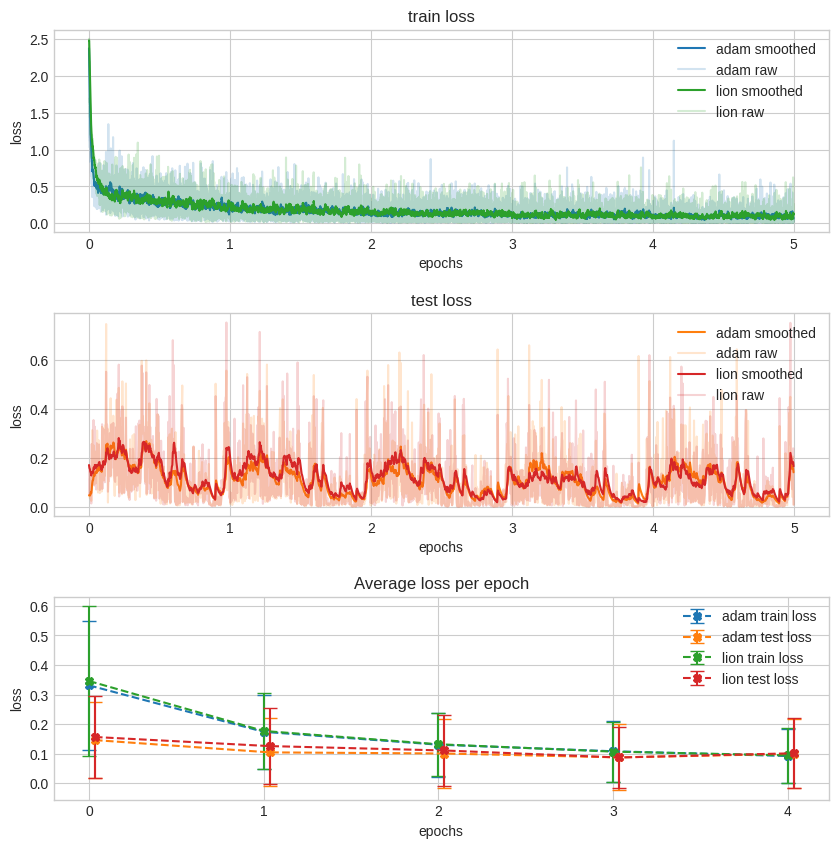

In [ ]:
history_plotter.add(history)
history_plotter.plot(["adam", model_name])

–†–µ–∑—É–ª—å—Ç–∞—Ç –ø–æ–ª—É—á–∏–ª—Å—è –ø–æ—á—Ç–∏ –∫–∞–∫ —É **Adam**, —á–∏—Å–ª–æ —Ö—Ä–∞–Ω–∏–º—ã—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –º–µ–Ω—å—à–µ.



## –õ–∞–Ω–¥—à–∞—Ñ—Ç —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å


–°—É—â–µ—Å—Ç–≤—É–µ—Ç [–∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–µ](https://proceedings.neurips.cc/paper/2018/file/be3087e74e9100d4bc4c6268cdbe8456-Paper.pdf), –∫–æ—Ç–æ—Ä–æ–µ –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç, —á—Ç–æ –ª–∞–Ω–¥—à–∞—Ñ—Ç —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è–µ—Ç —Å–æ–±–æ–π –Ω–µ–∏–∑–æ–ª–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –ª–æ–∫–∞–ª—å–Ω—ã–µ –º–∏–Ω–∏–º—É–º—ã (—Ä–∏—Å—É–Ω–æ–∫ —Å–ª–µ–≤–∞), –∞ —Å–≤—è–∑–∞–Ω–Ω—ã–µ –æ–±–ª–∞—Å—Ç–∏ —Å –ø–æ—á—Ç–∏ –ø–æ—Å—Ç–æ—è–Ω–Ω—ã–º –∑–Ω–∞—á–µ–Ω–∏–µ–º (—Ä–∏—Å—É–Ω–æ–∫ —Å–ø—Ä–∞–≤–∞). –ü–æ—ç—Ç–æ–º—É —É–º–µ–Ω–∏–µ ‚Äú–≤—ã–±–∏—Ä–∞—Ç—å—Å—è‚Äù –∏–∑ —Å–µ–¥–ª–æ–≤—ã—Ö —Ç–æ—á–µ–∫ –≤–∞–∂–Ω–æ.

<center><img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/L07/loss_surfaces.png" width="900"></center>

<center><em>Source: <a href="https://proceedings.neurips.cc/paper/2018/file/be3087e74e9100d4bc4c6268cdbe8456-Paper.pdf">Loss Surfaces, Mode Connectivity, and Fast Ensembling of DNNs</a></em></center>

## –°—Ä–∞–≤–Ω–µ–Ω–∏–µ –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä–æ–≤

–£ –∫–∞–∂–¥–æ–≥–æ –∏–∑ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–Ω—ã—Ö –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä–æ–≤ –µ—Å—Ç—å –º–∏–Ω—É—Å—ã –∏ –ø–ª—é—Å—ã

- –ú–µ—Ç–æ–¥—ã —Å –∏–Ω–µ—Ä—Ü–∏–µ–π —Å—Ö–æ–¥—è—Ç—Å—è –∫ —Ä–µ—à–µ–Ω–∏—é –±–æ–ª–µ–µ –ø–ª–∞–≤–Ω–æ, –Ω–æ –º–æ–≥—É—Ç "–ø–µ—Ä–µ–ª–µ—Ç–∞—Ç—å"

<img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/L07/convergence_optimizers.gif" width="250">

<em>Source: <a href="https://imgur.com/a/Hqolp">Visualizing Optimization Algos</a></em>



* –ú–µ—Ç–æ–¥—ã —Å –∞–¥–∞–ø—Ç–∏–≤–Ω—ã–º learning rate –±—ã—Å—Ç—Ä–µ–µ —Å—Ö–æ–¥—è—Ç—Å—è, –±–æ–ª–µ–µ —Å—Ç–∞–±–∏–ª—å–Ω—ã –∏ –º–µ–Ω—å—à–µ —Å–ª—É—á–∞–π–Ω–æ –±–ª—É–∂–¥–∞—é—Ç

<img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/L07/methods_with_adaptive_learning_rate.gif" width="250">

<em>Source: <a href="https://imgur.com/a/Hqolp">Visualizing Optimization Algos</a></em>


* –ê–ª–≥–æ—Ä–∏—Ç–º—ã –±–µ–∑ –∞–¥–∞–ø—Ç–∏–≤–Ω–æ–≥–æ learning rate —Å–ª–æ–∂–Ω–µ–µ –≤—ã–±–∏—Ä–∞—é—Ç—Å—è –∏–∑ –ª–æ–∫–∞–ª—å–Ω—ã—Ö –º–∏–Ω–∏–º—É–º–æ–≤

<img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/L07/methods_without_adaptive_learning_rate.gif" width="450">

<em>Source: <a href="https://imgur.com/a/Hqolp">Visualizing Optimization Algos</a></em>

* –ê–ª–≥–æ—Ä–∏—Ç–º—ã —Å –∏–Ω–µ—Ä—Ü–∏–µ–π –æ—Å—Ü–∏–ª–∏—Ä—É—é—Ç –≤ —Å–µ–¥–ª–æ–≤—ã—Ö —Ç–æ—á–∫–∞—Ö –ø—Ä–µ–∂–¥–µ, —á–µ–º –Ω–∞—Ö–æ–¥—è—Ç –≤–µ—Ä–Ω—ã–π –ø—É—Ç—å

<img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/L07/methods_with_momentum_in_saddle_point.gif" width="450">

<em>Source: <a href="https://imgur.com/a/Hqolp">Visualizing Optimization Algos</a></em>


# –†–µ–∂–∏–º—ã –æ–±—É—á–µ–Ω–∏—è

–ù–∞–º –Ω–µ –æ–±—è–∑–∞—Ç–µ–ª—å–Ω–æ –ø–æ–¥–¥–µ—Ä–∂–∏–≤–∞—Ç—å –æ–¥–∏–Ω –∏ —Ç–æ—Ç –∂–µ `learning rate` –≤ —Ç–µ—á–µ–Ω–∏–µ –≤—Å–µ–≥–æ –æ–±—É—á–µ–Ω–∏—è. –ë–æ–ª–µ–µ —Ç–æ–≥–æ, –¥–ª—è —Ç–æ–≥–æ –∂–µ SGD –µ—Å—Ç—å –≥–∞—Ä–∞–Ω—Ç–∏–∏, —á—Ç–æ –µ—Å–ª–∏ –ø—Ä–∞–≤–∏–ª—å–Ω–æ –ø–æ–¥–æ–±—Ä–∞—Ç—å —Å—Ö–µ–º—É —É–º–µ–Ω—å—à–µ–Ω–∏—è `learning rate`, –æ–Ω —Å–æ–π–¥–µ—Ç—Å—è –∫ –≥–ª–æ–±–∞–ª—å–Ω–æ–º—É –æ–ø—Ç–∏–º—É–º—É.

–ú—ã –º–æ–∂–µ–º –º–µ–Ω—è—Ç—å `learning rate` –ø–æ –Ω–µ–∫–æ—Ç–æ—Ä—ã–º –ø—Ä–∞–≤–∏–ª–∞–º.

## –†–∞–Ω–Ω—è—è –æ—Å—Ç–∞–Ω–æ–≤–∫–∞

–ú–æ–∂–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –∫—Ä–∏—Ç–µ—Ä–∏–π —Ä–∞–Ω–Ω–µ–π –æ—Å—Ç–∞–Ω–æ–≤–∫–∏: –∫–æ–≥–¥–∞ –∑–Ω–∞—á–µ–Ω–∏–µ —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ –Ω–µ —É–ª—É—á—à–∞–µ—Ç—Å—è –∫–∞–∫–æ–µ-—Ç–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç–ø–æ—Ö(`patience`), —É–º–Ω–æ–∂–∞–µ–º `learning rate` –Ω–∞ –Ω–µ–∫–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ `factor`).

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L07/out/early_stopping.png" width="500">

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.1)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, "min", factor=0.1, patience=5
)

–ü—Ä–∏–º–µ–Ω–∏–º –∫ –Ω–∞—à–µ–π –º–æ–¥–µ–ª–∏

(–≤—ã–ø–æ–ª–Ω–µ–Ω–∏–µ –∑–∞–Ω–∏–º–∞–µ—Ç ~ 5 –º–∏–Ω—É—Ç)

In [ ]:
def train_model_sep_scheduler(
    model, optimizer, scheduler, model_name=None, num_epochs=5
):
    criterion = nn.CrossEntropyLoss().to(device)

    train_history = {}
    train_history["model_name"] = model_name
    train_history["epo—Åhs"] = num_epochs
    train_history["loss_on_train"] = []
    train_history["loss_on_test"] = []

    for epoch in tqdm(range(num_epochs)):
        model.train()
        loss_on_train = train_epoch(model, optimizer, criterion, train_loader)
        model.eval()
        val_loss, loss_on_test = validate(model, criterion, test_loader)
        train_history["loss_on_train"].extend(loss_on_train)
        train_history["loss_on_test"].extend(loss_on_test)
        scheduler.step(val_loss)
    return train_history

In [ ]:
model = SimpleMNIST_NN_Init_Batchnorm(n_layers=3).to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-2)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, "min", factor=0.1, patience=1
)

model_name = "reduce_lr_on_plateu"
hooks_data_history = register_model_hooks(model)
history = train_model_sep_scheduler(
    model, optimizer, scheduler, model_name=model_name, num_epochs=5
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 5/5 [02:46<00:00, 33.27s/it]


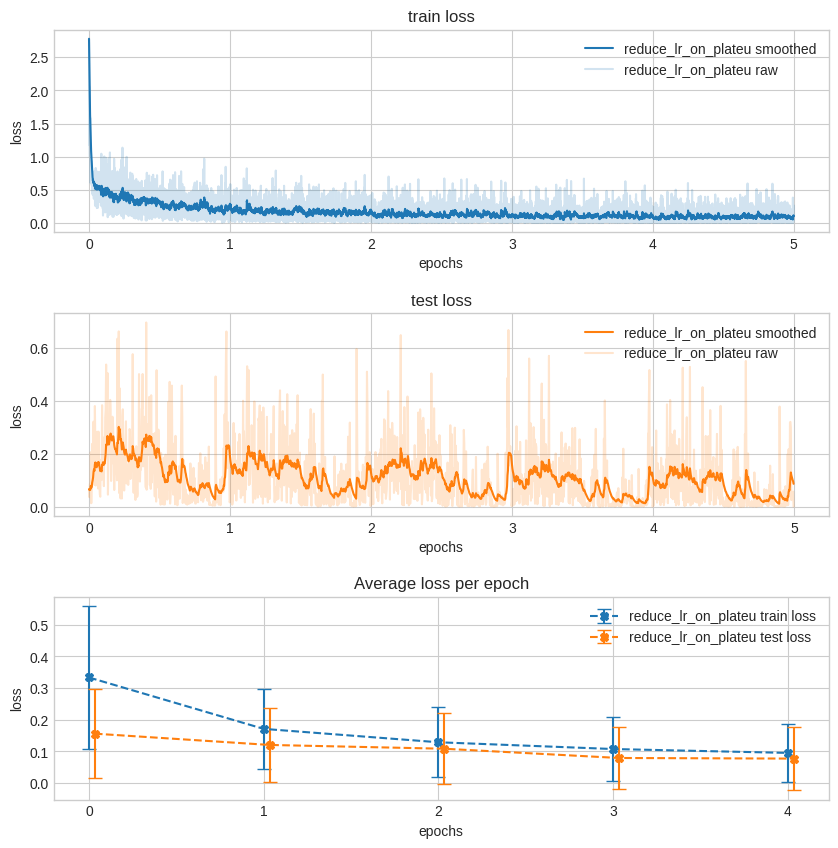

In [ ]:
history_plotter.add(history)
history_plotter.plot([model_name])

## –ü–æ–Ω–∏–∂–µ–Ω–∏–µ —à–∞–≥–∞ –æ–±—É—á–µ–Ω–∏—è –Ω–∞ –∫–∞–∂–¥–æ–π —ç–ø–æ—Ö–µ

–î–æ–º–Ω–æ–∂–∞—Ç—å `learning rate` –Ω–∞ `gamma` –∫–∞–∂–¥—É—é —ç–ø–æ—Ö—É

In [ ]:
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.1)

## Neural Network WarmUp

–î–ª—è –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –±–æ–ª—å—à–∏—Ö –Ω–µ–π—Ä–æ–Ω–Ω—ã—Ö —Å–µ—Ç–µ–π –ø—Ä–∞–∫—Ç–∏–∫—É—é—Ç —Å–ª–µ–¥—É—é—â—É—é —Å—Ö–µ–º—É (**gradual warmup**, [–∏–∑–Ω–∞—á–∞–ª—å–Ω–∞—è —Å—Ç–∞—Ç—å—è](https://arxiv.org/pdf/1706.02677.pdf)):

1. –ü–æ—Å—Ç–∞–≤–∏—Ç—å –∏–∑–Ω–∞—á–∞–ª—å–Ω—ã–π `learning rate` –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –Ω–∏–∂–µ —Ç–æ–≥–æ, —Å –∫–æ—Ç–æ—Ä–æ–≥–æ –º—ã –æ–±—ã—á–Ω–æ –Ω–∞—á–∏–Ω–∞–µ–º –æ–±—É—á–µ–Ω–∏–µ.
2. –ó–∞ –Ω–µ—Å–∫–æ–ª—å–∫–æ —ç–ø–æ—Ö, –Ω–∞–ø—Ä–∏–º–µ—Ä, 5, –¥–æ–≤–µ—Å—Ç–∏ `learning rate` –æ—Ç —ç—Ç–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è –¥–æ —Ç—Ä–µ–±—É–µ–º–æ–≥–æ. –¢–∞–∫ –º—ã –Ω–µ —Å–æ–≤–µ—Ä—à–∞–µ–º –±–æ–ª—å—à–∏—Ö —à–∞–≥–æ–≤, –∫–æ–≥–¥–∞ —Å–µ—Ç—å –µ—â–µ –Ω–∏—á–µ–≥–æ –Ω–µ –∑–Ω–∞–µ—Ç –æ –¥–∞–Ω–Ω—ã—Ö. –ó–∞ —Å—á–µ—Ç —ç—Ç–æ–≥–æ –Ω–µ–π—Ä–æ—Å–µ—Ç—å –ª—É—á—à–µ "–∞–¥–∞–ø—Ç–∏—Ä—É–µ—Ç—Å—è" –∫ –Ω–∞—à–∏–º –¥–∞–Ω–Ω—ã–º.

–¢–∞–∫–∂–µ —Ç–∞–∫–æ–π `learning schedule` –ø–æ–∑–≤–æ–ª—è–µ—Ç –∞–¥–∞–ø—Ç–∏–≤–Ω—ã–º –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä–∞–º –ª—É—á—à–µ –æ—Ü–µ–Ω–∏—Ç—å –∑–Ω–∞—á–µ–Ω–∏—è `learning rate` –¥–ª—è —Ä–∞–∑–Ω—ã—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤

In [ ]:
# –ø–æ –∞–Ω–∞–ª–æ–≥–∏–∏ —Å –ø—Ä–æ–≥—Ä–µ–≤–æ–º –º–∞—à–∏–Ω—ã –∑–∏–º–æ–π - –≤ —Ç–µ—á–µ–Ω–∏–µ –ø–µ—Ä–≤—ã—Ö –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö –±–∞—á–µ–π –¥–∞–≤–∞—Ç—å lr —Å –Ω—É–ª—è –¥–æ 10-3, –∞ –ø–æ—Ç–æ–º —É–∂–µ –ø–æ–Ω–∏–∂–∞—Ç—å

<center><img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/L07/neural_network_warmup.png" width="1000"></center>

<center><em>Source: <a href="https://arxiv.org/pdf/1706.02677.pdf">Accurate, Large Minibatch SGD: Training ImageNet in 1 Hour</a></em></center>


$kn$ –Ω–∞ –∫–∞—Ä—Ç–∏–Ω–∫–µ ‚Äî —ç—Ç–æ —Ä–∞–∑–º–µ—Ä –æ–¥–Ω–æ–≥–æ –±–∞—Ç—á–∞.

## Cyclical learning schedule


–°—Ç–∞—Ç—å—è: [Cyclical Learning Rates for Training Neural Networks üéì[arxiv]](https://arxiv.org/pdf/1506.01186.pdf)

**–ò–¥–µ—è:**
–§—É–Ω–∫—Ü–∏—è –ø–æ—Ç–µ—Ä—å –º–æ–∂–µ—Ç –∏–º–µ—Ç—å —Å–ª–æ–∂–Ω—ã–π –ª–∞–Ω–¥—à–∞—Ñ—Ç. –ù–∞–º –±—ã —Ö–æ—Ç–µ–ª–æ—Å—å:
* –ò–∑—É—á–∏—Ç—å –ø–æ–±–æ–ª—å—à–µ –ª–æ–∫–∞–ª—å–Ω—ã—Ö –º–∏–Ω–∏–º—É–º–æ–≤.
* –û—Ü–µ–Ω–∏—Ç—å –∫–∞—á–µ—Å—Ç–≤–æ –≤ –∫–∞–∂–¥–æ–º –ª–æ–∫–∞–ª—å–Ω–æ–º –º–∏–Ω–∏–º—É–º–µ.


<center><img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/L07/Cyclic_LR_Schedule.png" width="750"></center>

<center><em>Source: <a href="https://openreview.net/pdf?id=BJYwwY9ll">Snapshot Ensembles: train 1, get M for free</a></em></center>

–î–ª—è —ç—Ç–æ–≥–æ –º—ã –º–æ–∂–µ–º –Ω–µ –≤—Å–µ –≤—Ä–µ–º—è –ø–æ–Ω–∏–∂–∞—Ç—å learning rate, –∞ –¥–µ–ª–∞—Ç—å —ç—Ç–æ **—Ü–∏–∫–ª–∏—á–µ—Å–∫–∏**: —Ç–æ –ø–æ–Ω–∏–∂–∞—Ç—å, —Ç–æ –ø–æ–≤—ã—à–∞—Ç—å.

–ü—Ä–∏ **—É–≤–µ–ª–∏—á–µ–Ω–∏–∏** learning rate –º–æ–¥–µ–ª—å –º–æ–∂–µ—Ç **–≤—ã–±—Ä–∞—Ç—å—Å—è** –∏–∑ –æ–¥–Ω–æ–≥–æ –ª–æ–∫–∞–ª—å–Ω–æ–≥–æ –º–∏–Ω–∏–º—É–º–∞. –ü—Ä–∏ **—É–º–µ–Ω—å—à–µ–Ω–∏–∏** ‚Äî **—Å–æ–π—Ç–∏—Å—å** –∫ —Å–ª–µ–¥—É—é—â–µ–º—É.


–ï—Å—Ç—å –¥–≤–µ –æ—Å–Ω–æ–≤–Ω—ã–µ –º–æ—Ç–∏–≤–∞—Ü–∏–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è **—Ü–∏–∫–ª–∏—á–µ—Å–∫–æ–≥–æ learning rate**:

* **–£—Å–∫–æ—Ä–µ–Ω–∏–µ —Å—Ö–æ–¥–∏–º–æ—Å—Ç–∏**: –º—ã —É–∂–µ –ø–æ—Å–º–æ—Ç—Ä–µ–ª–∏ –Ω–∞ –∞–¥–∞–ø—Ç–∏–≤–Ω—ã–µ –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä—ã. –ò—Ö –Ω–µ–¥–æ—Å—Ç–∞—Ç–∫–æ–º —è–≤–ª—è–µ—Ç—Å—è –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ—Å—Ç—å —Ö—Ä–∞–Ω–µ–Ω–∏—è –≤ –ø–∞–º—è—Ç–∏ –∫–≤–∞–¥—Ä–∞—Ç–æ–≤ –≥—Ä–∞–¥–∏–µ–Ω—Ç–æ–≤. –î–ª—è —Ü–∏–∫–ª–∏—á–µ—Å–∫–æ–≥–æ learning rate —ç—Ç–æ –Ω–µ–æ–±—è–∑–∞—Ç–µ–ª—å–Ω–æ, –µ–≥–æ –º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —Å SGD, –∏–∑–º–µ–Ω—è—è —Å–∫–æ—Ä–æ—Å—Ç–∏ –≤ 3‚Äì4 —Ä–∞–∑–∞. –ê–Ω–∞–ª–æ–≥–∏—á–Ω–æ —Å Adam ‚Äî —ç—Ç–æ –ø–æ–∑–≤–æ–ª–∏—Ç —Ä–µ–¥–∫–∏–º –ø—Ä–∏–∑–Ω–∞–∫–∞–º –±—ã—Å—Ç—Ä–µ–µ –æ–±—É—á–∞—Ç—å—Å—è (—á–∞—Å—Ç—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –±—É–¥—É—Ç –Ω–µ–º–Ω–æ–≥–æ ‚Äú–ª–æ–º–∞—Ç—å—Å—è‚Äù, –∞ –∑–∞—Ç–µ–º –≤–æ—Å—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞—Ç—å—Å—è). –î–ª—è —Ç–∞–∫–∏—Ö —Ü–µ–ª–µ–π –≤–∞–∂–Ω–æ –ø–æ–¥–±–∏—Ä–∞—Ç—å learning rate –≤–±–ª–∏–∑–∏ –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–≥–æ. –ò–¥–µ—è —ç—Ç–æ–≥–æ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∞ –≤ [—Å—Ç–∞—Ç—å–µ](https://arxiv.org/pdf/1506.01186.pdf).

* **–°–æ–∑–¥–∞–Ω–∏–µ –∞–Ω—Å–∞–º–±–ª–µ–π –º–æ–¥–µ–ª–µ–π:** —Ä–∞–∑–Ω—ã–µ –ª–æ–∫–∞–ª—å–Ω—ã–µ –º–∏–Ω–∏–º—É–º—ã –±—É–¥—É—Ç –¥–∞–≤–∞—Ç—å –æ—à–∏–±–∫–∏ –Ω–∞ —Ä–∞–∑–Ω—ã—Ö –æ–±—ä–µ–∫—Ç–∞—Ö. –ú–æ–∂–Ω–æ —Å–æ—Ö—Ä–∞–Ω—è—Ç—å –º–æ–¥–µ–ª–∏ –≤ –ª–æ–∫–∞–ª—å–Ω—ã—Ö –º–∏–Ω–∏–º—É–º–∞—Ö –∏ –Ω–µ —Ç–æ–ª—å–∫–æ –∏—Å–∫–∞—Ç—å –ª—É—á—à—É—é, –Ω–æ –∏ —É—Å—Ç—Ä–∞–∏–≤–∞—Ç—å –º–µ–∂–¥—É –º–æ–¥–µ–ª—è–º–∏ –≥–æ–ª–æ—Å–æ–≤–∞–Ω–∏—è. –î–ª—è —ç—Ç–æ–≥–æ learning rate –∏–∑–º–µ–Ω—è—é—Ç –≤ —Å–æ—Ç–Ω–∏ —Ä–∞–∑. –ò–¥–µ—è —ç—Ç–æ–≥–æ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∞ –≤ [—Å—Ç–∞—Ç—å–µ](https://openreview.net/pdf?id=BJYwwY9ll). –û–±—ã—á–Ω–æ –¥–ª—è —Å–æ–∑–¥–∞–Ω–∏—è –∞–Ω—Å–∞–º–±–ª–µ–π –∏—Å–ø–æ–ª—å–∑—É—é—Ç [—Ü–∏–∫–ª–∏—á–µ—Å–∫–∏–π –æ—Ç–∂–∏–≥ üéì[arxiv]](https://arxiv.org/pdf/1608.03983.pdf).


 ### –£—Å–∫–æ—Ä–µ–Ω–∏–µ —Å—Ö–æ–¥–∏–º–æ—Å—Ç–∏

–î–æ–±–∞–≤–ª–µ–Ω–∏–µ ‚Äú–¥—Ä–æ–∂–∞–Ω–∏—è‚Äù –≤ learning rate [–ø—Ä–∏–¥—É–º–∞–Ω–æ](https://arxiv.org/pdf/1506.01186.pdf), –∫–∞–∫ –∞–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–∞ Adam, –ø–æ–∑–≤–æ–ª—è—é—â–∞—è –Ω–µ —Ö—Ä–∞–Ω–∏—Ç—å –∑–Ω–∞—á–µ–Ω–∏—è Momentum –∏ —Å—É–º–º –∫–≤–∞–¥—Ä–∞—Ç–æ–≤ –≥—Ä–∞–¥–∏–µ–Ω—Ç–æ–≤ –ø—Ä–∏ –¥–µ—Ñ–∏—Ü–∏—Ç–µ –≤—ã—á–∏—Å–ª–∏—Ç–µ–ª—å–Ω—ã—Ö –º–æ—â–Ω–æ—Å—Ç–µ–π. –ü–æ —Å—Ö–æ–¥–∏–º–æ—Å—Ç–∏ —ç—Ç–æ—Ç –º–µ—Ç–æ–¥ –ø–æ—á—Ç–∏ –≤—Å–µ–≥–¥–∞ —É—Å—Ç—É–ø–∞–µ—Ç Adam –∏ AdamW, –ø–æ—ç—Ç–æ–º—É —Ä–µ–¥–∫–æ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è. –†–µ–∞–ª–∏–∑–∞—Ü–∏—é –¥–∞–Ω–Ω–æ–π –∏–¥–µ–∏ –º–æ–∂–Ω–æ –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å –≤ –±–ª–æ–∫–Ω–æ—Ç–µ –ø–æ [—Å—Å—ã–ª–∫–µ](https://colab.research.google.com/drive/1DYfhoazJ9AGT0IFcBIybpM7wn3DEIoFm).

### –°–æ–∑–¥–∞–Ω–∏–µ –∞–Ω—Å–∞–º–±–ª–µ–π –º–æ–¥–µ–ª–µ–π

–î–ª—è —Å–æ–∑–¥–∞–Ω–∏—è –∞–Ω—Å–∞–º–±–ª–µ–π –º–æ–¥–µ–ª–µ–π learning rate —Ü–∏–∫–ª–∏—á–µ—Å–∫–∏ –∏–∑–º–µ–Ω—è—é—Ç –≤ —Å–æ—Ç–Ω–∏ —Ä–∞–∑ (–∞ –º–æ–∂–Ω–æ –∏ –¥–æ 0, –∫–∞–∫ –Ω–∏–∂–µ), –ø–æ—ç—Ç–æ–º—É –ø–æ–¥–±–æ—Ä –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è learning rate –Ω–µ –∫—Ä–∏—Ç–∏—á–µ–Ω. –í –∫–∞—á–µ—Å—Ç–≤–µ –ø—Ä–∞–≤–∏–ª–∞ –∏–∑–º–µ–Ω–µ–Ω–∏—è –∏—Å–ø–æ–ª—å–∑—É—é—Ç —Ü–∏–∫–ª–∏—á–µ—Å–∫–∏–π –æ—Ç–∂–∏–≥ (cosine annealing cycles):

$$lr(t) = \frac {lr_0}{2}(\cos(\frac{\pi\cdot mod(t-1, [T/M])}{[T/M]})+1)$$

–≥–¥–µ $lr_0$ ‚Äî –Ω–∞—á–∞–ª—å–Ω–∞—è —Å–∫–æ—Ä–æ—Å—Ç—å –æ–±—É—á–µ–Ω–∏—è, $T$ ‚Äî –æ–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏—Ç–µ—Ä–∞—Ü–∏–π, $M$ ‚Äî –æ–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –º–æ–¥–µ–ª–µ–π, $t$ ‚Äî —Ç–µ–∫—É—â–∞—è –∏—Ç–µ—Ä–∞—Ü–∏—è.

–í —Ñ–æ—Ä–º—É–ª—É –º–æ–∂–Ω–æ –¥–æ–±–∞–≤–∏—Ç—å –º–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ, –Ω–æ –º—ã —ç—Ç–æ –¥–µ–ª–∞—Ç—å –Ω–µ –±—É–¥–µ–º, —Ç.–∫. —ç—Ç–æ –Ω–µ –æ–±—è–∑–∞—Ç–µ–ª—å–Ω—ã–π –ø–∞—Ä–∞–º–µ—Ç—Ä.


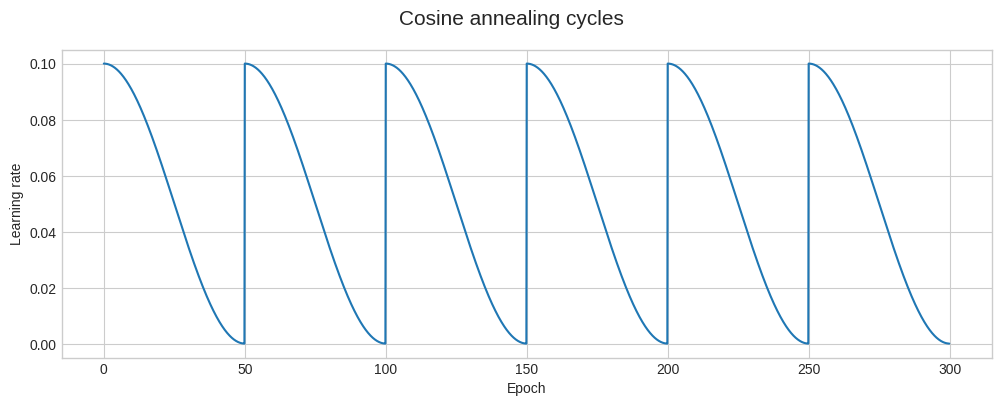

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# number of models (M in formula)
n_models = 6
# epoch per model
epoch = 50
# number of bats in dataset
len_dataset = 8

# total iteration number (T in formula)
total_iter = n_models * epoch * len_dataset

learning_rate_0 = 0.1

t = np.array(range(total_iter))
lr_t = (learning_rate_0 / 2) * (
    np.cos(np.pi * np.mod(t, total_iter / n_models) / (total_iter / n_models)) + 1
)

fig, ax = plt.subplots(figsize=(12, 4))
fig.suptitle("Cosine annealing cycles", size=15)
ax.plot(t / len_dataset, lr_t)
ax.set(xlabel="Epoch", ylabel="Learning rate")
plt.show()

–í PyTorch —Ü–∏–∫–ª–∏—á–µ—Å–∫–∏–π –æ—Ç–∂–∏–≥ —Ä–µ–∞–ª–∏–∑–æ–≤–∞–Ω –≤ –º–æ–¥—É–ª–µ `torch.optim.lr_scheduler.CosineAnnealingWarmRestarts`.

–û–±—â–µ–µ –ø—Ä–∞–≤–∏–ª–æ –ø–æ–¥–±–æ—Ä–∞ —Å–∫–æ—Ä–æ—Å—Ç–∏ –æ–±—É—á–µ–Ω–∏—è $lr_0$ ‚Äî –æ–Ω–∞ –¥–æ–ª–∂–Ω–∞ –±—ã—Ç—å –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –±–æ–ª—å—à–æ–π, —á—Ç–æ–±—ã ‚Äú–ª–æ–º–∞—Ç—å‚Äù –æ–±—É—á–µ–Ω–Ω—É—é –º–æ–¥–µ–ª—å, –ø—Ä–∏ —ç—Ç–æ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç–ø–æ—Ö –¥–ª—è –æ–±—É—á–µ–Ω–∏—è –∫–∞–∂–¥–æ–π –º–æ–¥–µ–ª–∏ –¥–æ–ª–∂–Ω–æ –±—ã—Ç—å –¥–æ—Å—Ç–∞—Ç–æ—á–Ω—ã–º –¥–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è –ø—Ä–∏–ª–∏—á–Ω–æ–≥–æ –∫–∞—á–µ—Å—Ç–≤–∞. –í [—Å—Ç–∞—Ç—å–µ](https://openreview.net/pdf?id=BJYwwY9ll), –Ω–∞–ø—Ä–∏–º–µ—Ä, –∏—Å–ø–æ–ª—å–∑—É—é—Ç 50 —ç–ø–æ—Ö, –Ω–æ —ç—Ç–æ –∑–Ω–∞—á–µ–Ω–∏–µ –±—É–¥–µ—Ç –∑–∞–≤–∏—Å–µ—Ç—å –æ—Ç –º–æ–¥–µ–ª–∏.



In [ ]:
scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(
    optimizer, T_0=total_iter // n_models
)

Loss –ø—Ä–∏ –æ–±—É—á–µ–Ω–∏–∏ –±—É–¥–µ—Ç –≤—ã–≥–ª—è–¥–µ—Ç—å –ø—Ä–∏–º–µ—Ä–Ω–æ —Ç–∞–∫ (–∫—Ä–∞—Å–Ω–∞—è –ª–∏–Ω–∏—è):

<center><img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/L07/cosine_annealing_cycles.png" width="350"></center>

<center><em>Source: <a href="https://openreview.net/pdf?id=BJYwwY9ll">Snapshot Ensembles: train 1, get M for free</a></em></center>

–ú–æ–¥–µ–ª–∏ –≤ –∫–æ–Ω—Ü–µ —Ü–∏–∫–ª–∞ –æ—Ç–∂–∏–≥–∞ —Å–æ—Ö—Ä–∞–Ω—è—é—Ç—Å—è. –ú–æ–∂–Ω–æ –≤—ã–±—Ä–∞—Ç—å –ª—É—á—à—É—é –∏–ª–∏ –ø–æ—Å—Ç—Ä–æ–∏—Ç—å –∞–Ω—Å–∞–º–±–ª—å.


## Model soup

–í —Å—Ç–∞—Ç—å–µ [Model soups: averaging weights of multiple fine-tuned models improves accuracy without increasing inference time](https://arxiv.org/pdf/2203.05482.pdf) –±—ã–ª–∞ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–Ω–∞ –∏–¥–µ—è ‚Äú—Å—É–ø–∞ –º–æ–¥–µ–ª–µ–π‚Äù. –ò–¥–µ—è ‚Äú—Å—É–ø–∞‚Äù –æ—á–µ–Ω—å –ø—Ä–æ—Å—Ç–∞: **–æ–±—É—á–∏—Ç—å –Ω–µ—Å–∫–æ–ª—å–∫–æ –º–æ–¥–µ–ª–µ–π** (–¥–ª—è —ç—Ç–æ–≥–æ –º—ã –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å **—Ü–∏–∫–ª–∏—á–µ—Å–∫–∏–π –æ—Ç–∂–∏–≥**) –∏ **–∞–≥—Ä–µ–≥–∏—Ä–æ–≤–∞—Ç—å –≤–µ—Å–∞ –º–æ–¥–µ–ª–µ–π** –≤ –æ–¥–Ω—É –º–æ–¥–µ–ª—å.

–î–ª—è ‚Äú–ø—Ä–∏–≥–æ—Ç–æ–≤–ª–µ–Ω–∏—è —Å—É–ø–∞‚Äù –≤–æ–∑—å–º–µ–º –¥–∞—Ç–∞—Å–µ—Ç –Ω–µ–º–Ω–æ–≥–æ —Å–ª–æ–∂–Ω–µ–µ, —á–µ–º —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞–µ–º—ã–π –≤ –ª–µ–∫—Ü–∏–∏ MNIST, –∞ –∏–º–µ–Ω–Ω–æ CIFAR10.

In [ ]:
import random
import torch
import numpy as np


def set_random_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)


from torchvision import transforms, datasets
from torch.utils.data import DataLoader, random_split

set_random_seed(42)
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize(
        (0.4914, 0.4822, 0.4465),
        (0.247, 0.243, 0.261)
    )]
)

cifar = datasets.CIFAR10("CIFAR10", train=True, download=True, transform=transform)
cifar_test = datasets.CIFAR10("CIFAR10", train=False, download=True, transform=transform)

train_set, val_set = random_split(cifar, [40_000, 10_000])

train_loader = DataLoader(train_set, batch_size=128, shuffle=True, num_workers=2)
val_loader = DataLoader(val_set, batch_size=256, shuffle=False, num_workers=2)
test_loader = DataLoader(cifar_test, batch_size=256, shuffle=False, num_workers=2)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 170498071/170498071 [00:02<00:00, 73843574.21it/s]


Extracting CIFAR10/cifar-10-python.tar.gz to CIFAR10
Files already downloaded and verified


–ú–æ–¥–µ–ª—å —Å–æ–±–µ—Ä–µ–º —Å–∞–º—É—é –ø—Ä–æ—Å—Ç—É—é:

In [ ]:
import torch
import torch.nn as nn


class SimpleNet_CIFAR(nn.Module):
    def __init__(self):
        super().__init__()
        self.activation = nn.ReLU()
        self.conv1 = nn.Conv2d(3, 6, 3)
        self.pool = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(6, 16, 3)
        self.conv3 = nn.Conv2d(16, 32, 3)
        self.fc1 = nn.Linear(32*2*2, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):  # input [batch, 3, 32, 32]
        x = self.activation(self.pool(self.conv1(x)))
        x = self.activation(self.pool(self.conv2(x)))
        x = self.activation(self.pool(self.conv3(x)))
        x = self.activation(self.fc1(x.flatten(start_dim=1)))
        x = self.activation(self.fc2(x))
        x = self.fc3(x)
        return x

–î–ª—è –æ–±—É—á–µ–Ω–∏—è –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å `lightning`, –¥–ª—è —Ä–∞—Å—á–µ—Ç–∞ –º–µ—Ç—Ä–∏–∫ `torchmetrics` - —ç—Ç–æ —Å–¥–µ–ª–∞–µ—Ç –∫–æ–¥ –±–æ–ª–µ–µ —É–Ω–∏–≤–µ—Ä—Å–∞–ª—å–Ω—ã–º (–∫–æ–¥ –Ω–∏–∂–µ –º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –¥–ª—è –≤–∞—à–∏—Ö –º–æ–¥–µ–ª–µ–π —Å –º–∏–Ω–∏–º—É–º–æ–º –º–æ–¥–∏—Ñ–∏–∫–∞—Ü–∏–π).

In [ ]:
! pip install pytorch-lightning
! pip install tbparse
clear_output()

In [ ]:
import pytorch_lightning as pl
from torchmetrics.classification import Accuracy
from torchmetrics.aggregation import MeanMetric
from tbparse import SummaryReader

import matplotlib.pyplot as plt
from IPython.display import clear_output

–î–ª—è —á—Ç–µ–Ω–∏—è –ª–æ–≥–æ–≤ –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å `tbparse`:

In [ ]:
def visualization(log_dir):
    # visualization without TensorBoard for TensorBoard logs
    clear_output()
    reader = SummaryReader(log_dir)
    df = reader.scalars.drop_duplicates()

    uniq = set(df.tag.unique())
    uniq.remove('epoch')
    uniq = list(uniq)
    uniq.sort()

    i = 0
    ax_dict = {}
    for item in uniq:
        metric = item.split('_')[0]
        if metric not in ax_dict:
            ax_dict[metric] = i
            i += 1

    fig, axs = plt.subplots(len(ax_dict), 1, figsize=(12, 3.5*len(ax_dict)))
    for item in uniq:
        metric = item.split('_')[0]
        ax = axs[ax_dict[metric]]
        sub_df = df[df['tag'] == item]
        ax.plot(sub_df.step, sub_df.value, label=item)
        ax.set_ylabel(metric)
        ax.legend()
        ax.set_xlabel('iter')
    axs[-1].grid()
    plt.grid()
    plt.show()

–ï—Å—Ç—å [–Ω–µ—Å–∫–æ–ª—å–∫–æ –ø–æ–¥—Ö–æ–¥–æ–≤](https://arxiv.org/pdf/2203.05482.pdf) –∫ ‚Äú–ø—Ä–∏–≥–æ—Ç–æ–≤–ª–µ–Ω–∏—é —Å—É–ø–∞‚Äù –º—ã —Ä–∞—Å—Å–º–æ—Ç—Ä–∏–º –¥–≤–∞:

**Uniform soup** (—Ä–∞–≤–Ω–æ–º–µ—Ä–Ω—ã–π —Å—É–ø) - –≤–µ—Å–∞ –≤—Å–µ—Ö –º–æ–¥–µ–ª–µ–π —Å—É–º–º–∏—Ä—É—é—Ç—Å—è —Å –æ–¥–∏–Ω–∞–∫–æ–≤—ã–º –≤–µ—Å–æ–º:
$$\text{Model} = f(x, \frac{1}{k}\sum_{i=1}^{k}œ¥_i)$$

**Greedy soup** (–∂–∞–¥–Ω—ã–π —Å—É–ø):
1. –ú–æ–¥–µ–ª–∏ —Å–æ—Ä—Ç–∏—Ä—É—é—Ç—Å—è –ø–æ —É–±—ã–≤–∞–Ω–∏—é –ø–æ –∫–∞—á–µ—Å—Ç–≤—É –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π (–Ω–µ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π!!!) –≤—ã–±–æ—Ä–∫–µ.
2. –õ—É—á—à–∞—è –º–æ–¥–µ–ª—å —Å—Ç–∞–Ω–æ–≤–∏—Ç—å—Å—è –ø–µ—Ä–≤—ã–º ‚Äú–∏–Ω–≥—Ä–µ–¥–∏–µ–Ω—Ç–æ–º‚Äù —Å—É–ø–∞. –¢–µ–∫—É—â–µ–µ –∫–∞—á–µ—Å—Ç–≤–æ ‚Äú—Å—É–ø–∞‚Äù –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç—Å—è –ø–æ –∑–Ω–∞—á–µ–Ω–∏—é –º–µ—Ç—Ä–∏–∫–∏ –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏ –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π (–Ω–µ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π!!!) –≤—ã–±–æ—Ä–∫–µ.
3. –û—Å—Ç–∞–ª—å–Ω—ã–µ –æ—Ç—Å–æ—Ä—Ç–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –º–æ–¥–µ–ª–∏ –ø–æ –æ—á–µ—Ä–µ–¥–∏ –¥–æ–±–∞–≤–ª—è—é—Ç—Å—è –≤ —Å—É–ø. –ö–∞—á–µ—Å—Ç–≤–æ –Ω–æ–≤–æ–π –º–æ–¥–µ–ª–∏ –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç—Å—è –ø–æ –∑–Ω–∞—á–µ–Ω–∏—é –º–µ—Ç—Ä–∏–∫–∏ –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π (–Ω–µ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π!!!) –≤—ã–±–æ—Ä–∫–µ. –ï—Å–ª–∏ –∑–Ω–∞—á–µ–Ω–∏–µ –º–µ—Ç—Ä–∏–∫–∏ –Ω–æ–≤–æ–π –º–æ–¥–µ–ª–∏ –ª—É—á—à–µ —Ç–µ–∫—É—â–µ–≥–æ –∫–∞—á–µ—Å—Ç–≤–∞ —Å—É–ø–∞, —Ç–æ –º–æ–¥–µ–ª—å –¥–æ–±–∞–≤–ª—è–µ—Ç—Å—è –≤ ‚Äú—Å—É–ø‚Äù, –∞ —Ç–µ–∫—É—â–∞—è –º–µ—Ç—Ä–∏–∫–∞ –æ–±–Ω–æ–≤–ª—è–µ—Ç—Å—è.

–ö–∞—á–µ—Å—Ç–≤–æ ‚Äú—Å—É–ø–∞‚Äù –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç—Å—è –ø–æ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ.

–ö–æ–¥ –¥–ª—è –º–µ—Ç–æ–¥–æ–≤ —Ä–µ–∞–ª–∏–∑–æ–≤–∞–Ω –Ω–∏–∂–µ. –î–ª—è –æ–±—É—á–µ–Ω–∏—è –æ—Ç–¥–µ–ª—å–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è —Ü–∏–∫–ª–∏—á–µ—Å–∫–∏–π –æ—Ç–∂–∏–≥.

In [ ]:
# –∞–¥–∞–º - —É–Ω–∏–≤–µ—Ä—Å–∞–ª—å–Ω—ã–π –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä, –µ–≥–æ –º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –ø–æ—Å—Ç–∏ –≤–µ–∑–¥–µ

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class MakeSoup(pl.LightningModule):
    def __init__(self, model, num_class, n_cycle_iter, cycle_epochs, show=True,
                 path="/content/log/model_weight/"):
        super().__init__()
        self.cycle_epochs = cycle_epochs
        self.num_class = num_class
        self.n_cycle_iter = n_cycle_iter
        self.model = model
        self.show = show
        self.path = path

        self.criterion = torch.nn.CrossEntropyLoss()

        self.loss_train = MeanMetric()
        self.loss = MeanMetric()

        # set metrics
        self.metric_train = Accuracy(num_classes=num_class, task='multiclass')
        self.metric = Accuracy(num_classes=num_class, task='multiclass')

        self.models_dir = []

    def configure_optimizers(self):
        # set optimizer
        optimizer = torch.optim.AdamW(
            self.model.parameters(), lr=0.01,
        )
        scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(
            optimizer,
            T_0=self.n_cycle_iter,
            eta_min=0,
        )
        return {
            "optimizer": optimizer,
            "lr_scheduler": {
                'scheduler': scheduler,
                'interval': 'step', # or 'epoch'
                'frequency': 1,
            }
        }

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self.model(x)
        loss = self.criterion(y_hat, y)

        self.loss_train.update(loss)
        self.metric_train.update(y_hat, y)

        # log lr
        opt = self.optimizers()
        lr = opt.param_groups[0]['lr']
        self.log("lr_train", lr, sync_dist=False, rank_zero_only=True,
                 on_step=True, on_epoch=False)

        return loss

    def on_train_epoch_end(self):
        loss = self.loss_train.compute().item()
        self.log("loss_train", loss, sync_dist=False, rank_zero_only=True)
        self.loss_train.reset()

        metric = self.metric_train.compute().item()
        self.log("metric_train", metric, sync_dist=False, rank_zero_only=True)
        self.metric_train.reset()

    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self.model(x)
        loss = self.criterion(y_hat, y)

        self.loss.update(loss)
        self.metric.update(y_hat, y)

    def on_validation_epoch_end(self):
        loss = self.loss.compute().item()
        self.log("loss_val", loss, sync_dist=False, rank_zero_only=True)
        self.loss.reset()

        metric = self.metric.compute().item()
        self.log("metric_val", metric, sync_dist=False, rank_zero_only=True)
        self.metric.reset()

        if (self.current_epoch+1)%self.cycle_epochs==0:
            curren_model = (self.current_epoch+1)//self.cycle_epochs
            path = self.path + f'model_{curren_model}.pt'
            print(f'Epoch: {self.current_epoch} Validation metric: {metric}')
            print(f'Save {path}')
            torch.save(
                self.model.state_dict(),
                path,
            )
            self.models_dir.append({
                "path": path,
                "metric": metric,
            })
        if self.show and self.current_epoch!=0:
            visualization(self.logger.log_dir)

    def test_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self.model(x)
        loss = self.criterion(y_hat, y)

        self.loss.update(loss)
        self.metric.update(y_hat, y)

    def on_test_epoch_end(self):
        loss = self.loss.compute().item()
        self.log("loss_test", loss, sync_dist=False, rank_zero_only=True)
        self.loss.reset()

        metric = self.metric.compute().item()
        self.log("metric_test", metric, sync_dist=False, rank_zero_only=True)
        self.metric.reset()

    def load_model_weight(self, path, return_state=False):
        state_dict = torch.load(path, map_location=device)
        self.model.load_state_dict(state_dict)
        if return_state:
            return state_dict

    def uniform_soup(self, skip_first=False):
        self.models_dir.sort(key=lambda x: x['path'])
        if skip_first:
            models_dir = self.models_dir[1:].copy()
        else:
            models_dir = self.models_dir.copy()
        n_model = len(models_dir)
        for i, item in enumerate(models_dir):
            state_dict = self.load_model_weight(item["path"], return_state=True)
            if i == 0:
                uniform_soup_params = {
                    key: val * (1./n_model)
                    for key, val in state_dict.items()
                }
            else:
                uniform_soup_params = {
                    key: val * (1./n_model) + uniform_soup_params[key]
                    for key, val in state_dict.items()
                }
            print(f'Adding {item["path"]} to soup.')
        self.model.load_state_dict(uniform_soup_params)
        path = self.path + 'model_uniform_soup.pt'
        torch.save(
            self.model.state_dict(),
            path,
        )
        return self.model

    def greedy_soup(self, val_loader):
        # sort
        self.models_dir.sort(key=lambda x: x['metric'], reverse=True)

        best_model_path = self.models_dir[0]['path']
        best_score = self.models_dir[0]['metric']

        greedy_soup_ingredients = [best_model_path]
        greedy_soup_params = self.load_model_weight(
            best_model_path, return_state=True
        )

        for i in range(1, len(self.models_dir)):
            n = len(greedy_soup_ingredients)
            path = self.models_dir[i]['path']
            ingredient_params = self.load_model_weight(path, return_state=True)
            # mix ingredient
            potential_greedy_soup_params = {
                k : greedy_soup_params[k].clone() * (n / (n + 1.)) +
                    ingredient_params[k].clone() * (1. / (n + 1.))
                for k in ingredient_params
            }

            self.loss.reset()
            self.metric.reset()
            self.model.load_state_dict(potential_greedy_soup_params)
            # validate
            for batch_idx, batch in enumerate(val_loader):
                self.test_step(batch, batch_idx)

            score = self.metric.compute().item()
            self.metric.reset()

            if score>best_score:
                greedy_soup_ingredients.append(path)
                best_score = score
                greedy_soup_params = potential_greedy_soup_params
                print(f'Adding to soup. New soup is {greedy_soup_ingredients}. ',
                      f'With score = {best_score}')

        self.model.load_state_dict(greedy_soup_params)
        path = self.path + 'model_greedy_soup.pt'
        torch.save(
            self.model.state_dict(),
            path,
        )
        return self.model

–ü–∞—Ä–∞–º–µ—Ç—Ä—ã –æ–±—É—á–µ–Ω–∏—è –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω—ã –Ω–∏–∂–µ. –ó–∞–ø—É—Å–∫ –æ–±—É—á–µ–Ω–∏—è –∑–∞–∫–æ–º–º–µ–Ω—Ç–∏—Ä–æ–≤–∞–Ω. –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –∑–∞–Ω–∏–º–∞–µ—Ç –ø—Ä–∏–º–µ—Ä–Ω–æ 30 –º–∏–Ω—É—Ç –Ω–∞ GPU.

In [ ]:
! mkdir /content/log/model_weight/

mkdir: cannot create directory ‚Äò/content/log/model_weight/‚Äô: No such file or directory


In [ ]:
n_model = 5
cycle_epochs = 20
num_class = 10

set_random_seed(42)
model = SimpleNet_CIFAR()

n_cycle_iter = cycle_epochs * len(train_loader)

pl_model = MakeSoup(model, num_class, n_cycle_iter, cycle_epochs)

trainer = pl.Trainer(
    max_epochs=cycle_epochs*n_model,
    logger=pl.loggers.TensorBoardLogger(save_dir="./log/"),
)

# trainer.fit(pl_model, train_loader, val_loader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


–î–ª—è —É—Å–∫–æ—Ä–µ–Ω–∏—è —Ä–∞–±–æ—Ç—ã –º—ã –∑–∞–≥—Ä—É–∑–∏–º –∑–∞—Ä–∞–Ω–µ–µ –æ–±—É—á–µ–Ω–Ω—ã–µ –º–æ–¥–µ–ª–∏ –∏ –ª–æ–≥–∏ –æ–±—É—á–µ–Ω–∏—è:

In [ ]:
!rm -r /content/log/
!wget -q https://edunet.kea.su/repo/EduNet-content/dev-2.0/L07/weights/model_soup_log.zip
!unzip -qq model_soup_log.zip

rm: cannot remove '/content/log/': No such file or directory


–ó–∞–≥—Ä—É–∑–∏–º –º–æ–¥–µ–ª–∏, –ø–æ—Å—á–∏—Ç–∞–µ–º —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É –ø–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è–º –∏ —Ç–æ—á–Ω–æ—Å—Ç—å –Ω–∞ –≤—ã–±–æ—Ä–∫–µ –¥–ª—è –≤–∞–ª–∏–¥–∞—Ü–∏–∏ –∏ –∑–∞–≥—Ä—É–∑–∏–º –ø–æ—Å–ª–µ–¥–Ω–µ–µ –≤ –Ω—É–∂–Ω–æ–µ –ø–æ–ª–µ –º–æ–¥–µ–ª–∏. –ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –ª–æ–≥–∏ –æ–±—É—á–µ–Ω–∏—è.

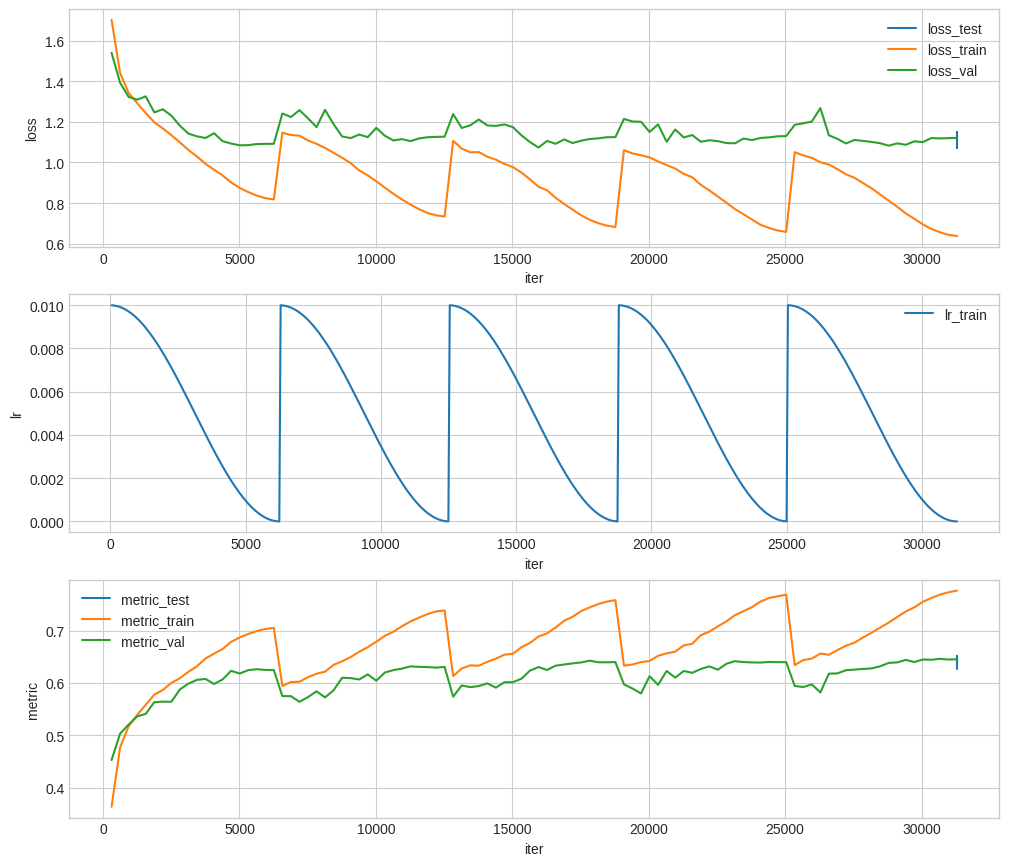

In [ ]:
import os

visualization("/content/log/lightning_logs/version_0")
weight_path = "/content/log/model_weight/"
file_list = os.listdir(weight_path)
file_list.sort()
file_list = file_list[:n_model] # only number model
models_dir = []
metric = Accuracy(num_classes=num_class, task='multiclass')

for i, f in enumerate(file_list):
    path = weight_path + f
    pl_model.load_model_weight(path)

    # validate
    for batch_idx, batch in enumerate(val_loader):
        x, y = batch
        y_hat = pl_model.model(x)
        metric(y_hat, y)

    score = metric.compute().item()
    metric.reset()
    models_dir.append({
        "path": path,
        "metric": score,
    })

pl_model.models_dir = models_dir

–ü–æ—Å—á–∏—Ç–∞–µ–º —Ç–æ—á–Ω–æ—Å—Ç—å –¥–ª—è –Ω–∞—à–∏—Ö –º–æ–¥–µ–ª–µ–π –¥–ª—è —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏:

In [ ]:
for item in pl_model.models_dir:
    print(f"{item['path']}, val_acc {item['metric']}")
    pl_model.load_model_weight(item['path'])
    trainer.test(pl_model, test_loader)

/content/log/model_weight/model_1.pt, val_acc 0.6248000264167786


Testing: |          | 0/? [00:00<?, ?it/s]

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ        Test metric        ‚îÉ       DataLoader 0        ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ         loss_test         ‚îÇ    1.1079517602920532     ‚îÇ
‚îÇ        metric_test        ‚îÇ    0.6262999773025513     ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

/content/log/model_weight/model_2.pt, val_acc 0.6309000253677368


Testing: |          | 0/? [00:00<?, ?it/s]

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ        Test metric        ‚îÉ       DataLoader 0        ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ         loss_test         ‚îÇ    1.1279696226119995     ‚îÇ
‚îÇ        metric_test        ‚îÇ    0.6402999758720398     ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

/content/log/model_weight/model_3.pt, val_acc 0.6401000022888184


Testing: |          | 0/? [00:00<?, ?it/s]

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ        Test metric        ‚îÉ       DataLoader 0        ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ         loss_test         ‚îÇ    1.1524646282196045     ‚îÇ
‚îÇ        metric_test        ‚îÇ    0.6425999999046326     ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

/content/log/model_weight/model_4.pt, val_acc 0.6399999856948853


Testing: |          | 0/? [00:00<?, ?it/s]

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ        Test metric        ‚îÉ       DataLoader 0        ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ         loss_test         ‚îÇ    1.1481449604034424     ‚îÇ
‚îÇ        metric_test        ‚îÇ    0.6445000171661377     ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

/content/log/model_weight/model_5.pt, val_acc 0.6456999778747559


Testing: |          | 0/? [00:00<?, ?it/s]

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ        Test metric        ‚îÉ       DataLoader 0        ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ         loss_test         ‚îÇ    1.1401002407073975     ‚îÇ
‚îÇ        metric_test        ‚îÇ    0.6460000276565552     ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

–õ—É—á—à–∞—è –º–æ–¥–µ–ª—å –∏–º–µ–µ—Ç —Ç–æ—á–Ω–æ—Å—Ç—å  64.6%.

–ü–æ—Å—á–∏—Ç–∞–µ–º —Ç–æ—á–Ω–æ—Å—Ç—å –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ –≤ —Å–ª—É—á–∞–µ –≥–æ–ª–æ—Å–æ–≤–∞–Ω–∏—è –º–æ–¥–µ–ª–µ–π (–≤—ã–±–∏—Ä–∞–µ—Ç—Å—è –∫–ª–∞—Å—Å, –∑–∞ –∫–æ—Ç–æ—Ä—ã–π –ø—Ä–æ–≥–æ–ª–æ—Å–æ–≤–∞–ª–æ –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ).

In [ ]:
ans_statistic = np.zeros((n_model, len(test_set)))
true_lable = np.zeros((len(test_set)))

for i, f in enumerate(file_list):
    path = weight_path + f
    pl_model.load_model_weight(path)

    # validate
    for batch_idx, batch in enumerate(test_loader):
        x, y = batch
        y_hat = pl_model.model(x)
        pred = y_hat.argmax(dim=1).detach().numpy()
        ans_statistic[i, len(pred)*batch_idx: len(pred)*(batch_idx+1)] = pred
        true_lable[len(pred)*batch_idx: len(pred)*(batch_idx+1)] = y.numpy()

–í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –Ω–∞—à–∏—Ö 5 –º–æ–¥–µ–ª–µ–π –¥–ª—è –ø–µ—Ä–≤—ã—Ö 100 –æ–±—ä–µ–∫—Ç–æ–≤ –≤—ã–±–æ—Ä–∫–∏ –¥–ª—è —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è. –£–±–µ–¥–∏–º—Å—è, —á—Ç–æ –º–æ–¥–µ–ª–∏ –¥–∞—é—Ç —Ä–∞–∑–Ω—ã–µ –æ—Ç–≤–µ—Ç—ã, –∞ –∑–Ω–∞—á–∏—Ç –∏—Ö –º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –¥–ª—è –∞–Ω—Å–∞–º–±–ª—è.

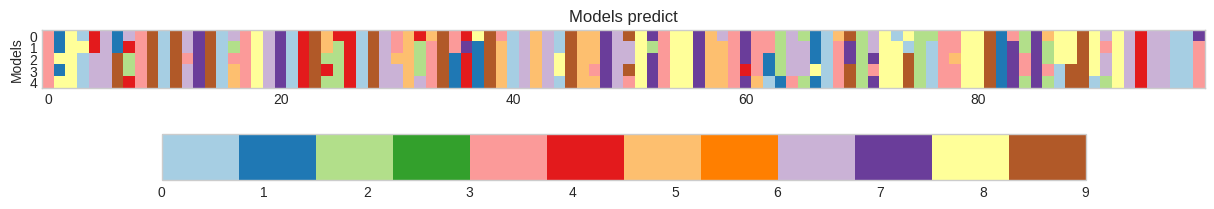

In [ ]:
plt.figure(figsize=(15, 4))
plt.imshow(ans_statistic[:, :100], cmap = 'Paired')
plt.colorbar(orientation='horizontal')
plt.title("Models predict")
plt.ylabel("Models")
plt.yticks(range(5))
plt.grid()
plt.show()

In [ ]:
predict_lable = np.zeros((len(test_set)))
for i in range(len(test_set)):
    values, counts = np.unique(ans_statistic[:, i], return_counts=True)
    predict_lable[i] = values[counts.argmax()]
predict_lable

array([3., 1., 8., ..., 0., 0., 0.])

In [ ]:
from sklearn.metrics import accuracy_score

print(f"Ensemble accuracy {accuracy_score(true_lable, predict_lable)}")

Ensemble accuracy 0.6606


–ì–æ–ª–æ—Å–æ–≤–∞–Ω–∏–µ –º–æ–¥–µ–ª–µ–π –¥–∞–µ—Ç —Ç–æ—á–Ω–æ—Å—Ç—å 66.06%, –Ω–∞ 1.46% –ª—É—á—à–µ –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏, –Ω–æ –ø—Ä–∏ —ç—Ç–æ–º –Ω–∞ 1 –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ —É—Ö–æ–¥–∏—Ç –≤ 5 —Ä–∞–∑ –±–æ–ª—å—à–µ –≤—ã—á–∏—Å–ª–∏—Ç–µ–ª—å–Ω—ã—Ö —Ä–µ—Å—É—Ä—Å–æ–≤.


–ü–æ–ø—Ä–æ–±—É–µ–º –ø—Ä–∏–º–µ–Ω–∏—Ç—å uniform soup:

In [ ]:
model = pl_model.uniform_soup()
trainer.test(pl_model, test_loader)

Adding /content/log/model_weight/model_1.pt to soup.
Adding /content/log/model_weight/model_2.pt to soup.
Adding /content/log/model_weight/model_3.pt to soup.
Adding /content/log/model_weight/model_4.pt to soup.
Adding /content/log/model_weight/model_5.pt to soup.


Testing: |          | 0/? [00:00<?, ?it/s]

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ        Test metric        ‚îÉ       DataLoader 0        ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ         loss_test         ‚îÇ    1.0710166692733765     ‚îÇ
‚îÇ        metric_test        ‚îÇ    0.6437000036239624     ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

[{'loss_test': 1.0710166692733765, 'metric_test': 0.6437000036239624}]

–¢–æ—á–Ω–æ—Å—Ç—å —Ö—É–∂–µ. –ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –Ω–∞—à–∏ –º–æ–¥–µ–ª–∏: –ø–µ—Ä–≤–∞—è –º–æ–¥–µ–ª—å –∏–º–µ–µ—Ç —Ç–æ—á–Ω–æ—Å—Ç—å –Ω–∏–∂–µ, —á–µ–º –æ—Å—Ç–∞–ª—å–Ω—ã–µ. –≠—Ç–æ —Å–≤—è–∑–∞–Ω–æ —Å —Ç–µ–º, —á—Ç–æ –æ–Ω–∞ —Å—Ç–∞—Ä—Ç–æ–≤–∞–ª–∞ —Å —Ö—É–¥—à–µ–π –ø–æ–∑–∏—Ü–∏–∏.

–£–±–µ—Ä–µ–º —ç—Ç—É –º–æ–¥–µ–ª—å –∏–∑ —Å—É–ø–∞:

In [ ]:
model = pl_model.uniform_soup(skip_first=True)
trainer.test(pl_model, test_loader)

Adding /content/log/model_weight/model_2.pt to soup.
Adding /content/log/model_weight/model_3.pt to soup.
Adding /content/log/model_weight/model_4.pt to soup.
Adding /content/log/model_weight/model_5.pt to soup.


Testing: |          | 0/? [00:00<?, ?it/s]

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ        Test metric        ‚îÉ       DataLoader 0        ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ         loss_test         ‚îÇ    1.0891315937042236     ‚îÇ
‚îÇ        metric_test        ‚îÇ    0.6485999822616577     ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

[{'loss_test': 1.0891315937042236, 'metric_test': 0.6485999822616577}]

–ü–æ–ª—É—á–∏–ª–∏ —Ç–æ—á–Ω–æ—Å—Ç—å 64.86%. –ù–∞ 0.26% –ª—É—á—à–µ, —á–µ–º —É –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏ –∏ –Ω–∞ 1.2% –º–µ–Ω—å—à–µ, —á–µ–º —É –≥–æ–ª–æ—Å–æ–≤–∞–Ω–∏—è. –ü—Ä–∏ —ç—Ç–æ–º –º–æ–¥–µ–ª—å –ø—Ä–æ–≥–æ–Ω—è–µ—Ç—Å—è —Ç–æ–ª—å–∫–æ 1 —Ä–∞–∑.

–ü–æ–ø—Ä–æ–±—É–µ–º greedy soup:

In [ ]:
model = pl_model.greedy_soup(val_loader)
trainer.test(pl_model, test_loader)

Adding to soup. New soup is ['/content/log/model_weight/model_5.pt', '/content/log/model_weight/model_3.pt'].  With score = 0.6499999761581421


Testing: |          | 0/? [00:00<?, ?it/s]

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ        Test metric        ‚îÉ       DataLoader 0        ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ         loss_test         ‚îÇ    1.0763661861419678     ‚îÇ
‚îÇ        metric_test        ‚îÇ    0.6518999934196472     ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

[{'loss_test': 1.0763661861419678, 'metric_test': 0.6518999934196472}]

–ü–æ–ª—É—á–∏–ª–∏ —Ç–æ—á–Ω–æ—Å—Ç—å 65.18% —ç—Ç–æ –Ω–∞ 0.59% –ª—É—á—à–µ –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏, –Ω–∞ 0.33% –ª—É—á—à–µ —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ–≥–æ —Å—É–ø–∞, –Ω–∞ 0.88% —Ö—É–∂–µ –≥–æ–ª–æ—Å–æ–≤–∞–Ω–∏—è. –ü—Ä–∏ —ç—Ç–æ–º –º–æ–¥–µ–ª—å –ø—Ä–æ–≥–æ–Ω—è–µ—Ç—Å—è —Ç–æ–ª—å–∫–æ 1 —Ä–∞–∑.

## –í–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏–µ learning schedule –∏ –∞–¥–∞–ø—Ç–∏–≤–Ω–æ–≥–æ –∏–∑–º–µ–Ω–µ–Ω–∏—è learning rate

–ò —Ç–æ, –∏ –¥—Ä—É–≥–æ–µ –º–µ–Ω—è–µ—Ç `learning rate`:

* `learning scheduler` ‚Äî –≥–ª–æ–±–∞–ª—å–Ω–æ,

* –∞–¥–∞–ø—Ç–∏–≤–Ω—ã–µ –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä—ã ‚Äî –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –≤–µ—Å–∞ –æ—Ç–¥–µ–ª—å–Ω–æ.

–ß–∞—Å—Ç–æ –∏—Ö –ø—Ä–∏–º–µ–Ω—è—é—Ç –≤–º–µ—Å—Ç–µ, –æ—Å–æ–±–µ–Ω–Ω–æ –≤ —Å–ª—É—á–∞–µ –∫—Ä–∏—Ç–µ—Ä–∏—è —Ä–∞–Ω–Ω–µ–π –æ—Å—Ç–∞–Ω–æ–≤–∫–∏ –∏ WarmUp.

–û–¥–Ω–∞–∫–æ –≤ —Å–ª—É—á–∞–µ —Ü–∏–∫–ª–∏—á–µ—Å–∫–æ–≥–æ —Ä–µ–∂–∏–º–∞ –æ–±—É—á–µ–Ω–∏—è —Ç–∞–∫ –¥–µ–ª–∞—é—Ç –Ω–µ –≤—Å–µ–≥–¥–∞. –î–µ–ª–æ –≤ —Ç–æ–º, —á—Ç–æ –æ–¥–Ω–∞ –∏–∑ –µ–≥–æ –∑–∞–¥–∞—á ‚Äî –∫–∞–∫ —Ä–∞–∑ –∏–∑–±–µ–∂–∞—Ç—å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è –∞–¥–∞–ø—Ç–∏–≤–Ω—ã—Ö –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä–æ–≤, —Ç—Ä–µ–±—É—é—â–∏—Ö –±–æ–ª—å—à–µ –ø–∞–º—è—Ç–∏ –∏ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã—Ö –≤—ã—á–∏—Å–ª–µ–Ω–∏–π.

–ü—Ä–∏ —ç—Ç–æ–º –Ω–∏–∫–∞–∫–∏—Ö –ø—Ä–µ–ø—è—Ç—Å—Ç–≤–∏–π –∫ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—é —Ç–æ–≥–æ –∂–µ Adam –≤ –∫–æ–º–ø–∞–Ω–∏–∏ –≤–º–µ—Å—Ç–µ —Å —Ü–∏–∫–ª–∏—á–µ—Å–∫–∏–º —Ä–µ–∂–∏–º–æ–º –æ–±—É—á–µ–Ω–∏—è –Ω–µ—Ç. –¢–∞–∫ –¥–µ–ª–∞—é—Ç, –Ω–∞–ø—Ä–∏–º–µ—Ä, –≤ [—Å—Ç–∞—Ç—å–µ](https://arxiv.org/pdf/2004.02401.pdf).

–ö—Ä–æ–º–µ —Ç–æ–≥–æ, –µ—Å—Ç—å —Å–ª–æ–∂–Ω—ã–µ –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä—ã, —Å–æ—Å—Ç–∞–≤–ª–µ–Ω–Ω—ã–µ –∏–∑ –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö –ø—Ä–æ—Å—Ç—ã—Ö –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä–æ–≤ –∏ —à–µ–¥—É–ª–µ—Ä–æ–≤. –ù–∞–ø—Ä–∏–º–µ—Ä, –µ—Å—Ç—å –ø—Ä–æ–µ–∫—Ç [Ranger21](https://github.com/lessw2020/Ranger21), –Ω–µ –ø–æ–ª—É—á–∏–≤—à–∏–π –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏—è –≤ –≤–∏–¥–µ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏ –Ω–∞ [PyPi](https://pypi.org/), –∞–≤—Ç–æ—Ä—ã –∫–æ—Ç–æ—Ä–æ–≥–æ –ø—ã—Ç–∞—é—Ç—Å—è ‚Äú–ø–æ–º–µ—Ä–∏—Ç—å‚Äù —Ä–∞–∑–Ω—ã–µ –∏–¥–µ–∏ –∏–∑ —Å—Ç–∞—Ç–µ–π. –ü–æ–¥—Ä–æ–±–Ω–µ–µ –æ –Ω–µ–º –º–æ–∂–Ω–æ –ø–æ—á–∏—Ç–∞—Ç—å –≤ [—Å—Ç–∞—Ç—å–µ](https://arxiv.org/pdf/2106.13731.pdf).

<center><img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/L07/ranger21.png" width="700"></center>

<center><em>Loss –∏ accuracy –ø—Ä–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏ Adam –∏ Ranger21 –ø—Ä–∏ –æ–±—É—á–µ–Ω–∏–∏ ResNet50 –Ω–∞ –Ω–∞–±–æ—Ä–µ –¥–∞–Ω–Ω—ã—Ö ImageNet</em></center>

<center><em>Source: <a href="https://arxiv.org/pdf/2106.13731.pdf">Ranger21: A Synergistic Deep Learning Optimizer</a></em></center>

–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –≤—ã–≥–ª—è–¥—è—Ç –Ω–µ–ø–ª–æ—Ö–æ. –ù–µ–¥–æ—Å—Ç–∞—Ç–∫–æ–º —ç—Ç–æ–≥–æ –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä–∞ —è–≤–ª—è–µ—Ç—Å—è –±–æ–ª—å—à–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ö—Ä–∞–Ω–∏–º—ã—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –∏ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤, –∞ —Ç–∞–∫–∂–µ —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ –Ω–∞ –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–Ω–æ–º —á–∏—Å–ª–µ –º–æ–¥–µ–ª–µ–π.

<font size = "6">–°—Å—ã–ª–∫–∏:</font>

[A journey into Optimization algorithms for Deep Neural Networks](https://theaisummer.com/optimization/)

[–ë–∞—Ç—á-–Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è. In-layer normalization techniques for training very deep neural networks](https://theaisummer.com/normalization/)

[–†–∞–∑–Ω—ã–µ —Ñ—É–Ω–∫—Ü–∏–∏ –∞–∫—Ç–∏–≤–∞—Ü–∏–∏, –∑–∞—Ç—É—Ö–∞—é—â–∏–µ –∏ –≤–∑—Ä—ã–≤–∞—é—â–∏–µ—Å—è –≥—Ä–∞–¥–∏–µ–Ω—Ç—ã –∏ —Ç.–¥.](https://www.kdnuggets.com/2022/06/activation-functions-work-deep-learning.html)

[–í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–∞–∑–Ω—ã—Ö –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä–æ–≤ –≤ ipynb, –Ω–æ –Ω–∞ tensorflow](https://nbviewer.jupyter.org/github/ilguyi/optimizers.numpy/blob/master/optimizer.tf.all.opt.plot.ipynb)